<a href="https://colab.research.google.com/github/mardocheeogecime-gif/Rede_Colabora-o_Acad-mica_ECI_UFMG/blob/main/Lab_intra_field_collaboration_PPGCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔗 Drive já montado em /content/drive
📁 Pasta-base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab

Envie **exatamente 3 arquivos**:
  1) banco-sucupira_docente-PPGCI.xlsx
  2) producoes_final.xlsx
  3) autores_final.xlsx


Saving autores_final.xlsx to autores_final (1).xlsx
Saving banco-sucupira_docente-PPGCI.xlsx to banco-sucupira_docente-PPGCI (1).xlsx
Saving producoes_final.xlsx to producoes_final (1).xlsx

🗂️ Brutos copiados para: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/uploads

Colunas do autores_final.xlsx: ['nome_pesquisado', 'instituicao_original', 'nome_openalex', 'instituicao_openalex', 'id_openalex', 'total_publicacoes', 'total_citacoes']
➡️ autores_final.xlsx — detectado:
   - coluna de nome: nome_pesquisado
   - col. citacoes: total_citacoes
   - col. trabalhos: total_publicacoes


/tmp/ipython-input-3900786004.py:314: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  w5 = ag.apply(lambda g: (g["ano"]>=cut5).sum()).rename("works_last5y")
/tmp/ipython-input-3900786004.py:315: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  c5 = ag.apply(lambda g: g.loc[g["ano"]>=cut5,"citations"].sum()).rename("cites_last5y")



=== AUDITORIA PARTE 0 ===
Docentes únicos (PPGCI): 84291
Produções (linhas após parse): 38138
Docentes com totais (autores_final) mesclados: 510
Features mínimas (docentes PPGCI cobertos): 3841

✔️ Salvo:
 - /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part0/docentes_df.csv
 - /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part0/producoes_parsed.csv
 - /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part0/autores_final_std.csv
 - /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part0/prod_features_min_ppgci.csv
 - /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part0/auditoria_parte0.json


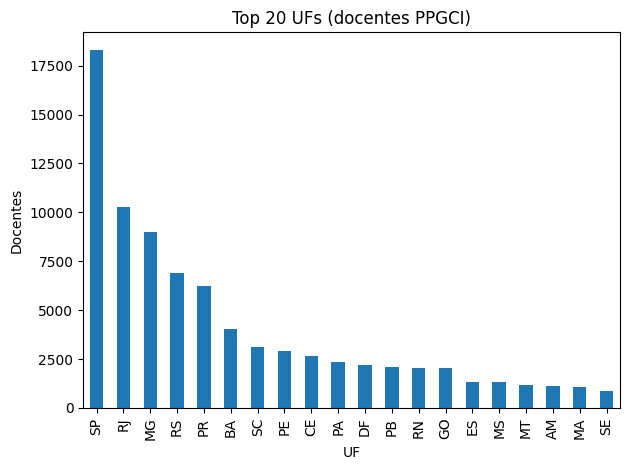

SG_UF_PROGRAMA,SP,RJ,MG,RS,PR,BA,SC,PE,CE,PA,DF,PB,RN,GO,ES,MS,MT,AM,MA,SE
docentes,18292,10291,8980,6906,6234,4013,3138,2923,2659,2338,2203,2072,2055,2024,1324,1304,1157,1140,1073,892


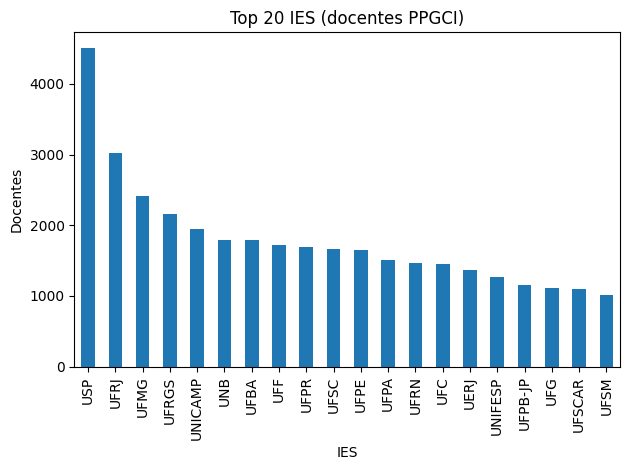

SG_ENTIDADE_ENSINO,USP,UFRJ,UFMG,UFRGS,UNICAMP,UNB,UFBA,UFF,UFPR,UFSC,UFPE,UFPA,UFRN,UFC,UERJ,UNIFESP,UFPB-JP,UFG,UFSCAR,UFSM
docentes,4504,3026,2418,2156,1944,1794,1785,1725,1689,1661,1644,1503,1468,1447,1364,1274,1151,1111,1100,1014


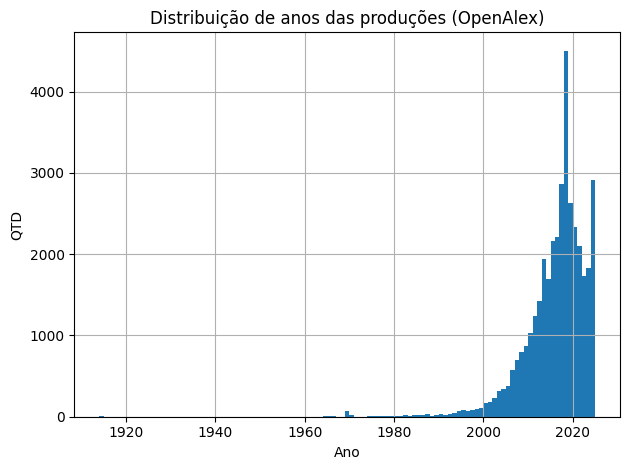

ano,1914,1939,1944,1946,1947,1957,1962,1963,1964,1965
freq,3,1,1,1,1,1,1,2,4,8



Resumo features mínimas (PPGCI):


,works_count,total_citations,works_last5y,cites_last5y
count,3841.00,3841.00,3841.00,3841.00
mean,13.22,69.48,3.00,4.68
std,41.12,277.55,9.66,26.70
min,1.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00
50%,2.00,6.00,0.00,0.00
75%,4.00,41.00,1.00,0.00
max,575.00,7614.00,143.00,1189.00


In [ ]:
# =========================================================
# PARTE 0 — Setup + Upload (3 arquivos) + Padronização
# Experimento: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
# Saídas:
#   part0/docentes_df.csv
#   part0/producoes_parsed.csv
#   part0/autores_final_std.csv
#   part0/prod_features_min_ppgci.csv
#   part0/auditoria_parte0.json
# Brutos copiados em: uploads/
# =========================================================

# !pip -q install pandas numpy openpyxl

import os, re, unicodedata, json, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# --------- Monta Drive (seguro) ---------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive com force_remount=True…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

# --------- Pasta desta experimentação ---------
PROJ_DIR_NAME = "PPGCI_intra_betaMOO_lab"
BASE_DIR = f"/content/drive/MyDrive/{PROJ_DIR_NAME}"
P0       = os.path.join(BASE_DIR, "part0")
UPL      = os.path.join(BASE_DIR, "uploads")
for p in [BASE_DIR, P0, UPL]:
    os.makedirs(p, exist_ok=True)
print("📁 Pasta-base:", BASE_DIR)

# --------- Upload (3 arquivos obrigatórios) ---------
from google.colab import files
print("\nEnvie **exatamente 3 arquivos**:")
print("  1) banco-sucupira_docente-PPGCI.xlsx")
print("  2) producoes_final.xlsx")
print("  3) autores_final.xlsx")
uploaded = files.upload()
assert len(uploaded) >= 3, "Você deve enviar os 3 arquivos (Sucupira/Docentes, Produções, Autores)."

# Mapeia nomes
fn_docentes = fn_producoes = fn_autores = None
for name in uploaded.keys():
    low = name.lower()
    if (("sucupira" in low and "docent" in low) or ("docente" in low and "ppgci" in low)):
        fn_docentes = name
    if "produc" in low:
        fn_producoes = name
    if "autor" in low:
        fn_autores = name

if fn_docentes is None: raise FileNotFoundError("Não encontrei o arquivo de docentes (ex.: banco-sucupira_docente-PPGCI.xlsx).")
if fn_producoes is None: raise FileNotFoundError("Não encontrei o arquivo de produções (ex.: producoes_final.xlsx).")
if fn_autores  is None: raise FileNotFoundError("Não encontrei o arquivo autores_final.xlsx.")

# Copia brutos para o Drive (/uploads/)
for local_name in [fn_docentes, fn_producoes, fn_autores]:
    dst = os.path.join(UPL, local_name)
    with open(dst, "wb") as f:
        f.write(uploaded[local_name])
print("\n🗂️ Brutos copiados para:", UPL)

# ----------------- Utilitários -----------------
def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

def normalize_name_token_sort(x: str) -> str:
    if pd.isna(x): return ""
    s = str(x).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    s = re.sub(r"[^a-z\s]", " ", s)
    toks = [t for t in s.split() if len(t) >= 2]
    toks.sort()
    return " ".join(toks)

def pick_col(df, *cands, default=None):
    for c in cands:
        if c in df.columns: return c
    return default

def parse_autores(val):
    if pd.isna(val): return []
    s = str(val)
    if s.strip().startswith("["):
        try:
            L = ast.literal_eval(s)
            return [str(x) for x in L]
        except Exception:
            pass
    sep = ";" if ";" in s else ","
    parts = [p.strip() for p in s.split(sep)]
    parts = [re.sub(r"\s+and\s+", " ", p, flags=re.I) for p in parts]
    return [p for p in parts if p]

def parse_autores_norm(x):
    if isinstance(x, list): return x
    s = str(x)
    if s.strip().startswith("["):
        try: return [str(t) for t in ast.literal_eval(s)]
        except Exception: pass
    return [p.strip() for p in s.split(",") if p.strip()]

# ----------------- PATCH robusto: autores_final -----------------
def _norm_header(s: str) -> str:
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    s = re.sub(r"[^a-z0-9]+", "_", s)
    s = re.sub(r"_+", "_", s).strip("_")
    return s

def standardize_autores_final(df: pd.DataFrame) -> pd.DataFrame:
    """
    - Detecta coluna de nome com várias variações (nome, autor, display_name, pesquisador, etc.)
    - Se não houver coluna única, tenta combinar first/last.
    - Detecta colunas numéricas de totais (citações/trabalhos) por regex ampla.
    Retorna: ["nome_tokensort_norm", "aut_total_citations"(opcional), "aut_total_works"(opcional)]
    """
    if df is None or df.empty:
        raise ValueError("autores_final.xlsx veio vazio.")

    norm2orig = {_norm_header(c): c for c in df.columns}
    headers_norm = list(norm2orig.keys())

    # 1) Nome
    name_aliases = {
        "nome","nm_docente","docente","autor","nome_autor","nome_do_autor",
        "nome_completo","display_name","author","author_name","pesquisador",
        "pesquisadora","docentes","nome_limpo","nome_normalizado","full_name"
    }
    name_col_norm = None
    for a in name_aliases:
        if a in headers_norm:
            name_col_norm = a; break
    if name_col_norm is None:
        for h in headers_norm:
            if any(a in h for a in name_aliases):
                name_col_norm = h; break

    # 1b) Combina first/last se preciso
    if name_col_norm is None:
        first_cands = [k for k in headers_norm if k in {"first_name","given_name","nome","nome_proprio","primeiro_nome"} or re.search(r"(first|given)", k)]
        last_cands  = [k for k in headers_norm if k in {"last_name","family_name","sobrenome"} or re.search(r"(last|family|sobrenome)", k)]
        if first_cands and last_cands:
            fn = norm2orig[first_cands[0]]
            ln = norm2orig[last_cands[0]]
            tmp = df[[fn, ln]].astype(str).fillna("").apply(lambda r: f"{r[fn]} {r[ln]}".strip(), axis=1)
            af = pd.DataFrame({"NOME_AUTOR": tmp})
        else:
            guess = [k for k in headers_norm if "nome" in k or "name" in k]
            if guess:
                name_col_norm = guess[0]
            else:
                raise KeyError(
                    "autores_final.xlsx precisa ter uma coluna de nome (ex.: 'nome', 'autor', 'display_name').\n"
                    f"Colunas vistas: {list(df.columns)}"
                )

    if name_col_norm is not None:
        name_orig = norm2orig[name_col_norm]
        af = df[[name_orig]].copy()
        af = af.rename(columns={name_orig: "NOME_AUTOR"})

    # 2) Normaliza chave
    af["nome_tokensort_norm"] = af["NOME_AUTOR"].astype(str).map(normalize_name_token_sort)

    # 3) Totais
    cit_regex = re.compile(r"(cit|cita|citacao|citacoes|cites|citations|n_citations|total_citations)", re.I)
    wrk_regex = re.compile(r"(work|prod|public|papers|artigo|artigos|produc|publica)", re.I)
    cand_cit = [c for c in df.columns if cit_regex.search(str(c))]
    cand_wrk = [c for c in df.columns if wrk_regex.search(str(c))]

    cols_keep = ["nome_tokensort_norm"]
    if cand_cit:
        c = cand_cit[0]
        af["aut_total_citations"] = pd.to_numeric(df[c], errors="coerce")
        cols_keep.append("aut_total_citations")
    if cand_wrk:
        w = cand_wrk[0]
        af["aut_total_works"] = pd.to_numeric(df[w], errors="coerce")
        cols_keep.append("aut_total_works")

    af = af[cols_keep].drop_duplicates(subset=["nome_tokensort_norm"])
    print("➡️ autores_final.xlsx — detectado:")
    print("   - coluna de nome:", name_col_norm if name_col_norm else "first+last")
    print("   - col. citacoes:", cand_cit[0] if cand_cit else "(não encontrada)")
    print("   - col. trabalhos:", cand_wrk[0] if cand_wrk else "(não encontrada)")
    return af

# ----------------- Padronização Sucupira -----------------
def standardize_docentes(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    col_nome = pick_col(out, "NM_DOCENTE","nm_docente","NOME_DOCENTE","nome")
    if col_nome is None:
        raise KeyError("Coluna de nome do docente não encontrada (ex.: NM_DOCENTE).")
    out = out.rename(columns={col_nome:"NM_DOCENTE"})

    ren_map = {}
    cand_pairs = [
        (["SG_ENTIDADE_ENSINO","sg_entidade_ensino","NM_ENTIDADE_ENSINO","nm_entidade_ensino"], "SG_ENTIDADE_ENSINO"),
        (["SG_UF_PROGRAMA","sg_uf_programa","SG_UF"], "SG_UF_PROGRAMA"),
        (["NM_REGIAO","nm_regiao"], "NM_REGIAO"),
        (["NM_PROGRAMA_IES","nm_programa_ies"], "NM_PROGRAMA_IES"),
        (["CD_CONCEITO_PROGRAMA","cd_conceito_programa","NOTA_PROGRAMA_IES","NOTA_PROGRAMA"], "CD_CONCEITO_PROGRAMA"),
        (["BOLSA_PRODUTIVIDADE","bolsa_produtividade","CD_CAT_BOLSA_PRODUTIVIDADE"], "BOLSA_PRODUTIVIDADE"),
        (["DS_TIPO_VINCULO_DOCENTE_IES","ds_tipo_vinculo_docente_ies"], "DS_TIPO_VINCULO_DOCENTE_IES"),
        (["DS_REGIME_TRABALHO","ds_regime_trabalho"], "DS_REGIME_TRABALHO"),
        (["NM_GRAU_TITULACAO","nm_grau_titulacao"], "NM_GRAU_TITULACAO"),
        (["AN_TITULACAO","an_titulacao"], "AN_TITULACAO"),
        (["NM_IES_TITULACAO","nm_ies_titulacao"], "NM_IES_TITULACAO"),
        (["NM_PAIS_IES_TITULACAO","nm_pais_ies_titulacao"], "NM_PAIS_IES_TITULACAO"),
        (["NM_ORIENTADOR","nm_orientador","ORIENTADOR"], "NM_ORIENTADOR"),
        (["NM_COORIENTADOR","nm_coorientador","COORIENTADOR"], "NM_COORIENTADOR"),
    ]
    for cands, outc in cand_pairs:
        for c in cands:
            if c in out.columns:
                ren_map[c] = outc; break
    out = out.rename(columns=ren_map)

    out["nome_tokensort_norm"] = out["NM_DOCENTE"].astype(str).map(normalize_name_token_sort)
    out["nota_prog"] = pd.to_numeric(out.get("CD_CONCEITO_PROGRAMA"), errors="coerce")

    if "BOLSA_PRODUTIVIDADE" in out.columns:
        out["bolsa_has"] = out["BOLSA_PRODUTIVIDADE"].fillna("Não possui").apply(
            lambda x: 0 if "não" in str(x).lower() else 1
        )
        out["bolsa_tipo_norm"] = out["BOLSA_PRODUTIVIDADE"].fillna("sem_bolsa").astype(str).str.lower()
    else:
        out["bolsa_has"] = 0
        out["bolsa_tipo_norm"] = "sem_bolsa"

    out["acad_age"] = np.where(
        out.get("AN_TITULACAO").notna(),
        2025 - pd.to_numeric(out["AN_TITULACAO"], errors="coerce"),
        np.nan
    )

    for c in ["SG_UF_PROGRAMA","NM_REGIAO","SG_ENTIDADE_ENSINO","NM_PROGRAMA_IES","NM_IES_TITULACAO","NM_ORIENTADOR","NM_COORIENTADOR"]:
        if c in out.columns:
            out[c] = out[c].astype(str).str.strip().replace({"nan":np.nan,"None":np.nan,"":np.nan})

    out = out[out["nome_tokensort_norm"].astype(bool)].copy()
    out = out.drop_duplicates(subset=["nome_tokensort_norm"])
    return out

# ----------------- Parse Produções -----------------
def parse_producoes(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    c_titulo = pick_col(out, "titulo","Title")
    c_ano    = pick_col(out, "ano","year")
    c_cit    = pick_col(out, "citations","n_citations","cit")
    c_aut    = pick_col(out, "autores","authors")
    for c in (c_titulo, c_ano, c_cit, c_aut):
        if c is None:
            raise KeyError("producoes_final.xlsx precisa ter colunas: titulo, ano, citations, autores.")
    out = out.rename(columns={c_titulo:"titulo", c_ano:"ano", c_cit:"citations", c_aut:"autores"})
    out["ano"] = pd.to_numeric(out["ano"], errors="coerce")
    out["citations"] = pd.to_numeric(out["citations"], errors="coerce").fillna(0).astype(int)
    out["autores_list_raw"] = out["autores"].apply(parse_autores)
    out = out[out["autores_list_raw"].map(len) > 0].copy()
    out["autores_norm"] = out["autores_list_raw"].apply(lambda L: [normalize_name_token_sort(a) for a in L])
    return out

# ----------------- Features mínimas (PPGCI only) -----------------
def prod_features_min_ppgci(producoes_parsed: pd.DataFrame, docentes_df: pd.DataFrame, ano_atual=2025):
    rows = []
    keyset = set(docentes_df["nome_tokensort_norm"])
    for _, r in producoes_parsed.iterrows():
        ano, cites = r["ano"], r["citations"]
        for a in r["autores_norm"]:
            if a in keyset:
                rows.append((a, ano, cites))
    if not rows:
        return pd.DataFrame(columns=["nome_tokensort_norm","works_count","total_citations","works_last5y","cites_last5y"])

    auth = pd.DataFrame(rows, columns=["nome_tokensort_norm","ano","citations"])
    ag   = auth.groupby("nome_tokensort_norm")
    works= ag.size().rename("works_count")
    tcit = ag["citations"].sum().rename("total_citations")
    cut5 = ano_atual - 5 + 1
    w5 = ag.apply(lambda g: (g["ano"]>=cut5).sum()).rename("works_last5y")
    c5 = ag.apply(lambda g: g.loc[g["ano"]>=cut5,"citations"].sum()).rename("cites_last5y")
    feats = pd.concat([works, tcit, w5, c5], axis=1).reset_index()
    return feats

# ----------------- Carrega e executa PARTE 0 -----------------
doc_raw = pd.read_excel(fn_docentes)
pro_raw  = pd.read_excel(fn_producoes)
aut_raw  = pd.read_excel(fn_autores)

# Auditoria de colunas do autores_final (ajuda se algo falhar)
print("\nColunas do autores_final.xlsx:", list(aut_raw.columns))

docentes_df = standardize_docentes(doc_raw)
producoes_parsed = parse_producoes(pro_raw)
autores_std = standardize_autores_final(aut_raw)

# Enriquecimento leve
docentes_enriched = docentes_df.merge(autores_std, on="nome_tokensort_norm", how="left")

# Features mínimas (apenas docentes PPGCI)
producoes_parsed["autores_norm"] = producoes_parsed["autores_norm"].apply(parse_autores_norm)
prod_min_ppgci = prod_features_min_ppgci(producoes_parsed, docentes_df, ano_atual=2025)

# ----------------- Auditoria -----------------
print("\n=== AUDITORIA PARTE 0 ===")
print("Docentes únicos (PPGCI):", len(docentes_df))
print("Produções (linhas após parse):", len(producoes_parsed))
print("Docentes com totais (autores_final) mesclados:", autores_std["nome_tokensort_norm"].nunique())
print("Features mínimas (docentes PPGCI cobertos):", len(prod_min_ppgci))

# ----------------- Salvamento no Drive (sobrescrevendo) -----------------
safe_save_csv(docentes_enriched,   os.path.join(P0, "docentes_df.csv"))
safe_save_csv(producoes_parsed,    os.path.join(P0, "producoes_parsed.csv"))
safe_save_csv(autores_std,         os.path.join(P0, "autores_final_std.csv"))
safe_save_csv(prod_min_ppgci,      os.path.join(P0, "prod_features_min_ppgci.csv"))

aud = {
    "base_dir": BASE_DIR,
    "uploads": {
        "docentes_file": os.path.join(UPL, fn_docentes),
        "producoes_file": os.path.join(UPL, fn_producoes),
        "autores_file":   os.path.join(UPL, fn_autores),
    },
    "outputs": [
        "part0/docentes_df.csv",
        "part0/producoes_parsed.csv",
        "part0/autores_final_std.csv",
        "part0/prod_features_min_ppgci.csv",
    ],
    "rows": {
        "docentes_unicos": int(len(docentes_df)),
        "producoes_parsed": int(len(producoes_parsed)),
        "autores_final_unicos": int(autores_std["nome_tokensort_norm"].nunique()),
        "feats_ppgci_unicos": int(len(prod_min_ppgci))
    }
}
safe_save_json(aud, os.path.join(P0, "auditoria_parte0.json"))

print("\n✔️ Salvo:")
print(" -", os.path.join(P0, "docentes_df.csv"))
print(" -", os.path.join(P0, "producoes_parsed.csv"))
print(" -", os.path.join(P0, "autores_final_std.csv"))
print(" -", os.path.join(P0, "prod_features_min_ppgci.csv"))
print(" -", os.path.join(P0, "auditoria_parte0.json"))

# ----------------- Visualizações leves -----------------
# 1) Distribuição de docentes por UF
if "SG_UF_PROGRAMA" in docentes_df.columns:
    uf_counts = docentes_df["SG_UF_PROGRAMA"].fillna("NA").value_counts().head(20)
    plt.figure()
    uf_counts.plot(kind="bar")
    plt.title("Top 20 UFs (docentes PPGCI)")
    plt.xlabel("UF"); plt.ylabel("Docentes")
    plt.tight_layout(); plt.show()
    display(uf_counts.to_frame("docentes").T)

# 2) Top IES
if "SG_ENTIDADE_ENSINO" in docentes_df.columns:
    ies_counts = docentes_df["SG_ENTIDADE_ENSINO"].fillna("NA").value_counts().head(20)
    plt.figure()
    ies_counts.plot(kind="bar")
    plt.title("Top 20 IES (docentes PPGCI)")
    plt.xlabel("IES"); plt.ylabel("Docentes")
    plt.tight_layout(); plt.show()
    display(ies_counts.to_frame("docentes").T)

# 3) Histograma de anos das produções
if "ano" in producoes_parsed.columns:
    anos = pd.to_numeric(producoes_parsed["ano"], errors="coerce").dropna().astype(int)
    if not anos.empty:
        plt.figure()
        anos.hist(bins=range(anos.min(), anos.max()+1))
        plt.title("Distribuição de anos das produções (OpenAlex)")
        plt.xlabel("Ano"); plt.ylabel("QTD")
        plt.tight_layout(); plt.show()
        display(pd.Series(anos.value_counts().sort_index()).head(10).to_frame("freq").T)

# 4) Resumo features mínimas (PPGCI)
if not prod_min_ppgci.empty:
    desc = prod_min_ppgci[["works_count","total_citations","works_last5y","cites_last5y"]].describe().round(2)
    print("\nResumo features mínimas (PPGCI):")
    display(desc)

Colunas candidatas a PROGRAMA: ['CD_PROGRAMA_IES', 'NOTA_PROGRAMA_IES', 'NM_PROGRAMA_IES', 'NM_GRAU_PROGRAMA', 'NM_MODALIDADE_PROGRAMA', 'CD_CONCEITO_PROGRAMA', 'NM_MUNICIPIO_PROGRAMA_IES', 'SG_UF_PROGRAMA', 'ID_ADD_FOTO_PROGRAMA', 'ID_ADD_FOTO_PROGRAMA_IES']
Colunas candidatas a ÁREA: ['CD_AREA_AVALIACAO', 'NM_AREA_AVALIACAO', 'NM_GRANDE_AREA_CONHECIMENTO', 'NM_AREA_CONHECIMENTO']

Antes (sem filtro): 84291 docentes únicos
Depois do filtro PPGCI: 467 docentes únicos

✔️ Substituímos 'docentes_df.csv' pela versão PPGCI-only e refizemos 'prod_features_min_ppgci.csv'.

Amostra de programas/áreas detectados (Pessoas PPGCI):

Top em CD_PROGRAMA_IES:


,count
CD_PROGRAMA_IES,
33004110043P4,30
31001017138P0,28
31021018018P8,25
41002016025P5,24
32001010028P2,24
24001015049P7,23
22033017002P3,22
31003010063P6,21
41001010052P0,20



Top em NOTA_PROGRAMA_IES:


,count
NOTA_PROGRAMA_IES,
4.0,246
5.0,91
3.0,59
7.0,30
6.0,28



Top em NM_PROGRAMA_IES:


,count
NM_PROGRAMA_IES,
CIÊNCIA DA INFORMAÇÃO,239
BIBLIOTECONOMIA,47
CIÊNCIAS DA INFORMAÇÃO,40
GESTÃO DA INFORMAÇÃO,29
CIÊNCIA DA INFORMAÇÃO - UFRJ - IBICT,28
GESTÃO & ORGANIZAÇÃO DO CONHECIMENTO,19
GESTÃO DE DOCUMENTOS E ARQUIVOS,16
SISTEMAS DE INFORMAÇÃO E GESTÃO DO CONHECIMENTO,14
CIÊNCIAS GEODÉSICAS E TECNOLOGIAS DA GEOINFORMAÇÃO,13



Top em NM_GRAU_PROGRAMA:


,count
NM_GRAU_PROGRAMA,
MESTRADO/DOUTORADO,254
MESTRADO PROFISSIONAL,125
MESTRADO,88



Top em NM_MODALIDADE_PROGRAMA:


,count
NM_MODALIDADE_PROGRAMA,
ACADÊMICO,342
PROFISSIONAL,125



Top em CD_CONCEITO_PROGRAMA:


,count
CD_CONCEITO_PROGRAMA,
4,248
5,91
3,70
7,30
6,28



Top em NM_MUNICIPIO_PROGRAMA_IES:


,count
NM_MUNICIPIO_PROGRAMA_IES,
RIO DE JANEIRO,80
BELO HORIZONTE,57
FLORIANÓPOLIS,44
MARÍLIA,30
RECIFE,25
JOÃO PESSOA,23
JUAZEIRO DO NORTE,22
NITERÓI,21
BELÉM,19



Top em SG_UF_PROGRAMA:


,count
SG_UF_PROGRAMA,
RJ,101
MG,57
SP,56
SC,44
CE,32
PE,25
PB,23
PA,19
BA,19



Top em ID_ADD_FOTO_PROGRAMA:


,count
ID_ADD_FOTO_PROGRAMA,
188976,30
190024,28
188894,25
185946,24
186664,24
188293,23
188786,22
162885,21
184604,20



Top em ID_ADD_FOTO_PROGRAMA_IES:


,count
ID_ADD_FOTO_PROGRAMA_IES,
251248,30
252321,28
251166,25
247806,24
248591,24
250532,23
251054,22
232786,21
246264,20



Top em CD_AREA_AVALIACAO:


,count
CD_AREA_AVALIACAO,
31,454
5,13



Top em NM_AREA_AVALIACAO:


,count
NM_AREA_AVALIACAO,
COMUNICAÇÃO E INFORMAÇÃO,454
GEOCIÊNCIAS,13



Top em NM_GRANDE_AREA_CONHECIMENTO:


,count
NM_GRANDE_AREA_CONHECIMENTO,
CIÊNCIAS SOCIAIS APLICADAS,454
CIÊNCIAS EXATAS E DA TERRA,13



Top em NM_AREA_CONHECIMENTO:


,count
NM_AREA_CONHECIMENTO,
CIÊNCIA DA INFORMAÇÃO,454
GEOCIÊNCIAS,13


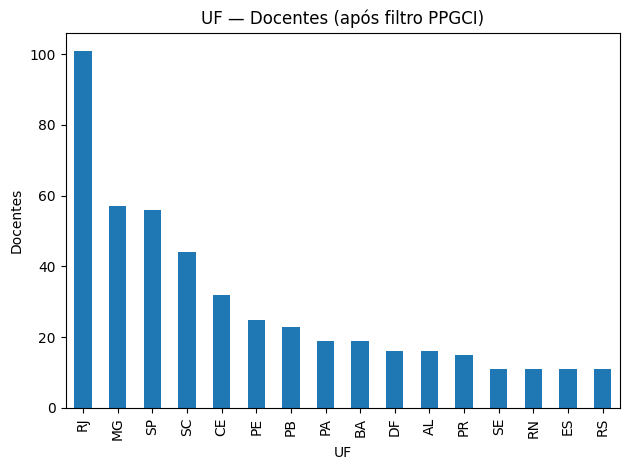

SG_UF_PROGRAMA,RJ,MG,SP,SC,CE,PE,PB,PA,BA,DF,AL,PR,SE,RN,ES,RS
docentes,101,57,56,44,32,25,23,19,19,16,16,15,11,11,11,11


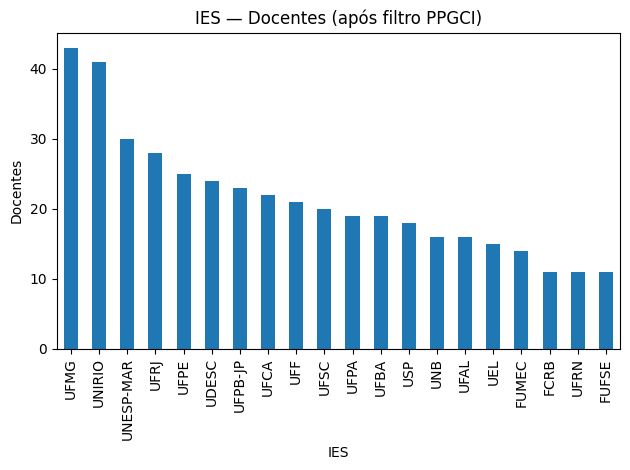

SG_ENTIDADE_ENSINO,UFMG,UNIRIO,UNESP-MAR,UFRJ,UFPE,UDESC,UFPB-JP,UFCA,UFF,UFSC,UFPA,UFBA,USP,UNB,UFAL,UEL,FUMEC,FCRB,UFRN,FUFSE
docentes,43,41,30,28,25,24,23,22,21,20,19,19,18,16,16,15,14,11,11,11



=== RESUMO PPGCI-ONLY ===
Docentes únicos (PPGCI): 467
Docentes com features mínimas (PPGCI): 414


,works_count,total_citations,works_last5y,cites_last5y
count,414.00,414.00,414.00,414.00
mean,84.07,137.48,18.35,16.09
std,87.90,259.91,20.59,30.29
min,1.00,0.00,0.00,0.00
25%,26.25,12.25,4.00,0.25
50%,60.00,46.00,12.00,4.00
75%,107.00,138.00,27.00,18.00
max,575.00,2262.00,143.00,298.00


In [ ]:
# =========================================================
# PATCH PARTE 0 — Filtrar docentes Sucupira para PPGCI
# (executar DEPOIS de rodar a sua PARTE 0)
# Vai ler part0/*.csv, filtrar por PPGCI, recalcular features
# e sobrescrever os arquivos da part0 com a versão PPGCI-only.
# =========================================================

import os, re, unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# -- ajuste o nome da pasta caso houver mudanças na parte 0:
BASE_DIR = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P0 = os.path.join(BASE_DIR, "part0")

# ----- helpers -----
def strip_accents_lower(s: str) -> str:
    if pd.isna(s): return ""
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    return s

def looks_like_ppgci(text: str) -> bool:
    """Retorna True se a string parecer 'Ciência da Informação' (variações)."""
    t = strip_accents_lower(text)
    # padrões: ciencia da informacao, ciencias da informacao, ppgci
    return (
        ("ciencia" in t and "informac" in t) or
        ("ppgci" in t)
    )

def prod_features_min_ppgci(producoes_parsed: pd.DataFrame, docentes_df: pd.DataFrame, ano_atual=2025):
    rows = []
    keyset = set(docentes_df["nome_tokensort_norm"])
    for _, r in producoes_parsed.iterrows():
        ano = pd.to_numeric(r.get("ano"), errors="coerce")
        cites = pd.to_numeric(r.get("citations"), errors="coerce")
        cites = int(0 if pd.isna(cites) else cites)
        autores = r.get("autores_norm")
        if isinstance(autores, str):
            # tenta interpretar lista textual "[a, b]" ou "a, b"
            autores = [x.strip() for x in autores.strip("[]").replace("'", "").split(",") if x.strip()]
        if not isinstance(autores, list):
            continue
        for a in autores:
            if a in keyset:
                rows.append((a, int(ano) if not pd.isna(ano) else None, cites))
    if not rows:
        return pd.DataFrame(columns=["nome_tokensort_norm","works_count","total_citations","works_last5y","cites_last5y"])

    auth = pd.DataFrame(rows, columns=["nome_tokensort_norm","ano","citations"])
    ag   = auth.groupby("nome_tokensort_norm", as_index=False)
    feats = ag.size().rename(columns={"size":"works_count"})
    tcit  = auth.groupby("nome_tokensort_norm", as_index=False)["citations"].sum().rename(columns={"citations":"total_citations"})
    feats = feats.merge(tcit, on="nome_tokensort_norm", how="left")

    cut5 = ano_atual - 5 + 1
    auth5 = auth[auth["ano"].fillna(0).astype(int) >= cut5].copy()
    w5 = auth5.groupby("nome_tokensort_norm", as_index=False).size().rename(columns={"size":"works_last5y"})
    c5 = auth5.groupby("nome_tokensort_norm", as_index=False)["citations"].sum().rename(columns={"citations":"cites_last5y"})
    feats = feats.merge(w5, on="nome_tokensort_norm", how="left").merge(c5, on="nome_tokensort_norm", how="left")
    for c in ["works_last5y","cites_last5y"]:
        if c in feats.columns:
            feats[c] = feats[c].fillna(0).astype(int)
    return feats

def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

# ----- 1) Carregar saídas da Parte 0 -----
doc_path  = os.path.join(P0, "docentes_df.csv")
prod_path = os.path.join(P0, "producoes_parsed.csv")

doc_all  = pd.read_csv(doc_path)
prods    = pd.read_csv(prod_path)

# ----- 2) Detectar colunas relevantes (programa/área) -----
cands_prog = [c for c in doc_all.columns if re.search(r"(programa|curso|nm_programa|ppg)", c, re.I)]
cands_area = [c for c in doc_all.columns if re.search(r"(area|área).*conhec|avali", c, re.I)]

# Mostra o que achamos (útil para auditar)
print("Colunas candidatas a PROGRAMA:", cands_prog)
print("Colunas candidatas a ÁREA:", cands_area)

# ----- 3) Construir máscara PPGCI -----
mask = pd.Series(False, index=doc_all.index)

# 3a) por NOME DO PROGRAMA
for c in cands_prog:
    mask = mask | doc_all[c].astype(str).map(looks_like_ppgci)

# 3b) por ÁREA DE CONHECIMENTO
for c in cands_area:
    mask = mask | doc_all[c].astype(str).map(looks_like_ppgci)

# Se nenhuma coluna candidata foi encontrada, tenta campos padrão
if mask.sum() == 0:
    for c in ["NM_PROGRAMA_IES", "NM_AREA_CONHECIMENTO"]:
        if c in doc_all.columns:
            mask = mask | doc_all[c].astype(str).map(looks_like_ppgci)

# ----- 4) Aplicar filtro / deduplicar -----
doc_ppgci = doc_all[mask].copy()
if "nome_tokensort_norm" in doc_ppgci.columns:
    doc_ppgci = doc_ppgci[doc_ppgci["nome_tokensort_norm"].astype(bool)].drop_duplicates(subset=["nome_tokensort_norm"])

n_all  = doc_all["nome_tokensort_norm"].nunique() if "nome_tokensort_norm" in doc_all else len(doc_all)
n_ppgc = doc_ppgci["nome_tokensort_norm"].nunique() if "nome_tokensort_norm" in doc_ppgci else len(doc_ppgci)
print(f"\nAntes (sem filtro): {n_all} docentes únicos")
print(f"Depois do filtro PPGCI: {n_ppgc} docentes únicos")

# Aviso amigável se o número fugir muito do esperado (300–1000)
if not (300 <= n_ppgc <= 1000):
    print("⚠️ Aviso: o número filtrado está fora do intervalo típico (300–1000). Confira os nomes dos programas/áreas detectados.")

# ----- 5) Recalcular features mínimas USANDO APENAS PPGCI -----
# (A PARTE 0 já deixou autores_norm em producoes_parsed)
prods["autores_norm"] = prods["autores_norm"].apply(lambda s: [x.strip() for x in str(s).strip("[]").replace("'", "").split(",") if x.strip()])
feats_ppgci = prod_features_min_ppgci(prods, doc_ppgci, ano_atual=2025)

# ----- 6) Salvar (substituindo) -----
safe_save_csv(doc_ppgci,    os.path.join(P0, "docentes_df.csv"))              # sobrescreve com PPGCI-only
safe_save_csv(feats_ppgci,  os.path.join(P0, "prod_features_min_ppgci.csv"))  # refeito para PPGCI
print("\n✔️ Substituímos 'docentes_df.csv' pela versão PPGCI-only e refizemos 'prod_features_min_ppgci.csv'.")

# ----- 7) Mini-visualizações (checagem) -----
print("\nAmostra de programas/áreas detectados (Pessoas PPGCI):")
for c in (cands_prog + cands_area):
    if c in doc_ppgci.columns:
        top = doc_ppgci[c].value_counts().head(10)
        if len(top)>0:
            print(f"\nTop em {c}:")
            display(top)

# UF e IES pós-filtro
if "SG_UF_PROGRAMA" in doc_ppgci.columns:
    uf_counts = doc_ppgci["SG_UF_PROGRAMA"].fillna("NA").value_counts().head(20)
    plt.figure()
    uf_counts.plot(kind="bar")
    plt.title("UF — Docentes (após filtro PPGCI)")
    plt.xlabel("UF"); plt.ylabel("Docentes")
    plt.tight_layout(); plt.show()
    display(uf_counts.to_frame("docentes").T)

if "SG_ENTIDADE_ENSINO" in doc_ppgci.columns:
    ies_counts = doc_ppgci["SG_ENTIDADE_ENSINO"].fillna("NA").value_counts().head(20)
    plt.figure()
    ies_counts.plot(kind="bar")
    plt.title("IES — Docentes (após filtro PPGCI)")
    plt.xlabel("IES"); plt.ylabel("Docentes")
    plt.tight_layout(); plt.show()
    display(ies_counts.to_frame("docentes").T)

# ----- 8) Resumo final -----
print("\n=== RESUMO PPGCI-ONLY ===")
print("Docentes únicos (PPGCI):", n_ppgc)
print("Docentes com features mínimas (PPGCI):", feats_ppgci["nome_tokensort_norm"].nunique())
if not feats_ppgci.empty:
    display(feats_ppgci[["works_count","total_citations","works_last5y","cites_last5y"]].describe().round(2))


🔗 Drive já montado em /content/drive
Papers processados: 38138
 - descartados por mega-autoria (> 20): 767
 - sem pelo menos 1 docente PPGCI: 11775
 - válidos (≥1 PPGCI): 25596  | sendo solo = 18499

=== AUDITORIA PARTE 1 ===
edges_final: 1340
nodes_in_graph: 373
componentes: 5 | maior componente: 365
max_authors_per_paper: 20


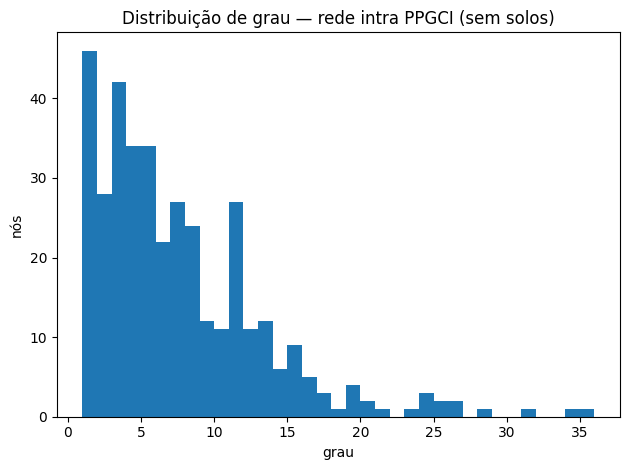

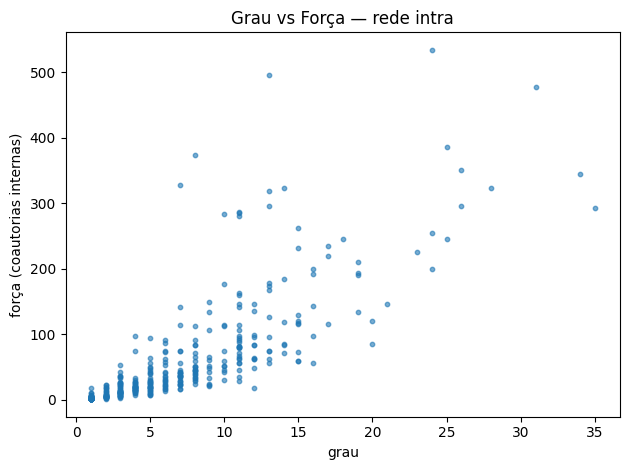

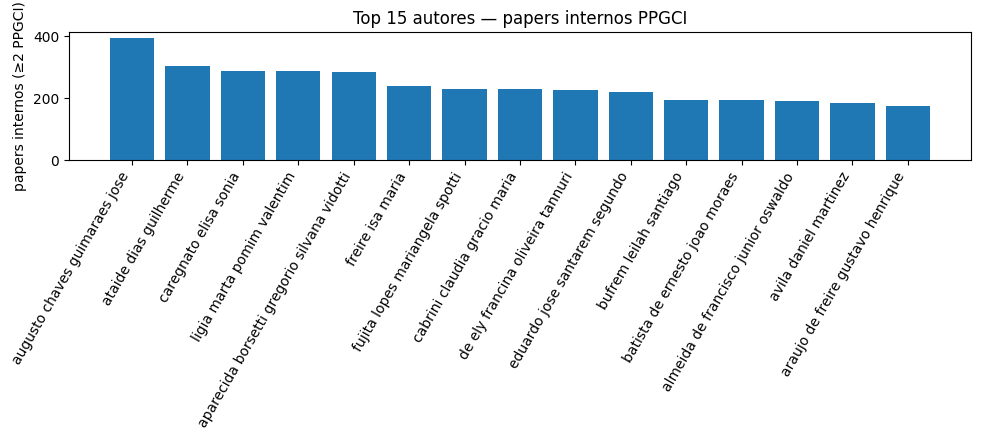

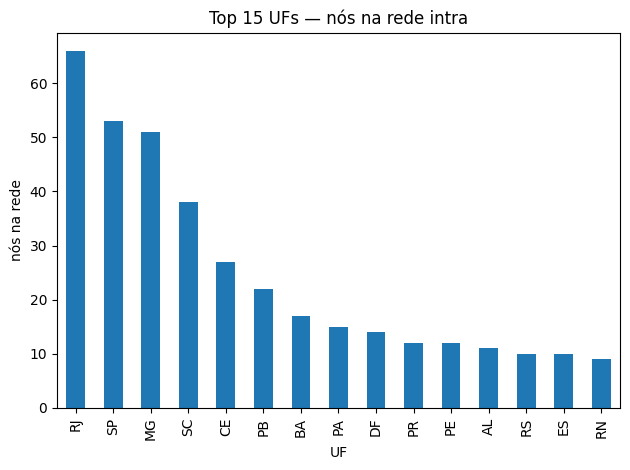

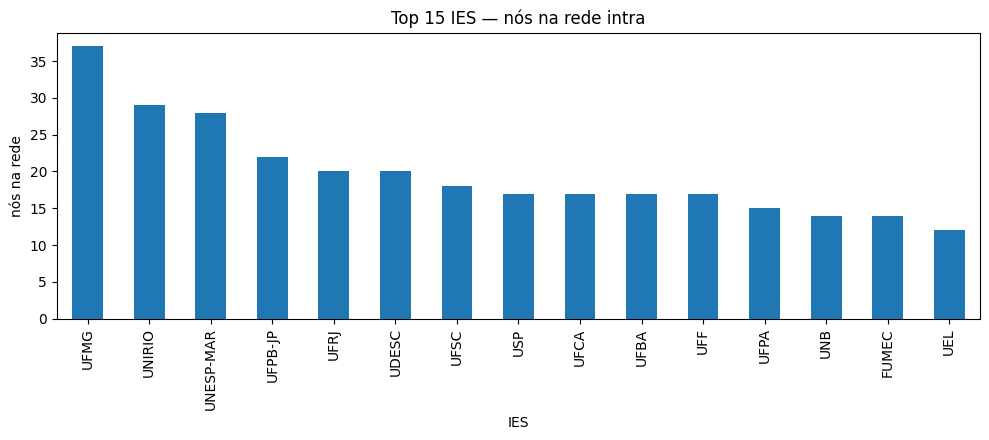


✔️ PARTE 1 concluída.
Arquivos salvos em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part1
 - GB_edges.csv
 - node_internal_activity.csv
 - auditoria_parte1.json
 - figs/*.png


In [ ]:
# =========================================================
# PARTE 1 — Rede INTRA PPGCI (sem solos) + Auditoria + Plots
# Pasta base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
# Entradas (da Parte 0):
#   part0/docentes_df.csv            (PPGCI-only, com metadados: UF, IES, etc.)
#   part0/producoes_parsed.csv       (título, ano, citations, autores_norm)
# Saídas:
#   part1/GB_edges.csv               (u, v, weight) — coautoria interna PPGCI
#   part1/node_internal_activity.csv (papers_count_ppgci_internal, citations_internal)
#   part1/auditoria_parte1.json
#   part1/figs/*.png                 (plots rápidos)
#
# Regras:
#   - Paper descartado se mega-autoria (>20 autores totais).
#   - Paper válido se tem ≥1 docente PPGCI.
#   - SOLO = paper com exatamente 1 PPGCI → Ignorado na criação de arestas.
#   - Arestas só entre PPGCI (coautoria interna).
# =========================================================

# !pip -q install pandas numpy networkx matplotlib

import os, json, ast, re, unicodedata, math, random
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display

RSEED = 42
np.random.seed(RSEED); random.seed(RSEED)

# --------- Drive seguro ---------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive com force_remount=True…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

# --------- Pastas ---------
BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P0   = os.path.join(BASE, "part0")
P1   = os.path.join(BASE, "part1")
FIG1 = os.path.join(P1, "figs")
for p in [P1, FIG1]: os.makedirs(p, exist_ok=True)

# --------- Utils ---------
def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

def parse_autores_norm(x):
    if isinstance(x, list): return x
    s = str(x)
    if s.strip().startswith("["):
        try: return [str(t).strip() for t in ast.literal_eval(s)]
        except Exception: pass
    return [p.strip() for p in s.split(",") if p.strip()]

# --------- Carrega entradas (Parte 0) ---------
doc_path  = os.path.join(P0, "docentes_df.csv")
prod_path = os.path.join(P0, "producoes_parsed.csv")

assert os.path.exists(doc_path),  f"Não encontrei {doc_path}. Rode a Parte 0 (com filtro PPGCI)."
assert os.path.exists(prod_path), f"Não encontrei {prod_path}. Rode a Parte 0."

docentes_df      = pd.read_csv(doc_path)
producoes_parsed = pd.read_csv(prod_path)
producoes_parsed["autores_norm"] = producoes_parsed["autores_norm"].apply(parse_autores_norm)

# --------- Parâmetros ---------
MAX_AUTHORS = 20   # mega-autoria
PRINT_SAMPLES = 10

# --------- Conjunto PPGCI ---------
if "nome_tokensort_norm" not in docentes_df.columns:
    raise KeyError("docentes_df.csv precisa da coluna 'nome_tokensort_norm'.")
ppgci_keys = set(docentes_df["nome_tokensort_norm"].astype(str))

# --------- Construção da rede INTRA (sem solos) ---------
papers_total = len(producoes_parsed)
discard_mega = 0
no_ppgci     = 0
valid_ge1    = 0
solo_ppgci   = 0

edge_rows = []
internal_activity = []  # (autor, papers_internal, citations_internal acumulados)

# Para acumular contagens internas por autor
auth_internal_papers = Counter()
auth_internal_cites  = Counter()

for _, r in producoes_parsed.iterrows():
    auth_all = r["autores_norm"] if isinstance(r["autores_norm"], list) else []
    if len(auth_all) > MAX_AUTHORS:
        discard_mega += 1
        continue

    auth_ppgci = [a for a in auth_all if a in ppgci_keys]
    if len(auth_ppgci) == 0:
        no_ppgci += 1
        continue

    valid_ge1 += 1
    cites = int(pd.to_numeric(r.get("citations", 0), errors="coerce") or 0)

    if len(auth_ppgci) == 1:
        # SOLO: não cria aresta (rede intra), mas contamos para auditoria
        solo_ppgci += 1
        continue

    # >= 2 PPGCI: criar arestas internas PPGCI
    # pares não direcionados únicos
    auth_ppgci = sorted(set(auth_ppgci))
    for i in range(len(auth_ppgci)):
        for j in range(i+1, len(auth_ppgci)):
            u, v = auth_ppgci[i], auth_ppgci[j]
            edge_rows.append((u, v, 1))

    # atividade interna por autor (conta 1 paper interno para cada PPGCI do paper)
    for a in auth_ppgci:
        auth_internal_papers[a] += 1
        auth_internal_cites[a]  += cites

# Agregar arestas
GB_edges = pd.DataFrame(edge_rows, columns=["u","v","weight"])
if not GB_edges.empty:
    GB_edges = GB_edges.groupby(["u","v"], as_index=False)["weight"].sum()

# Atividade interna por autor
if auth_internal_papers:
    node_internal = pd.DataFrame({
        "nome_tokensort_norm": list(auth_internal_papers.keys()),
        "papers_count_ppgci_internal": [auth_internal_papers[a] for a in auth_internal_papers.keys()],
        "citations_internal": [auth_internal_cites[a] for a in auth_internal_papers.keys()],
    })
else:
    node_internal = pd.DataFrame(columns=["nome_tokensort_norm","papers_count_ppgci_internal","citations_internal"])

# --------- Grafo e estatísticas de rede ---------
G = nx.Graph()
for _, r in GB_edges.iterrows():
    G.add_edge(r["u"], r["v"], weight=float(r["weight"]))

n_nodes_graph = G.number_of_nodes()
n_edges_graph = G.number_of_edges()
n_components  = nx.number_connected_components(G) if n_nodes_graph>0 else 0
largest_cc    = max((len(c) for c in nx.connected_components(G)), default=0)

# --------- Auditoria ---------
aud = {
    "papers_total": int(papers_total),
    "discarded_mega_authors_gt20": int(discard_mega),
    "without_any_ppgci": int(no_ppgci),
    "valid_ge1_ppgci": int(valid_ge1),
    "solo_exactly1_ppgci": int(solo_ppgci),
    "valid_for_edges_internal": int(valid_ge1 - solo_ppgci),
    "edges_final": int(n_edges_graph),
    "nodes_in_graph": int(n_nodes_graph),
    "components": int(n_components),
    "largest_component": int(largest_cc),
    "max_authors_per_paper": int(MAX_AUTHORS)
}
safe_save_json(aud, os.path.join(P1, "auditoria_parte1.json"))

# --------- Salvamento ---------
safe_save_csv(GB_edges,     os.path.join(P1, "GB_edges.csv"))
safe_save_csv(node_internal,os.path.join(P1, "node_internal_activity.csv"))

# --------- Impressões elegantes ---------
print(f"Papers processados: {papers_total}")
print(f" - descartados por mega-autoria (> {MAX_AUTHORS}): {discard_mega}")
print(f" - sem pelo menos 1 docente PPGCI: {no_ppgci}")
print(f" - válidos (≥1 PPGCI): {valid_ge1}  | sendo solo = {solo_ppgci}")
print(f"\n=== AUDITORIA PARTE 1 ===")
print(f"edges_final: {n_edges_graph}")
print(f"nodes_in_graph: {n_nodes_graph}")
print(f"componentes: {n_components} | maior componente: {largest_cc}")
print(f"max_authors_per_paper: {MAX_AUTHORS}")

# --------- Plots leves ---------
# 1) Grau e força (no momento, 'weight' é contagem de coautorias internas)
if n_nodes_graph > 0:
    deg = dict(G.degree())
    strength = defaultdict(float)
    for u, v, d in G.edges(data=True):
        w = float(d.get("weight",1.0))
        strength[u] += w; strength[v] += w

    df_deg = pd.DataFrame({"nome_tokensort_norm": list(deg.keys()), "degree": list(deg.values())})
    df_str = pd.DataFrame({"nome_tokensort_norm": list(strength.keys()), "strength": list(strength.values())})
    deg_str = df_deg.merge(df_str, on="nome_tokensort_norm", how="outer").fillna(0)

    plt.figure()
    plt.hist(deg_str["degree"], bins=range(1, int(deg_str["degree"].max())+2))
    plt.title("Distribuição de grau — rede intra PPGCI (sem solos)")
    plt.xlabel("grau"); plt.ylabel("nós")
    plt.tight_layout(); plt.show()
    plt.close()

    plt.figure()
    plt.scatter(deg_str["degree"], deg_str["strength"], s=10, alpha=0.6)
    plt.xlabel("grau"); plt.ylabel("força (coautorias internas)")
    plt.title("Grau vs Força — rede intra")
    plt.tight_layout(); plt.show()
    plt.close()

    # Top autores por papers internos
    if not node_internal.empty:
        top_auth = node_internal.sort_values("papers_count_ppgci_internal", ascending=False).head(15)
        plt.figure(figsize=(10,4.5))
        plt.bar(top_auth["nome_tokensort_norm"], top_auth["papers_count_ppgci_internal"])
        plt.xticks(rotation=60, ha="right")
        plt.title("Top 15 autores — papers internos PPGCI")
        plt.ylabel("papers internos (≥2 PPGCI)")
        plt.tight_layout(); plt.show()
        plt.close()

        # salva figuras
        plt.figure()
        plt.hist(deg_str["degree"], bins=range(1, int(deg_str["degree"].max())+2))
        plt.title("Distribuição de grau — rede intra PPGCI (sem solos)")
        plt.xlabel("grau"); plt.ylabel("nós")
        plt.tight_layout(); plt.savefig(os.path.join(FIG1,"degree_hist.png"), dpi=160); plt.close()

        plt.figure()
        plt.scatter(deg_str["degree"], deg_str["strength"], s=10, alpha=0.6)
        plt.xlabel("grau"); plt.ylabel("força (coautorias internas)")
        plt.title("Grau vs Força — rede intra")
        plt.tight_layout(); plt.savefig(os.path.join(FIG1,"degree_vs_strength.png"), dpi=160); plt.close()

        plt.figure(figsize=(10,4.5))
        plt.bar(top_auth["nome_tokensort_norm"], top_auth["papers_count_ppgci_internal"])
        plt.xticks(rotation=60, ha="right")
        plt.title("Top 15 autores — papers internos PPGCI")
        plt.ylabel("papers internos (≥2 PPGCI)")
        plt.tight_layout(); plt.savefig(os.path.join(FIG1,"top_authors_internal.png"), dpi=160); plt.close()

# 2) UF/IES dos nós presentes na rede (integração com cadastro)
if n_nodes_graph > 0 and {"SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO","nome_tokensort_norm"}.issubset(docentes_df.columns):
    nodes_df = pd.DataFrame({"nome_tokensort_norm": list(G.nodes())})
    nodes_meta = nodes_df.merge(docentes_df[["nome_tokensort_norm","SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO"]],
                                on="nome_tokensort_norm", how="left")

    top_uf = nodes_meta["SG_UF_PROGRAMA"].fillna("NA").value_counts().head(15)
    plt.figure()
    top_uf.plot(kind="bar")
    plt.title("Top 15 UFs — nós na rede intra")
    plt.xlabel("UF"); plt.ylabel("nós na rede")
    plt.tight_layout(); plt.show()
    plt.close()

    top_ies = nodes_meta["SG_ENTIDADE_ENSINO"].fillna("NA").value_counts().head(15)
    plt.figure(figsize=(10,4.5))
    top_ies.plot(kind="bar")
    plt.title("Top 15 IES — nós na rede intra")
    plt.xlabel("IES"); plt.ylabel("nós na rede")
    plt.tight_layout(); plt.show()
    plt.close()

    # salva
    plt.figure()
    top_uf.plot(kind="bar")
    plt.title("Top 15 UFs — nós na rede intra")
    plt.xlabel("UF"); plt.ylabel("nós na rede")
    plt.tight_layout(); plt.savefig(os.path.join(FIG1,"nodes_by_UF.png"), dpi=160); plt.close()

    plt.figure(figsize=(10,4.5))
    top_ies.plot(kind="bar")
    plt.title("Top 15 IES — nós na rede intra")
    plt.xlabel("IES"); plt.ylabel("nós na rede")
    plt.tight_layout(); plt.savefig(os.path.join(FIG1,"nodes_by_IES.png"), dpi=160); plt.close()

print("\n✔️ PARTE 1 concluída.")
print("Arquivos salvos em:", P1)
print(" - GB_edges.csv")
print(" - node_internal_activity.csv")
print(" - auditoria_parte1.json")
print(" - figs/*.png")


🔗 Drive já montado em /content/drive
Nós: 373 | Arestas: 1340

=== MOO β ===
β=0.25 | Q=0.600 | V(UF)=0.577 | V(IES)=0.616 | NMI=0.881 | Hnorm=0.831
β=0.50 | Q=0.613 | V(UF)=0.553 | V(IES)=0.622 | NMI=0.804 | Hnorm=0.869
β=0.75 | Q=0.657 | V(UF)=0.525 | V(IES)=0.574 | NMI=0.931 | Hnorm=0.891
β=1.00 | Q=0.703 | V(UF)=0.520 | V(IES)=0.572 | NMI=0.951 | Hnorm=0.887

Pareto-front: [0.25, 0.5, 0.75, 1.0]
β* escolhido: 0.50  (mantido por estar no Pareto)

✔️ PARTE 2 concluída.
Arquivos salvos em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part2
 - edges_beta.csv
 - nodes_plus_clusters.csv
 - moo_beta_metrics.json
 - auditoria_parte2.json

== Comparativo por β ==


,beta,Q,V_UF,V_IES,NMI,Hnorm,K
0,0.25,0.599764,0.576884,0.615578,0.880911,0.831408,13
1,0.50,0.613267,0.553379,0.622304,0.803556,0.868905,16
2,0.75,0.657406,0.524965,0.574433,0.931416,0.890770,17
3,1.00,0.703330,0.520382,0.572034,0.950961,0.887269,17


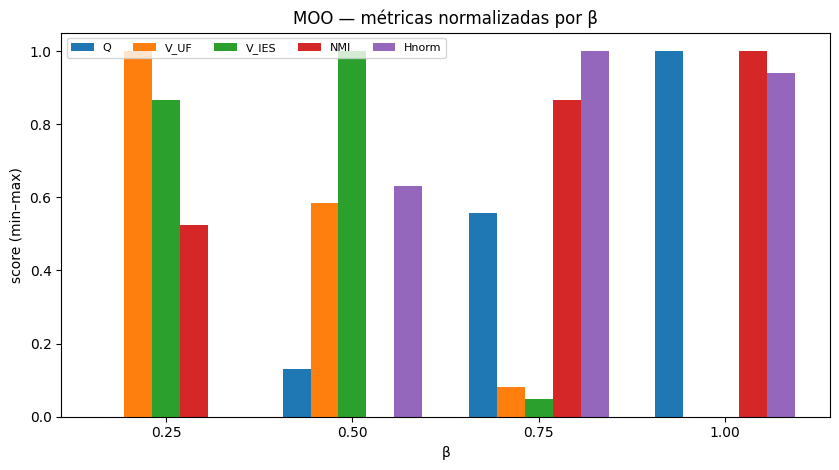

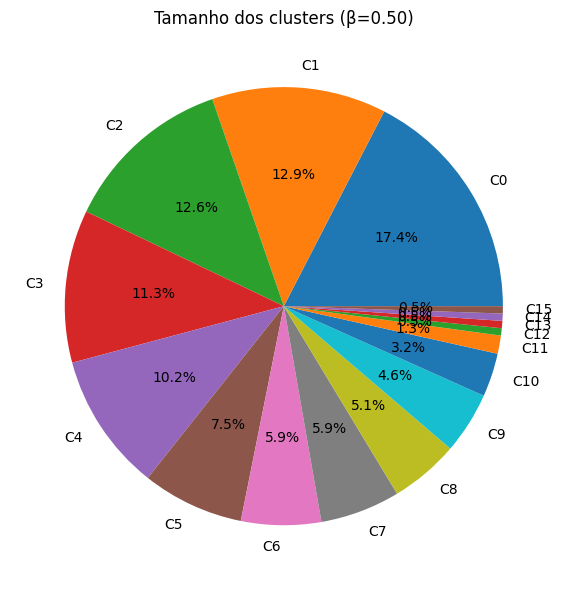

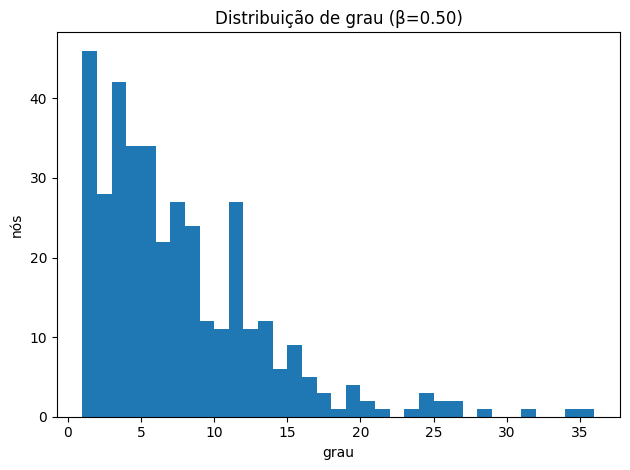

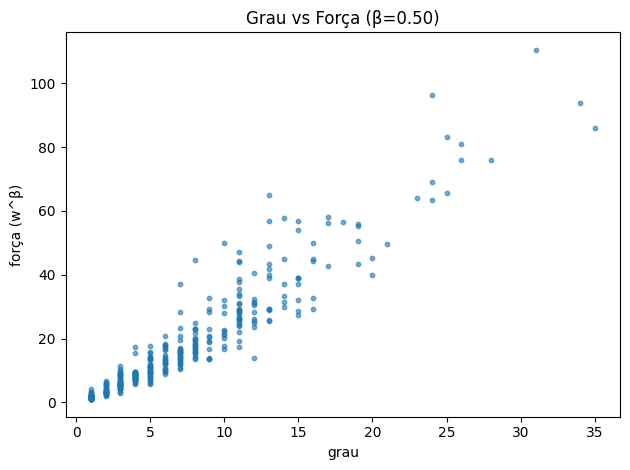

In [ ]:
# =========================================================
# PARTE 2 — MOO para escolha de β + comunidades (greedy)
# Base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
# Entradas:
#   part1/GB_edges.csv                (u,v,weight) — coautoria interna (sem solos)
#   part0/docentes_df.csv            (PPGCI-only; UF/IES/Programa etc.)
# Saídas:
#   part2/edges_beta.csv
#   part2/nodes_plus_clusters.csv
#   part2/moo_beta_metrics.json
#   part2/auditoria_parte2.json
#   part2/figs/*.png
# =========================================================

# !pip -q install pandas numpy networkx scikit-learn matplotlib

import os, json, math, random, re, unicodedata
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import LabelEncoder

RSEED = 42
random.seed(RSEED); np.random.seed(RSEED)

# ---------- Drive + paths ----------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P0, P1, P2 = [os.path.join(BASE, f"part{i}") for i in [0,1,2]]
FIG = os.path.join(P2, "figs")
os.makedirs(P2, exist_ok=True)
os.makedirs(FIG, exist_ok=True)

# ---------- helpers ----------
def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

def cramers_v_from_labels(y_true, y_pred):
    """Cramér’s V calculado a partir de duas variáveis categóricas."""
    # tabela de contingência
    ct = pd.crosstab(pd.Series(y_true, dtype="category"),
                     pd.Series(y_pred, dtype="category"))
    n = ct.values.sum()
    if n == 0: return 0.0
    chi2 = ((ct - (ct.sum(1).values.reshape(-1,1) @ (ct.sum(0).values.reshape(1,-1)))/n)**2 /
            ((ct.sum(1).values.reshape(-1,1) @ (ct.sum(0).values.reshape(1,-1)))/n + 1e-12)).values.sum()
    r, c = ct.shape
    denom = n * (min(r-1, c-1) if min(r-1,c-1) > 0 else 1)
    return float(np.sqrt(chi2 / denom))

def entropy_normalized(labels):
    """Entropia normalizada (0..1) dos tamanhos de cluster."""
    if len(labels)==0: return 0.0
    vals, counts = np.unique(labels, return_counts=True)
    p = counts / counts.sum()
    H = -(p * np.log(p + 1e-12)).sum()
    Hmax = math.log(len(vals)) if len(vals)>1 else 1.0
    return float(H / Hmax)

def to_partition_dict(communities):
    """Comunidades -> dict node->label"""
    part = {}
    for i, comm in enumerate(communities):
        for n in comm:
            part[n] = i
    return part

def greedy_partition_and_Q(G, weight="weight"):
    comms = list(nx.algorithms.community.greedy_modularity_communities(G, weight=weight))
    Q = nx.algorithms.community.modularity(G, comms, weight=weight)
    return comms, float(Q)

def nmi_stability(G, base_labels, weight="weight", B=6, jitter=0.15):
    """NMI médio após B bootstraps leves nas arestas (multiplicador ~ U[1-j,1+j])."""
    nodes = list(G.nodes())
    encoder = {n:i for i,n in enumerate(nodes)}
    base = np.array([base_labels.get(n, -1) for n in nodes], dtype=int)
    if (base<0).any():  # se houver nós sem rótulo
        return 0.0

    nmis = []
    for _ in range(B):
        Gb = nx.Graph()
        Gb.add_nodes_from(G.nodes())
        for u,v,d in G.edges(data=True):
            w = float(d.get(weight,1.0))
            mult = 1.0 + np.random.uniform(-jitter, jitter)
            Gb.add_edge(u,v, **{weight: max(w*mult, 1e-6)})
        comms_b, _ = greedy_partition_and_Q(Gb, weight=weight)
        lab_b = to_partition_dict(comms_b)
        b = np.array([lab_b.get(n, -1) for n in nodes], dtype=int)
        if (b<0).any():
            nmis.append(0.0)
        else:
            nmis.append(float(normalized_mutual_info_score(base, b)))
    return float(np.mean(nmis)) if nmis else 0.0

# ---------- Carrega entradas ----------
edges_path = os.path.join(P1, "GB_edges.csv")
meta_path  = os.path.join(P0, "docentes_df.csv")
assert os.path.exists(edges_path), f"Não encontrei {edges_path}. Rode a Parte 1."
assert os.path.exists(meta_path),  f"Não encontrei {meta_path}. Rode a Parte 0/patch PPGCI."

E = pd.read_csv(edges_path)   # u,v,weight
D = pd.read_csv(meta_path)    # nome_tokensort_norm + UF/IES etc.

ppgci = set(D["nome_tokensort_norm"].astype(str))
E = E[(E["u"].isin(ppgci)) & (E["v"].isin(ppgci))].copy()

# ---------- Grafo base ----------
G0 = nx.Graph()
for _, r in E.iterrows():
    G0.add_edge(r["u"], r["v"], weight=float(r["weight"]))
N0, M0 = G0.number_of_nodes(), G0.number_of_edges()
print(f"Nós: {N0} | Arestas: {M0}")

# ---------- Beta grid & MOO ----------
BETA_GRID = [0.25, 0.50, 0.75, 1.00]  # você pode ajustar
TARGET_BETA = 0.50                     # preferência do estudo

# atributos institucional/geográficos
UF_by_node  = D.set_index("nome_tokensort_norm")["SG_UF_PROGRAMA"].to_dict() if "SG_UF_PROGRAMA" in D.columns else {}
IES_by_node = D.set_index("nome_tokensort_norm")["SG_ENTIDADE_ENSINO"].to_dict() if "SG_ENTIDADE_ENSINO" in D.columns else {}

def evaluate_beta(beta):
    # repondera arestas: w' = w^β
    Gb = nx.Graph()
    Gb.add_nodes_from(G0.nodes())
    for u,v,d in G0.edges(data=True):
        wb = float(d["weight"]) ** float(beta)
        Gb.add_edge(u,v, weight=wb)

    # comunidades (greedy) e modularidade
    comms, Q = greedy_partition_and_Q(Gb, weight="weight")
    part = to_partition_dict(comms)
    labels = [part[n] for n in Gb.nodes()]

    # entropia normalizada de tamanhos (balanceamento)
    Hn = entropy_normalized(labels)

    # Cramér’s V: cluster x UF / IES
    y_cluster = labels
    y_uf  = [UF_by_node.get(n, "NA") for n in Gb.nodes()]
    y_ies = [IES_by_node.get(n, "NA") for n in Gb.nodes()]
    V_uf  = cramers_v_from_labels(y_uf, y_cluster)  if any(pd.notna(y_uf))  else 0.0
    V_ies = cramers_v_from_labels(y_ies, y_cluster) if any(pd.notna(y_ies)) else 0.0

    # estabilidade (NMI sob jitter)
    stab = nmi_stability(Gb, part, weight="weight", B=6, jitter=0.15)

    # tamanhos
    sizes = sorted([len(c) for c in comms], reverse=True)
    K = len(sizes)

    return {
        "beta": beta,
        "Q_modularity": Q,
        "clusters": K,
        "size_top5": sizes[:5],
        "entropy_norm": Hn,
        "cramersV_UF": V_uf,
        "cramersV_IES": V_ies,
        "stability_NMI": stab,
        "partition": part,  # dicionário node->cluster
    }

results = [evaluate_beta(b) for b in BETA_GRID]

# ---------- Pareto (maximizar métricas) ----------
OBJ_KEYS = ["Q_modularity","cramersV_UF","cramersV_IES","stability_NMI","entropy_norm"]

def dominates(a, b):
    ge_all = all(a[k] >= b[k] for k in OBJ_KEYS)
    gt_any = any(a[k] >  b[k] for k in OBJ_KEYS)
    return ge_all and gt_any

pareto = []
for i, ri in enumerate(results):
    if not any(dominates(rj, ri) for j, rj in enumerate(results) if j!=i):
        pareto.append(ri)

# normalização min-max para desempate “compromisso”
mins = {k: min(r[k] for r in results) for k in OBJ_KEYS}
maxs = {k: max(r[k] for r in results) for k in OBJ_KEYS}
def score(r):
    s = 0.0
    for k in OBJ_KEYS:
        den = (maxs[k]-mins[k]) or 1.0
        s += (r[k]-mins[k]) / den
    return float(s)

# escolha final:
# 1) se TARGET_BETA está na frente de Pareto → mantemos (justificável).
# 2) senão, escolhemos o maior score(r) entre os pontos de Pareto.
chosen = None
target_on_pareto = any(abs(r["beta"]-TARGET_BETA) < 1e-9 for r in pareto)
if target_on_pareto:
    chosen = [r for r in pareto if abs(r["beta"]-TARGET_BETA) < 1e-9][0]
else:
    chosen = max(pareto, key=score)

BSTAR = chosen["beta"]
print("\n=== MOO β ===")
for r in results:
    print(f"β={r['beta']:.2f} | Q={r['Q_modularity']:.3f} | V(UF)={r['cramersV_UF']:.3f} | "
          f"V(IES)={r['cramersV_IES']:.3f} | NMI={r['stability_NMI']:.3f} | Hnorm={r['entropy_norm']:.3f}")
print(f"\nPareto-front: {[round(r['beta'],2) for r in pareto]}")
print(f"β* escolhido: {BSTAR:.2f}  ({'mantido por estar no Pareto' if target_on_pareto else 'compromisso por score'})")

# ---------- Reconstroi grafo final com β* e salva ----------
Gb = nx.Graph()
Gb.add_nodes_from(G0.nodes())
for u,v,d in G0.edges(data=True):
    wb = float(d["weight"]) ** float(BSTAR)
    Gb.add_edge(u,v, weight=wb)

# comunidades finais (greedy)
comms_star, Q_star = greedy_partition_and_Q(Gb, weight="weight")
part_star = to_partition_dict(comms_star)
labels_star = [part_star[n] for n in Gb.nodes()]

# degree/strength
deg = dict(Gb.degree())
strength = defaultdict(float)
for u,v,d in Gb.edges(data=True):
    w = float(d.get("weight",1.0))
    strength[u] += w; strength[v] += w

# tabela de nós + meta
nodes_df = pd.DataFrame({"nome_tokensort_norm": list(Gb.nodes())})
keep_meta = ["SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO","NM_PROGRAMA_IES","NM_IES_TITULACAO","NM_ORIENTADOR","NM_COORIENTADOR","acad_age","nota_prog"]
meta_cols = [c for c in keep_meta if c in D.columns]
nodes_df = nodes_df.merge(D[["nome_tokensort_norm"]+meta_cols], on="nome_tokensort_norm", how="left")
nodes_df["degree"]   = nodes_df["nome_tokensort_norm"].map(deg).fillna(0).astype(int)
nodes_df["strength"] = nodes_df["nome_tokensort_norm"].map(strength).fillna(0.0)
nodes_df["cluster_mod"] = nodes_df["nome_tokensort_norm"].map(part_star).astype(int)

# edges com weight_beta
E_beta = []
for u,v,d in Gb.edges(data=True):
    E_beta.append((u,v,float(d["weight"])))
edges_beta = pd.DataFrame(E_beta, columns=["u","v","weight_beta"])

# ---------- Salvamento ----------
safe_save_csv(edges_beta, os.path.join(P2, "edges_beta.csv"))
safe_save_csv(nodes_df,  os.path.join(P2, "nodes_plus_clusters.csv"))

moo_dump = {
    "beta_grid": BETA_GRID,
    "target_beta": TARGET_BETA,
    "pareto_front": [r["beta"] for r in pareto],
    "chosen_beta": float(BSTAR),
    "results": [
        {k:(v if k!="partition" else None) for k,v in r.items()}  # não salvar partições cruas
        for r in results
    ]
}
safe_save_json(moo_dump, os.path.join(P2, "moo_beta_metrics.json"))

aud = {
    "nodes": int(Gb.number_of_nodes()),
    "edges": int(Gb.number_of_edges()),
    "Q_modularity_star": float(Q_star),
    "clusters_star": int(len(comms_star)),
}
safe_save_json(aud, os.path.join(P2, "auditoria_parte2.json"))

print("\n✔️ PARTE 2 concluída.")
print("Arquivos salvos em:", P2)
print(" - edges_beta.csv")
print(" - nodes_plus_clusters.csv")
print(" - moo_beta_metrics.json")
print(" - auditoria_parte2.json")

# ---------- Plots elegantes de comparação por β ----------
# Tabela comparativa
comp = pd.DataFrame([{
    "beta": r["beta"],
    "Q": r["Q_modularity"],
    "V_UF": r["cramersV_UF"],
    "V_IES": r["cramersV_IES"],
    "NMI": r["stability_NMI"],
    "Hnorm": r["entropy_norm"],
    "K": r["clusters"]
} for r in results]).sort_values("beta")
print("\n== Comparativo por β ==")
display(comp)

# Barras múltiplas (normalizadas para visual)
fig, ax = plt.subplots(figsize=(8.5,4.8))
metrics = ["Q","V_UF","V_IES","NMI","Hnorm"]
mm = comp.copy()
for m in metrics:
    denom = (mm[m].max()-mm[m].min()) or 1.0
    mm[m] = (mm[m]-mm[m].min())/denom
w = 0.15
xs = np.arange(len(mm))
for i,m in enumerate(metrics):
    ax.bar(xs + (i-2)*w, mm[m].values, width=w, label=m)
ax.set_xticks(xs); ax.set_xticklabels([f"{b:.2f}" for b in mm["beta"].values])
ax.set_ylabel("score (min–max)")
ax.set_xlabel("β")
ax.set_title("MOO — métricas normalizadas por β")
ax.legend(ncol=5, fontsize=8)
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG,"moo_metrics_by_beta.png"), dpi=160); plt.close()

# Pizza dos tamanhos no β*
sizes = sorted([len(c) for c in comms_star], reverse=True)
labels = [f"C{i}" for i in range(len(sizes))]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct=lambda p: f"{p:.1f}%")
plt.title(f"Tamanho dos clusters (β={BSTAR:.2f})")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG,"cluster_sizes_pie_beta_star.png"), dpi=160); plt.close()

# Distribuições simples
plt.figure()
plt.hist(nodes_df["degree"], bins=range(1, int(nodes_df["degree"].max())+2))
plt.title(f"Distribuição de grau (β={BSTAR:.2f})")
plt.xlabel("grau"); plt.ylabel("nós")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG,"degree_hist_beta_star.png"), dpi=160); plt.close()

plt.figure()
plt.scatter(nodes_df["degree"], nodes_df["strength"], s=10, alpha=0.6)
plt.xlabel("grau"); plt.ylabel("força (w^β)")
plt.title(f"Grau vs Força (β={BSTAR:.2f})")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG,"degree_vs_strength_beta_star.png"), dpi=160); plt.close()


🔗 Drive já montado em /content/drive
β* (escolhido na Parte 2): 0.50

=== TAMANHO DOS CLUSTERS ===
 cluster_mod  size
           0    65
           1    48
           2    47
           3    42
           4    38
           5    28
           6    22
           7    22
           8    19
           9    17
          10    12
          11     5
          12     2
          13     2
          14     2
          15     2

=== Cramér’s V (associações) ===


,pair,cramers_v,p_value,chi2,n_rows,n_cols
0,SG_UF_PROGRAMA x cluster_mod,0.553379,5.634938e-227,1713.344632,16,16
1,SG_ENTIDADE_ENSINO x cluster_mod,0.622304,5.716560e-267,2166.734695,23,16
2,NM_PROGRAMA_IES x cluster_mod,0.489245,2.847389e-85,714.253548,9,16
3,NM_IES_TITULACAO x SG_ENTIDADE_ENSINO,0.560977,5.214980e-78,2582.387093,63,23



=== Kruskal–Wallis entre clusters (variáveis numéricas) ===


,variable,H_stat,p_value
7,nota_prog,90.651749,7.495470e-13
3,citations_internal,78.492850,1.315968e-10
1,strength,73.415454,1.092958e-09
0,degree,71.815123,2.117543e-09
2,papers_count_ppgci_internal,68.939021,6.897795e-09
4,works_total,48.538022,2.081739e-05
5,citations_total,41.335403,2.842212e-04
6,acad_age,29.551048,1.364740e-02


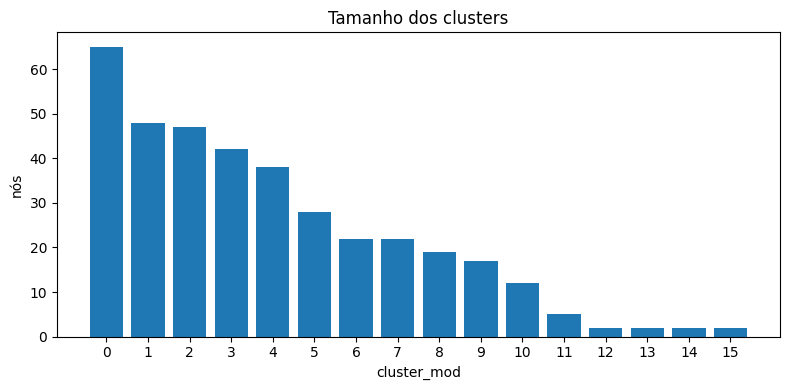

/tmp/ipython-input-396002625.py:259: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(k) for k in order], showfliers=False)


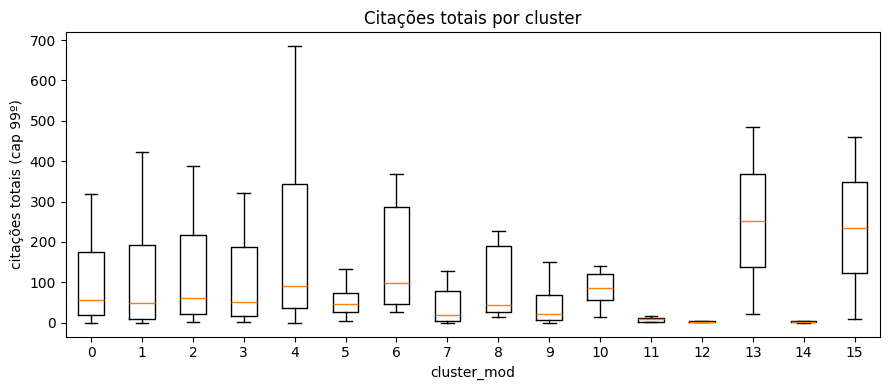

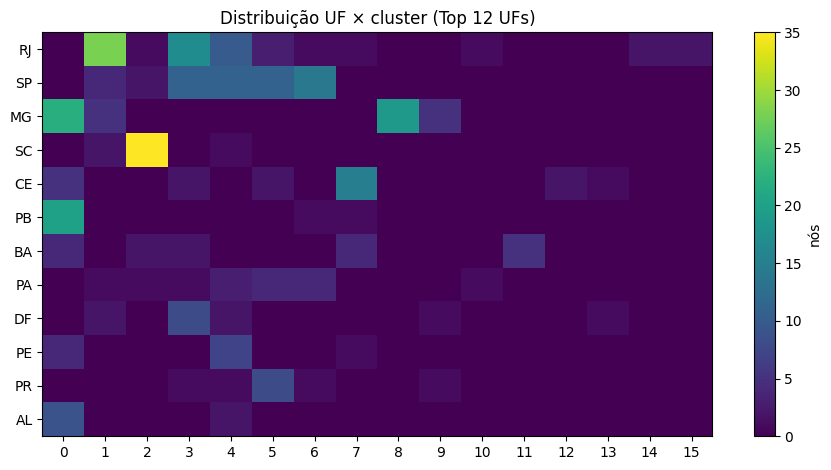

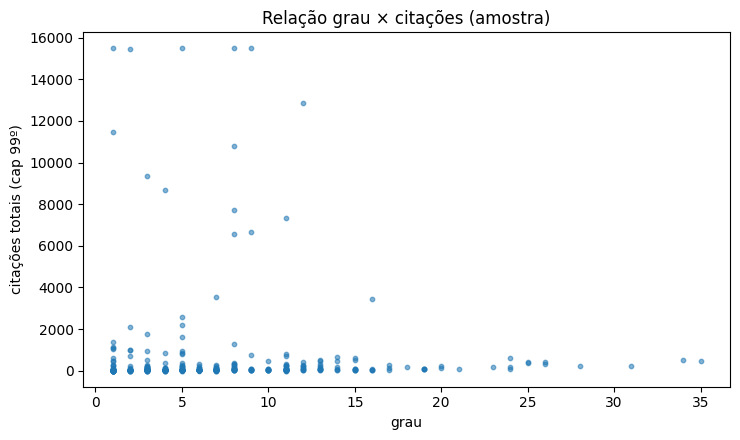

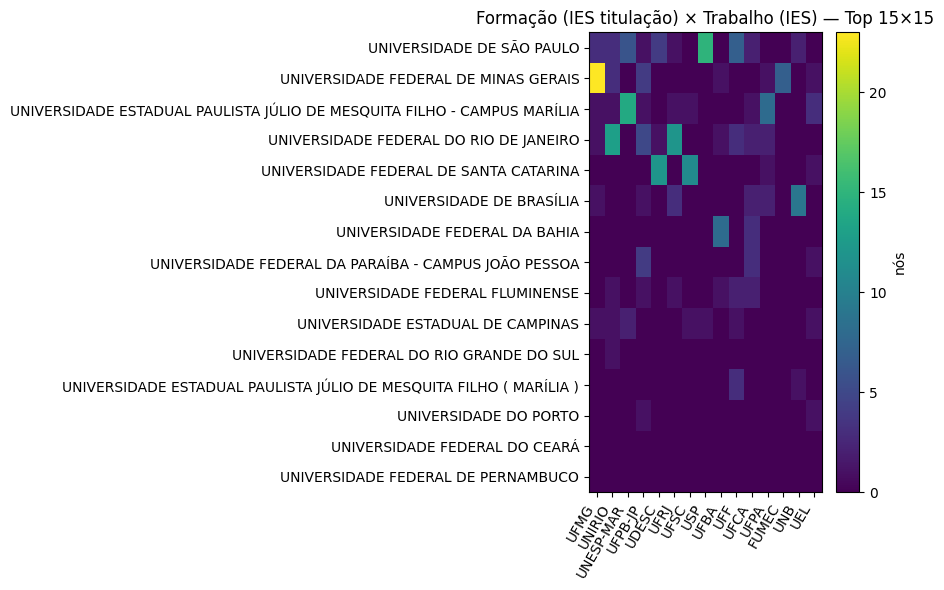


✔️ PARTE 3 concluída.
Arquivos salvos em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part3
 - nodes_analysis.csv
 - cluster_summary.csv
 - cramers_v.csv
 - kruskal_wallis.csv
 - report_exploratorio.md
 - figs/*.png


In [ ]:
# =========================================================
# PARTE 3 — Replicação + Extensão Interpretável
# Base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
#
# Entradas:
#   part2/nodes_plus_clusters.csv   (nós + meta + degree/strength + cluster_mod)
#   part2/edges_beta.csv            (opcional p/ contagens)
#   part2/moo_beta_metrics.json     (β escolhido)
#   part1/node_internal_activity.csv
#   part0/prod_features_min_ppgci.csv
#   part0/autores_final_std.csv
#
# Saídas:
#   part3/nodes_analysis.csv
#   part3/cluster_summary.csv
#   part3/cramers_v.csv
#   part3/kruskal_wallis.csv
#   part3/report_exploratorio.md
#   part3/figs/*.png
# =========================================================

# !pip -q install pandas numpy networkx matplotlib

import os, json, math, random, re, unicodedata
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tentar SciPy para p-values; cair para H/V sem p se indisponível
try:
    from scipy.stats import chi2_contingency, kruskal
    SCIPY_OK = True
except Exception:
    SCIPY_OK = False

RSEED = 42
np.random.seed(RSEED); random.seed(RSEED)

# ---------- Drive + paths ----------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P0, P1, P2, P3 = [os.path.join(BASE, f"part{i}") for i in [0,1,2,3]]
FIG = os.path.join(P3, "figs")
os.makedirs(P3, exist_ok=True)
os.makedirs(FIG, exist_ok=True)

# ---------- helpers ----------
def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

def cramers_v_table(ct: pd.DataFrame):
    """Cramér’s V e (se SciPy) p-valor do qui-quadrado."""
    n = ct.values.sum()
    if n == 0 or ct.shape[0]<2 or ct.shape[1]<2:
        return 0.0, None, 0.0
    if SCIPY_OK:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    else:
        # estima qui² manual (esperadas)
        E = np.outer(ct.sum(1).values, ct.sum(0).values) / n
        chi2 = ((ct - E)**2 / (E + 1e-12)).values.sum()
        dof = (ct.shape[0]-1)*(ct.shape[1]-1)
        p = None
    V = float(np.sqrt(chi2 / (n * (min(ct.shape)-1))))
    return V, p, chi2

def kw_by_group(df: pd.DataFrame, group_col: str, vars_num: list):
    """Kruskal–Wallis por variável numérica entre grupos."""
    rows=[]
    groups = [g for _,g in df.groupby(group_col)]
    for v in vars_num:
        data = [g[v].dropna().values for g in groups]
        # ignorar variáveis muito vazias
        if sum(len(x)>0 for x in data) < 2:
            rows.append((v, np.nan, np.nan)); continue
        if SCIPY_OK:
            H, p = kruskal(*data)
            rows.append((v, float(H), float(p)))
        else:
            # fallback: usa H ~ qui², sem p
            # rankeia globalmente
            x = np.concatenate([d for d in data if len(d)>0])
            ranks = pd.Series(x).rank().values
            Ns = np.array([len(d) for d in data if len(d)>0])
            # médias de postos por grupo (aproximação simples)
            pos=0; Rbars=[]
            for d in data:
                if len(d)==0: continue
                Rbars.append(ranks[pos:pos+len(d)].mean()); pos += len(d)
            N = len(x); k = len(Ns)
            H = (12/(N*(N+1))) * np.sum(Ns*(np.array(Rbars) - (N+1)/2.0)**2) - 3*(N+1)
            rows.append((v, float(H), np.nan))
    out = pd.DataFrame(rows, columns=["variable","H_stat","p_value"])
    return out

def cap_outliers(s: pd.Series, q=0.99):
    if s.isna().all(): return s
    hi = s.quantile(q)
    return s.clip(upper=hi)

# ---------- carregar entradas ----------
nodes_path   = os.path.join(P2, "nodes_plus_clusters.csv")
edgesB_path  = os.path.join(P2, "edges_beta.csv")
moo_path     = os.path.join(P2, "moo_beta_metrics.json")
intern_path  = os.path.join(P1, "node_internal_activity.csv")
feat0_path   = os.path.join(P0, "prod_features_min_ppgci.csv")
autor_path   = os.path.join(P0, "autores_final_std.csv")

for pth in [nodes_path, intern_path, feat0_path]:
    assert os.path.exists(pth), f"Arquivo necessário ausente: {pth}"

nodes = pd.read_csv(nodes_path)
edgesB = pd.read_csv(edgesB_path) if os.path.exists(edgesB_path) else pd.DataFrame(columns=["u","v","weight_beta"])
moo   = json.load(open(moo_path)) if os.path.exists(moo_path) else {"chosen_beta": 0.50}
intern= pd.read_csv(intern_path)
feat0 = pd.read_csv(feat0_path)
autor = pd.read_csv(autor_path) if os.path.exists(autor_path) else pd.DataFrame(columns=["nome_tokensort_norm","aut_total_citations","aut_total_works"])

BSTAR = float(moo.get("chosen_beta", 0.50))

# ---------- integrar tabelas ----------
df = nodes.merge(intern, on="nome_tokensort_norm", how="left")\
          .merge(feat0, on="nome_tokensort_norm", how="left")\
          .merge(autor, on="nome_tokensort_norm", how="left")

# preenchimentos
for c in ["papers_count_ppgci_internal","citations_internal","works_count","total_citations","works_last5y","cites_last5y","aut_total_citations","aut_total_works"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# variáveis "total" (preferir autores_final se existir)
df["works_total"]    = np.where(df.get("aut_total_works").notna(),    df.get("aut_total_works"),    df.get("works_count"))
df["citations_total"]= np.where(df.get("aut_total_citations").notna(),df.get("aut_total_citations"),df.get("total_citations"))

# sanity de clusters
df = df[df["cluster_mod"].notna()].copy()
df["cluster_mod"] = df["cluster_mod"].astype(int)

# ---------- SUMÁRIO por cluster ----------
num_cols = [c for c in ["degree","strength","papers_count_ppgci_internal","citations_internal",
                        "works_count","works_last5y","citations_total","cites_last5y","works_total",
                        "acad_age","nota_prog"]
            if c in df.columns]

summ = df.groupby("cluster_mod").agg(
    size=("nome_tokensort_norm","count"),
    **{f"{c}_mean": (c,"mean") for c in num_cols},
    **{f"{c}_median": (c,"median") for c in num_cols}
).reset_index()

# ---------- TESTES ----------
# Cramér’s V: cluster × UF, IES, Programa
cv_rows = []
for cat in ["SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO","NM_PROGRAMA_IES"]:
    if cat in df.columns:
        ct = pd.crosstab(df[cat].fillna("NA"), df["cluster_mod"])
        V, p, chi2 = cramers_v_table(ct)
        cv_rows.append((f"{cat} x cluster_mod", float(V), (None if p is None else float(p)), float(chi2), int(ct.shape[0]), int(ct.shape[1])))
# Formação × Trabalho (NM_IES_TITULACAO × SG_ENTIDADE_ENSINO)
if {"NM_IES_TITULACAO","SG_ENTIDADE_ENSINO"}.issubset(df.columns):
    ct = pd.crosstab(df["NM_IES_TITULACAO"].fillna("NA"), df["SG_ENTIDADE_ENSINO"].fillna("NA"))
    V, p, chi2 = cramers_v_table(ct)
    cv_rows.append(("NM_IES_TITULACAO x SG_ENTIDADE_ENSINO", float(V), (None if p is None else float(p)), float(chi2), int(ct.shape[0]), int(ct.shape[1])))

# Orientador × Coorientador (se houver)
if {"NM_ORIENTADOR","NM_COORIENTADOR"}.issubset(df.columns):
    has_both = df["NM_ORIENTADOR"].notna() & df["NM_COORIENTADOR"].notna()
    if has_both.any():
        ct = pd.crosstab(df.loc[has_both,"NM_ORIENTADOR"].fillna("NA"),
                         df.loc[has_both,"NM_COORIENTADOR"].fillna("NA"))
        # reduzir tabela para top categorias (evitar matriz gigante)
        top_r = ct.sum(1).sort_values(ascending=False).head(30).index
        top_c = ct.sum(0).sort_values(ascending=False).head(30).index
        ct_small = ct.loc[top_r, top_c]
        V, p, chi2 = cramers_v_table(ct_small)
        cv_rows.append(("NM_ORIENTADOR x NM_COORIENTADOR (top30x30)", float(V), (None if p is None else float(p)), float(chi2), int(ct_small.shape[0]), int(ct_small.shape[1])))

cram_df = pd.DataFrame(cv_rows, columns=["pair","cramers_v","p_value","chi2","n_rows","n_cols"])

# Kruskal–Wallis: entre clusters para variáveis numéricas
kw_vars = [c for c in ["degree","strength","papers_count_ppgci_internal","citations_internal",
                       "works_total","citations_total","acad_age","nota_prog"]
           if c in df.columns]
kw_df = df.copy()
kw_tbl = []
if len(df["cluster_mod"].unique()) >= 2:
    KW = kw_by_group(kw_df, "cluster_mod", kw_vars)
    kw_tbl = KW
else:
    kw_tbl = pd.DataFrame({"variable":kw_vars, "H_stat":[np.nan]*len(kw_vars), "p_value":[np.nan]*len(kw_vars)})

# ---------- SALVAR ----------
safe_save_csv(df,      os.path.join(P3, "nodes_analysis.csv"))
safe_save_csv(summ,    os.path.join(P3, "cluster_summary.csv"))
safe_save_csv(cram_df, os.path.join(P3, "cramers_v.csv"))
safe_save_csv(kw_tbl,  os.path.join(P3, "kruskal_wallis.csv"))

# ---------- PRINTS ELEGANTES ----------
print(f"β* (escolhido na Parte 2): {BSTAR:.2f}")
print("\n=== TAMANHO DOS CLUSTERS ===")
print(summ[["cluster_mod","size"]].sort_values("size", ascending=False).to_string(index=False))

print("\n=== Cramér’s V (associações) ===")
display(cram_df)

print("\n=== Kruskal–Wallis entre clusters (variáveis numéricas) ===")
display(kw_tbl.sort_values("p_value"))

# ---------- GRÁFICOS (MATPLOTLIB PURO, LEVES) ----------
# 1) Barras — tamanho dos clusters
plt.figure(figsize=(8,4))
srt = summ.sort_values("size", ascending=False)
plt.bar([str(int(k)) for k in srt["cluster_mod"]], srt["size"].values)
plt.xlabel("cluster_mod"); plt.ylabel("nós"); plt.title("Tamanho dos clusters")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG,"cluster_sizes_bar.png"), dpi=160); plt.close()

# 2) Boxplot — citações totais por cluster (cap 99º p/ legibilidade)
if "citations_total" in df.columns:
    df_plot = df.copy()
    df_plot["citations_total_cap"] = cap_outliers(df_plot["citations_total"], 0.99)
    order = srt["cluster_mod"].astype(int).tolist()
    data = [df_plot.loc[df_plot["cluster_mod"]==k,"citations_total_cap"].values for k in order]
    plt.figure(figsize=(9,4))
    plt.boxplot(data, labels=[str(k) for k in order], showfliers=False)
    plt.xlabel("cluster_mod"); plt.ylabel("citações totais (cap 99º)")
    plt.title("Citações totais por cluster")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG,"box_citations_by_cluster.png"), dpi=160); plt.close()

# 3) Heatmap simples — UF x cluster (Top 12 UFs)
if "SG_UF_PROGRAMA" in df.columns:
    ct = pd.crosstab(df["SG_UF_PROGRAMA"].fillna("NA"), df["cluster_mod"])
    top_uf = ct.sum(1).sort_values(ascending=False).head(12).index
    M = ct.loc[top_uf, order] if 'order' in locals() else ct.loc[top_uf]
    plt.figure(figsize=(9,4.8))
    plt.imshow(M.values, aspect='auto')
    plt.colorbar(label="nós")
    plt.yticks(range(len(M.index)), M.index)
    plt.xticks(range(M.shape[1]), [str(x) for x in M.columns], rotation=0)
    plt.title("Distribuição UF × cluster (Top 12 UFs)")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG,"heatmap_UF_by_cluster.png"), dpi=160); plt.close()

# 4) Scatter — grau × citações (amostra para leitura)
if {"degree","citations_total"}.issubset(df.columns):
    sample = df.sample(min(len(df), 1500), random_state=RSEED) if len(df)>1500 else df
    plt.figure(figsize=(7.5,4.5))
    plt.scatter(sample["degree"], cap_outliers(sample["citations_total"],0.99), s=10, alpha=0.55)
    plt.xlabel("grau"); plt.ylabel("citações totais (cap 99º)")
    plt.title("Relação grau × citações (amostra)")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG,"scatter_degree_vs_citations.png"), dpi=160); plt.close()

# 5) Formação × Trabalho — top matrizes (heatmap leve)
if {"NM_IES_TITULACAO","SG_ENTIDADE_ENSINO"}.issubset(df.columns):
    ct = pd.crosstab(df["NM_IES_TITULACAO"].fillna("NA"), df["SG_ENTIDADE_ENSINO"].fillna("NA"))
    top_r = ct.sum(1).sort_values(ascending=False).head(15).index
    top_c = ct.sum(0).sort_values(ascending=False).head(15).index
    M = ct.loc[top_r, top_c]
    plt.figure(figsize=(9,6))
    plt.imshow(M.values, aspect='auto')
    plt.colorbar(label="nós")
    plt.yticks(range(len(M.index)), M.index)
    plt.xticks(range(M.shape[1]), M.columns, rotation=60, ha="right")
    plt.title("Formação (IES titulação) × Trabalho (IES) — Top 15×15")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG,"heatmap_formation_vs_work.png"), dpi=160); plt.close()

# 6) Orientador × Coorientador — heatmap (se houver)
if {"NM_ORIENTADOR","NM_COORIENTADOR"}.issubset(df.columns):
    has_both = df["NM_ORIENTADOR"].notna() & df["NM_COORIENTADOR"].notna()
    if has_both.any():
        ct = pd.crosstab(df.loc[has_both,"NM_ORIENTADOR"].fillna("NA"),
                         df.loc[has_both,"NM_COORIENTADOR"].fillna("NA"))
        top_r = ct.sum(1).sort_values(ascending=False).head(15).index
        top_c = ct.sum(0).sort_values(ascending=False).head(15).index
        M = ct.loc[top_r, top_c]
        plt.figure(figsize=(9,6))
        plt.imshow(M.values, aspect='auto')
        plt.colorbar(label="nós")
        plt.yticks(range(len(M.index)), M.index)
        plt.xticks(range(M.shape[1]), M.columns, rotation=60, ha="right")
        plt.title("Orientador × Coorientador — Top 15×15")
        plt.tight_layout(); plt.show()
        plt.savefig(os.path.join(FIG,"heatmap_orient_coorient.png"), dpi=160); plt.close()

# ---------- Relatório rápido (markdown) ----------
lines = []
lines.append(f"# Relatório Exploratório — Parte 3\n")
lines.append(f"- β* (Parte 2): **{BSTAR:.2f}**\n")
lines.append("## Tamanhos dos clusters\n")
for _,r in srt.iterrows():
    lines.append(f"- Cluster {int(r['cluster_mod'])}: **{int(r['size'])}** nós")
lines.append("\n## Cramér’s V (associações)\n")
for _,r in cram_df.iterrows():
    pv = "n/a" if (pd.isna(r["p_value"]) or r["p_value"] is None) else f"{r['p_value']:.2e}"
    lines.append(f"- {r['pair']}: **V={r['cramers_v']:.3f}**, p={pv}")
lines.append("\n## Kruskal–Wallis (entre clusters)\n")
for _,r in kw_tbl.sort_values("p_value").iterrows():
    pv = "n/a" if (pd.isna(r["p_value"]) or r["p_value"] is None) else f"{r['p_value']:.2e}"
    lines.append(f"- {r['variable']}: H={r['H_stat']:.2f}, p={pv}")
with open(os.path.join(P3, "report_exploratorio.md"), "w", encoding="utf-8") as f:
    f.write("\n".join(lines))

print("\n✔️ PARTE 3 concluída.")
print("Arquivos salvos em:", P3)
print(" - nodes_analysis.csv")
print(" - cluster_summary.csv")
print(" - cramers_v.csv")
print(" - kruskal_wallis.csv")
print(" - report_exploratorio.md")
print(" - figs/*.png")


🔗 Drive já montado em /content/drive


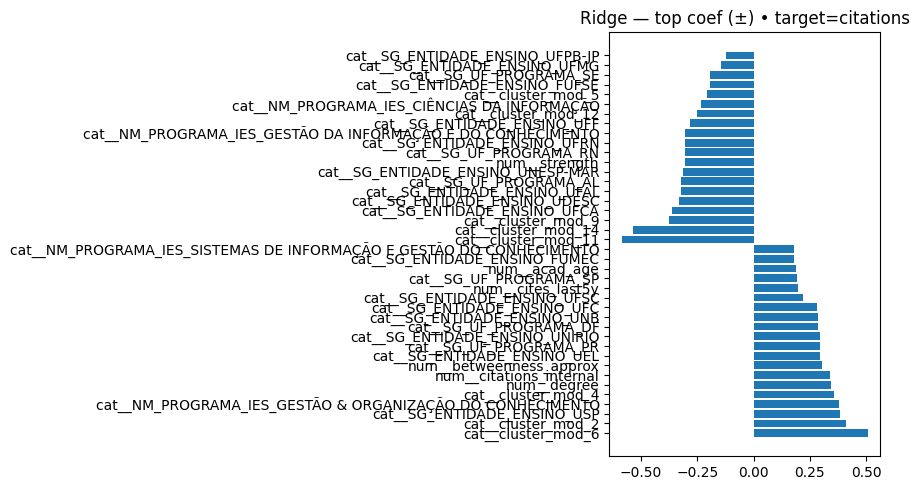

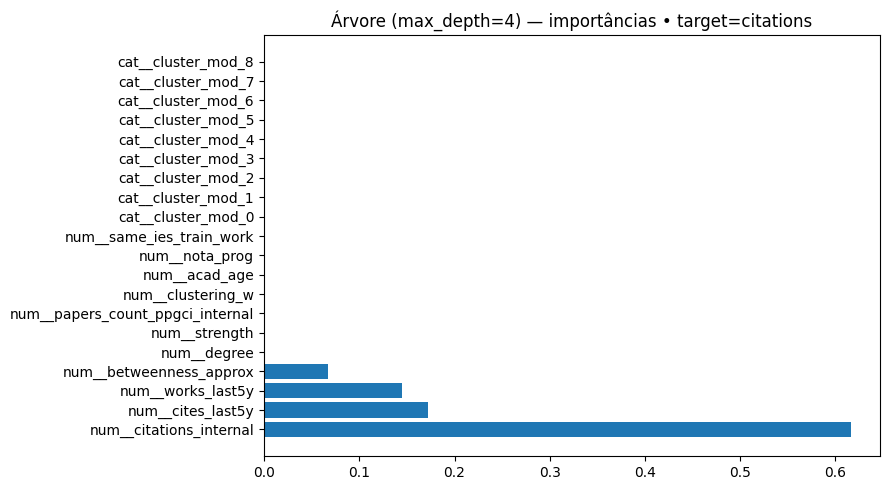

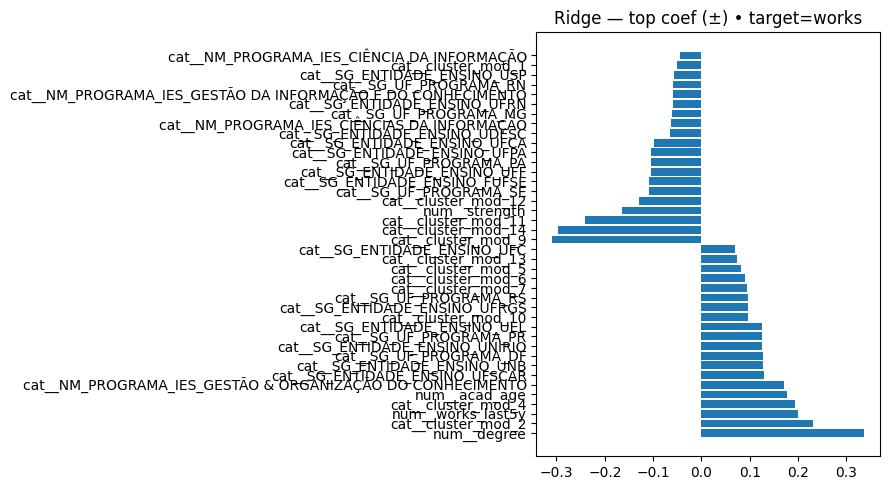

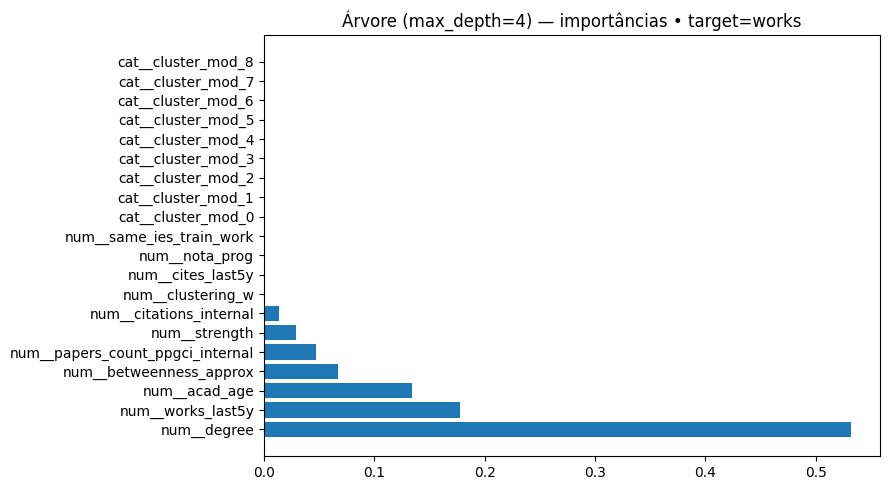


=== RESUMO PARTE 4 ===
β* (Parte 2) = 0.50

Ridge (citations): {'rmse_train': 1.572760309347539, 'rmse_test': 2.1019709148179446, 'mae_test': 1.5302109839090554, 'r2_test': 0.06012670050513769}
Tree  (citations): {'rmse_test': 2.193623131026032, 'mae_test': 1.6098227843188362, 'r2_test': -0.023622777727333677}

Ridge (works): {'rmse_train': 0.7834670950650553, 'rmse_test': 0.9138554024365521, 'mae_test': 0.6100664664114099, 'r2_test': 0.21086715520036126}
Tree  (works): {'rmse_test': 0.9112696173504533, 'mae_test': 0.6760777219869367, 'r2_test': 0.21532659389019237}

✔️ PARTE 4 concluída.
Arquivos salvos em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part4
 - model_metrics.json
 - coef_ridge_citations.csv | coef_ridge_works.csv
 - featimp_tree_citations.csv | featimp_tree_works.csv
 - tree_text_citations.txt | tree_text_works.txt
 - pred_samples.csv
 - figs/*.png


In [ ]:
# =========================================================
# PARTE 4 — Modelos Explicáveis (leve) p/ Citações & Produção
# Revisada: corrige cálculo de works_total/citations_total (sem np.where)
# Base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
# =========================================================

# !pip -q install pandas numpy scikit-learn networkx matplotlib

import os, json, math, random, warnings
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
RSEED = 42
np.random.seed(RSEED); random.seed(RSEED)

# ---------- Drive + paths ----------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P0, P1, P2, P3, P4 = [os.path.join(BASE, f"part{i}") for i in [0,1,2,3,4]]
FIG = os.path.join(P4, "figs")
os.makedirs(P4, exist_ok=True)
os.makedirs(FIG, exist_ok=True)

# ---------- helpers ----------
def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

def cap_outliers(s: pd.Series, q=0.99):
    if s.isna().all(): return s
    return s.clip(upper=s.quantile(q))

def col_or_nan_series(df, col):
    """Retorna uma Series numérica (ou NaNs) do tamanho de df.index."""
    if col in df.columns:
        return pd.to_numeric(df[col], errors="coerce")
    return pd.Series(np.nan, index=df.index, dtype="float64")

# ---------- carregar entradas ----------
nodes_path   = os.path.join(P2, "nodes_plus_clusters.csv")
edgesB_path  = os.path.join(P2, "edges_beta.csv")
moo_path     = os.path.join(P2, "moo_beta_metrics.json")
intern_path  = os.path.join(P1, "node_internal_activity.csv")
feat0_path   = os.path.join(P0, "prod_features_min_ppgci.csv")
autor_path   = os.path.join(P0, "autores_final_std.csv")

for pth in [nodes_path, edgesB_path, intern_path, feat0_path]:
    assert os.path.exists(pth), f"Arquivo necessário ausente: {pth}"

nodes = pd.read_csv(nodes_path)           # degree, strength, cluster_mod, meta
edgesB = pd.read_csv(edgesB_path)         # u,v,weight_beta
intern = pd.read_csv(intern_path)         # papers_count_ppgci_internal, citations_internal
feat0  = pd.read_csv(feat0_path)          # works_count, total_citations etc.
autor  = pd.read_csv(autor_path) if os.path.exists(autor_path) else pd.DataFrame(columns=["nome_tokensort_norm","aut_total_citations","aut_total_works"])
moo    = json.load(open(moo_path)) if os.path.exists(moo_path) else {"chosen_beta": 0.50}
BSTAR  = float(moo.get("chosen_beta", 0.50))

# ---------- montar grafo (para métricas adicionais leves) ----------
G = nx.Graph()
for _, r in edgesB.iterrows():
    G.add_edge(r["u"], r["v"], weight=float(r["weight_beta"]))

# ---------- integrar dataset principal ----------
df = nodes.merge(intern, on="nome_tokensort_norm", how="left")\
          .merge(feat0, on="nome_tokensort_norm", how="left")\
          .merge(autor, on="nome_tokensort_norm", how="left")

# preencher numéricos básicos
for c in ["papers_count_ppgci_internal","citations_internal","works_count","total_citations",
          "works_last5y","cites_last5y","aut_total_citations","aut_total_works",
          "acad_age","nota_prog"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ---------- (CORREÇÃO) alvos totais sem usar np.where ----------
aut_works = col_or_nan_series(df, "aut_total_works")
wrk_count = col_or_nan_series(df, "works_count")
df["works_total"] = aut_works.combine_first(wrk_count).fillna(0)

aut_cits = col_or_nan_series(df, "aut_total_citations")
tot_cits = col_or_nan_series(df, "total_citations")
df["citations_total"] = aut_cits.combine_first(tot_cits).fillna(0)

# completar vazios restantes
for c in ["papers_count_ppgci_internal","citations_internal","works_last5y","cites_last5y","acad_age","nota_prog"]:
    if c in df.columns:
        df[c] = df[c].fillna(0)

# ---------- features de mobilidade / flags ----------
if {"NM_IES_TITULACAO","SG_ENTIDADE_ENSINO"}.issubset(df.columns):
    df["same_ies_train_work"] = np.where(
        df["NM_IES_TITULACAO"].astype(str).str.strip().str.lower() ==
        df["SG_ENTIDADE_ENSINO"].astype(str).str.strip().str.lower(), 1, 0
    )
else:
    df["same_ies_train_work"] = 0

df["has_orientador"]   = (df.get("NM_ORIENTADOR").notna()).astype(int) if "NM_ORIENTADOR" in df.columns else 0
df["has_coorientador"] = (df.get("NM_COORIENTADOR").notna()).astype(int) if "NM_COORIENTADOR" in df.columns else 0

# ---------- métricas de rede adicionais (leves) ----------
nG = G.number_of_nodes()
bet = {}
clu = {}
if nG>0 and nG<=5000:
    try:
        k = min(200, max(50, int(nG*0.1)))
        bet = nx.betweenness_centrality(G, k=k, seed=RSEED, weight="weight")
    except Exception:
        bet = {}
    try:
        clu = nx.clustering(G, weight="weight")
    except Exception:
        clu = {}
else:
    print(f"ℹ️ Rede com {nG} nós — pulando betweenness/clustering para ser leve.")

df["betweenness_approx"] = df["nome_tokensort_norm"].map(bet).fillna(0.0)
df["clustering_w"]       = df["nome_tokensort_norm"].map(clu).fillna(0.0)

# ---------- selecionar colunas para modelagem ----------
num_cols = [c for c in [
    "degree","strength","betweenness_approx","clustering_w",
    "papers_count_ppgci_internal","citations_internal",
    "works_last5y","cites_last5y",
    "acad_age","nota_prog",
    "same_ies_train_work"
] if c in df.columns]

cat_cols = [c for c in [
    "cluster_mod",
    "SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO","NM_PROGRAMA_IES",
] if c in df.columns]

# remover linhas sem alvos
df["y_cit"] = np.log1p(df["citations_total"])
df["y_wrk"] = np.log1p(df["works_total"])
df = df[df["y_cit"].notna() & df["y_wrk"].notna()].reset_index(drop=True)

# ---------- função de treino/avaliação ----------
from sklearn.utils.validation import check_is_fitted

def train_and_eval(target_col, model_name_prefix):
    y = df[target_col].values
    X = df[num_cols + cat_cols].copy()

    numeric_tf = Pipeline(steps=[
        ("scaler", StandardScaler(with_mean=True, with_std=True))
    ])
    categorical_tf = Pipeline(steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])
    ct = ColumnTransformer([
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols)
    ])

    ridge = Ridge(random_state=RSEED)
    pipe_ridge = Pipeline(steps=[("prep", ct), ("mdl", ridge)])

    grid = GridSearchCV(
        estimator=pipe_ridge,
        param_grid={"mdl__alpha":[0.1, 0.3, 1.0, 3.0, 10.0]},
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=1,
        refit=True
    )

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=RSEED)
    grid.fit(Xtr, ytr)

    best_ridge = grid.best_estimator_
    pred_tr = best_ridge.predict(Xtr); pred_te = best_ridge.predict(Xte)

    metr = {
        "target": target_col,
        "best_alpha": float(grid.best_params_["mdl__alpha"]),
        "n_train": int(len(ytr)), "n_test": int(len(yte)),
        "ridge": {
            "rmse_train": float(math.sqrt(mean_squared_error(ytr, pred_tr))),
            "rmse_test":  float(math.sqrt(mean_squared_error(yte, pred_te))),
            "mae_test":   float(mean_absolute_error(yte, pred_te)),
            "r2_test":    float(r2_score(yte, pred_te))
        }
    }

    # Coeficientes padronizados do Ridge
    prep = best_ridge.named_steps["prep"]
    mdl  = best_ridge.named_steps["mdl"]
    try:
        feat_names = prep.get_feature_names_out()
    except Exception:
        # fallback para nomes
        feat_names = list(num_cols)
        if len(cat_cols) > 0:
            oh = prep.transformers_[1][1].named_steps["onehot"]
            feat_names += list(oh.get_feature_names_out(cat_cols))

    coef = pd.DataFrame({"feature": feat_names, "coef": mdl.coef_.ravel()})
    coef = coef.sort_values("coef", ascending=False)

    # Árvore rasa
    tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=25, random_state=RSEED)
    pipe_tree = Pipeline(steps=[("prep", ct), ("mdl", tree)])
    pipe_tree.fit(Xtr, ytr)
    pred_te_tree = pipe_tree.predict(Xte)
    metr["tree"] = {
        "rmse_test": float(math.sqrt(mean_squared_error(yte, pred_te_tree))),
        "mae_test":  float(mean_absolute_error(yte, pred_te_tree)),
        "r2_test":   float(r2_score(yte, pred_te_tree))
    }

    # Importâncias
    tmdl = pipe_tree.named_steps["mdl"]
    try:
        feat_names_tree = prep.get_feature_names_out()
    except Exception:
        feat_names_tree = feat_names

    imp = pd.DataFrame({"feature": feat_names_tree, "importance": tmdl.feature_importances_})
    imp = imp.sort_values("importance", ascending=False)

    # Texto da árvore
    tree_text = export_text(tmdl, feature_names=list(feat_names_tree))

    # Salvar
    safe_save_csv(coef, os.path.join(P4, f"coef_ridge_{model_name_prefix}.csv"))
    safe_save_csv(imp,  os.path.join(P4, f"featimp_tree_{model_name_prefix}.csv"))
    with open(os.path.join(P4, f"tree_text_{model_name_prefix}.txt"), "w", encoding="utf-8") as f:
        f.write(tree_text)

    # Plots
    topK = 20
    plt.figure(figsize=(9,5))
    ctop = pd.concat([coef.head(topK), coef.tail(topK).sort_values("coef", ascending=True)])
    pos = np.arange(len(ctop))
    plt.barh(pos, ctop["coef"].values)
    plt.yticks(pos, ctop["feature"].values)
    plt.title(f"Ridge — top coef (±) • target={model_name_prefix}")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG, f"ridge_topcoef_{model_name_prefix}.png"), dpi=160); plt.close()

    plt.figure(figsize=(9,5))
    itop = imp.head(topK)
    plt.barh(range(len(itop)), itop["importance"].values)
    plt.yticks(range(len(itop)), itop["feature"].values)
    plt.title(f"Árvore (max_depth=4) — importâncias • target={model_name_prefix}")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG, f"tree_featimp_{model_name_prefix}.png"), dpi=160); plt.close()

    # Amostra de predições
    preds_sample = pd.DataFrame({
        "nome_tokensort_norm": df.loc[Xte.index, "nome_tokensort_norm"].values if "nome_tokensort_norm" in df.columns else np.arange(len(Xte)),
        "y_true": yte,
        "ridge_pred": pred_te,
        "tree_pred": pred_te_tree
    })
    return metr, preds_sample

# ---------- Rodar modelos ----------
metrics_all = {}
m1, sample1 = train_and_eval("y_cit", "citations")
m2, sample2 = train_and_eval("y_wrk", "works")
metrics_all["citations"] = m1
metrics_all["works"]     = m2

# ---------- Salvar amostras e métricas ----------
pred_samples = pd.concat([sample1.assign(target="citations"), sample2.assign(target="works")], ignore_index=True)
safe_save_csv(pred_samples, os.path.join(P4, "pred_samples.csv"))
safe_save_json(metrics_all, os.path.join(P4, "model_metrics.json"))

print("\n=== RESUMO PARTE 4 ===")
print(f"β* (Parte 2) = {BSTAR:.2f}")
print("\nRidge (citations):", metrics_all["citations"]["ridge"])
print("Tree  (citations):", metrics_all["citations"]["tree"])
print("\nRidge (works):", metrics_all["works"]["ridge"])
print("Tree  (works):", metrics_all["works"]["tree"])

print("\n✔️ PARTE 4 concluída.")
print("Arquivos salvos em:", P4)
print(" - model_metrics.json")
print(" - coef_ridge_citations.csv | coef_ridge_works.csv")
print(" - featimp_tree_citations.csv | featimp_tree_works.csv")
print(" - tree_text_citations.txt | tree_text_works.txt")
print(" - pred_samples.csv")
print(" - figs/*.png")


🔗 Drive já montado em /content/drive


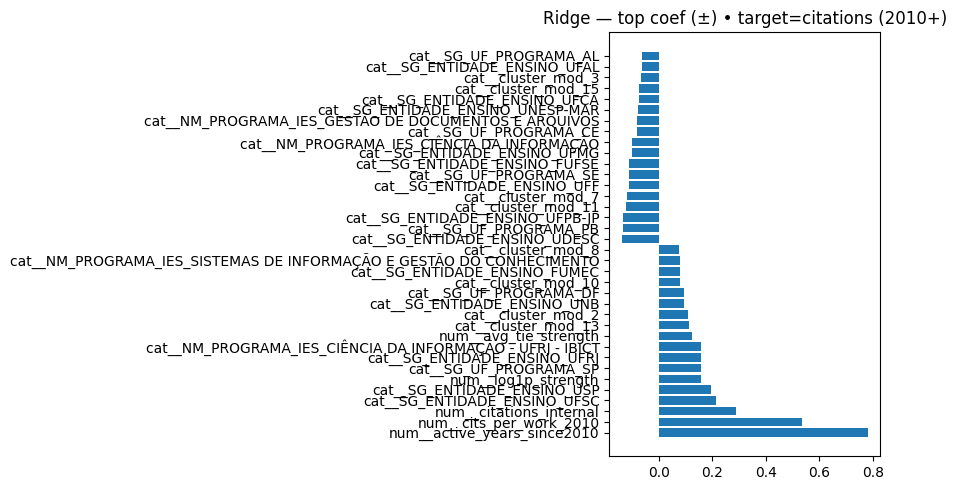

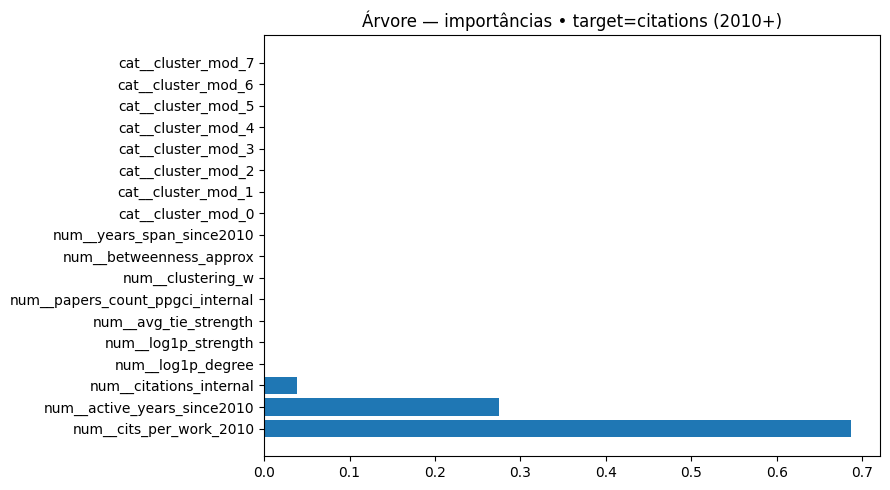

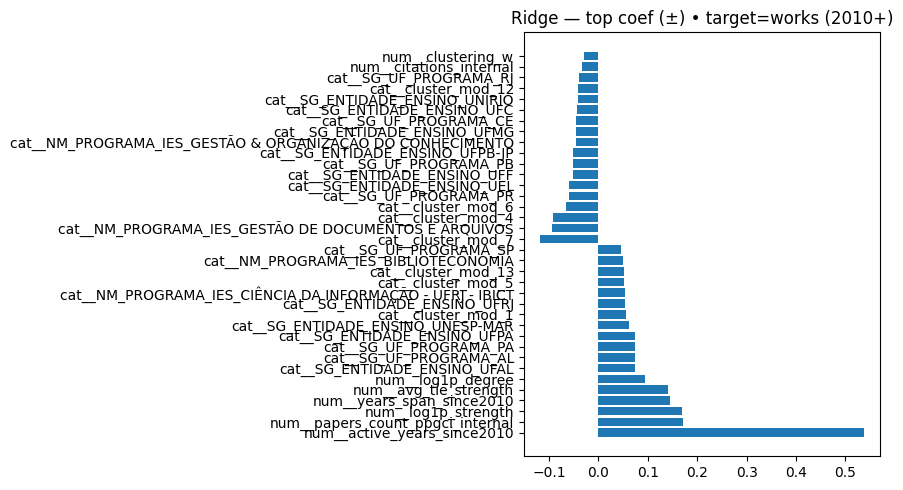

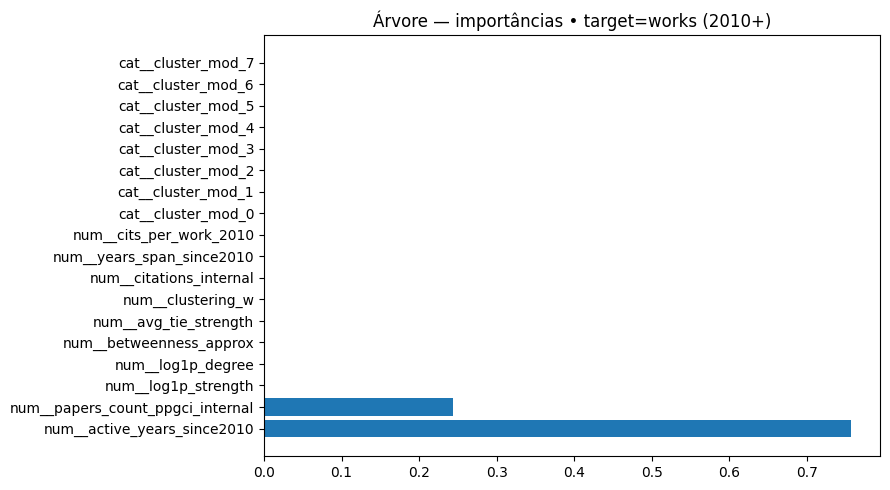


=== RESUMO PARTE 4 — (2010+) ===
β* (Parte 2) = 0.50

Ridge (citations_2010): {'rmse_train': 0.632405256544911, 'rmse_test': 0.6952853462710418, 'mae_test': 0.5680132467930674, 'r2_test': 0.8403707371375418}
Tree  (citations_2010): {'rmse_test': 0.8669958561596911, 'mae_test': 0.6580918113902008, 'r2_test': 0.7517893573884038}

Ridge (works_2010): {'rmse_train': 0.3117243090387478, 'rmse_test': 0.38210500053253155, 'mae_test': 0.28636196513915885, 'r2_test': 0.8966558356899546}
Tree  (works_2010): {'rmse_test': 0.5006372247004764, 'mae_test': 0.3918905738783191, 'r2_test': 0.8225946176965628}


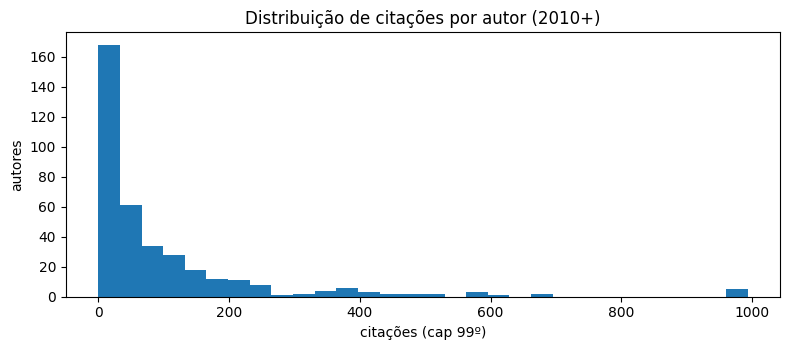

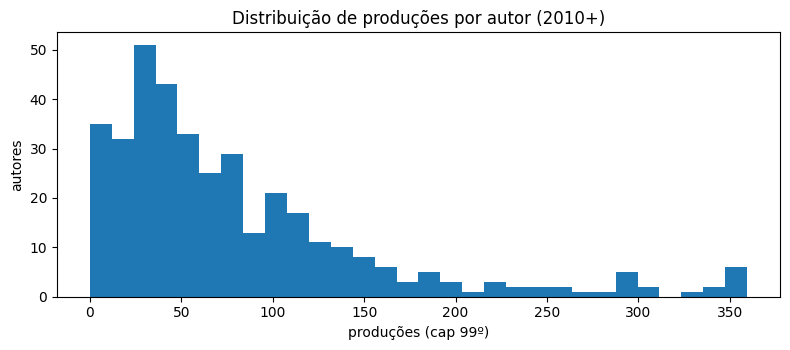


✔️ PARTE 4 (2010+) concluída.
Arquivos salvos em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part4
 - model_metrics_2010.json
 - coef_ridge_citations_2010.csv | coef_ridge_works_2010.csv
 - featimp_tree_citations_2010.csv | featimp_tree_works_2010.csv
 - tree_text_citations_2010.txt | tree_text_works_2010.txt
 - pred_samples_2010.csv
 - author_aggregates_2010.csv
 - figs/*.png


In [ ]:
# =========================================================
# PARTE 4 — Modelos Explicáveis (2010+)
# Base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
#
# O que muda nesta versão:
#   - Alvos e agregações de produção/citações calculados APENAS para ano >= 2010.
#   - Pequenas melhorias de features (log1p de grau/força, média de força, anos ativos).
#
# Entradas:
#   part2/nodes_plus_clusters.csv
#   part2/edges_beta.csv
#   part2/moo_beta_metrics.json
#   part1/node_internal_activity.csv
#   part0/producoes_parsed.csv        (precisa ter 'ano','citations','autores_norm')
#   part0/docentes_df.csv             (PPGCI-only; para conjunto de docentes)
#
# Saídas:
#   part4/model_metrics_2010.json
#   part4/coef_ridge_citations_2010.csv
#   part4/coef_ridge_works_2010.csv
#   part4/featimp_tree_citations_2010.csv
#   part4/featimp_tree_works_2010.csv
#   part4/tree_text_citations_2010.txt
#   part4/tree_text_works_2010.txt
#   part4/pred_samples_2010.csv
#   part4/author_aggregates_2010.csv  (tabelão com works/citações desde 2010)
#   part4/figs/*.png
# =========================================================

# !pip -q install pandas numpy scikit-learn networkx matplotlib

import os, json, math, random, warnings, ast
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
RSEED = 42
np.random.seed(RSEED); random.seed(RSEED)

# ---------- Drive + paths ----------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P0, P1, P2, P3, P4 = [os.path.join(BASE, f"part{i}") for i in [0,1,2,3,4]]
FIG = os.path.join(P4, "figs")
os.makedirs(P4, exist_ok=True)
os.makedirs(FIG, exist_ok=True)

# ---------- helpers ----------
def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

def cap_outliers(s: pd.Series, q=0.99):
    if s.isna().all(): return s
    return s.clip(upper=s.quantile(q))

def parse_autores_norm(x):
    if isinstance(x, list): return x
    s = str(x)
    if s.strip().startswith("["):
        try: return [str(t).strip() for t in ast.literal_eval(s)]
        except Exception: pass
    return [p.strip() for p in s.split(",") if p.strip()]

# ---------- carregar entradas ----------
nodes_path   = os.path.join(P2, "nodes_plus_clusters.csv")
edgesB_path  = os.path.join(P2, "edges_beta.csv")
moo_path     = os.path.join(P2, "moo_beta_metrics.json")
intern_path  = os.path.join(P1, "node_internal_activity.csv")
prods_path   = os.path.join(P0, "producoes_parsed.csv")
doc_path     = os.path.join(P0, "docentes_df.csv")

for pth in [nodes_path, edgesB_path, intern_path, prods_path, doc_path]:
    assert os.path.exists(pth), f"Arquivo necessário ausente: {pth}"

nodes = pd.read_csv(nodes_path)           # degree, strength, cluster_mod, meta
edgesB = pd.read_csv(edgesB_path)         # u,v,weight_beta
intern = pd.read_csv(intern_path)         # papers_count_ppgci_internal, citations_internal
prods  = pd.read_csv(prods_path)          # ano, citations, autores_norm (lista textual)
docs   = pd.read_csv(doc_path)            # PPGCI-only
moo    = json.load(open(moo_path)) if os.path.exists(moo_path) else {"chosen_beta": 0.50}
BSTAR  = float(moo.get("chosen_beta", 0.50))

# ---------- montar grafo (para métricas adicionais leves) ----------
G = nx.Graph()
for _, r in edgesB.iterrows():
    G.add_edge(r["u"], r["v"], weight=float(r["weight_beta"]))

# ---------- AGREGAR AUTOR-ANO (>=2010) ----------
# conjunto de docentes PPGCI (chave normalizada)
ppgci_keys = set(docs["nome_tokensort_norm"].astype(str))

prods["ano"] = pd.to_numeric(prods["ano"], errors="coerce")
prods["citations"] = pd.to_numeric(prods["citations"], errors="coerce").fillna(0).astype(int)
prods["autores_norm"] = prods["autores_norm"].apply(parse_autores_norm)

prods2010 = prods[prods["ano"].fillna(0).astype(int) >= 2010].copy()

rows = []
for _, r in prods2010.iterrows():
    ano, cits = int(r["ano"]), int(r["citations"])
    for a in r["autores_norm"]:
        if a in ppgci_keys:
            rows.append((a, ano, cits))
agg2010 = pd.DataFrame(rows, columns=["nome_tokensort_norm","ano","citations"])

if agg2010.empty:
    raise RuntimeError("Nenhuma produção >=2010 encontrada para docentes PPGCI. Verifique 'producoes_parsed.csv'.")

# works/citations 2010+
g = agg2010.groupby("nome_tokensort_norm", as_index=False)
works2010 = g.size().rename(columns={"size":"works_2010"})
cits2010  = agg2010.groupby("nome_tokensort_norm", as_index=False)["citations"].sum().rename(columns={"citations":"citations_2010"})
years2010 = agg2010.groupby("nome_tokensort_norm", as_index=False)["ano"].nunique().rename(columns={"ano":"active_years_since2010"})
firstyr   = agg2010.groupby("nome_tokensort_norm", as_index=False)["ano"].min().rename(columns={"ano":"first_year_since2010"})
lastyr    = agg2010.groupby("nome_tokensort_norm", as_index=False)["ano"].max().rename(columns={"ano":"last_year_since2010"})

author_agg2010 = works2010.merge(cits2010, on="nome_tokensort_norm", how="outer")\
                          .merge(years2010, on="nome_tokensort_norm", how="outer")\
                          .merge(firstyr, on="nome_tokensort_norm", how="outer")\
                          .merge(lastyr,  on="nome_tokensort_norm", how="outer")\
                          .fillna(0)

# taxa simples (evita divisão por zero)
author_agg2010["cits_per_work_2010"] = np.where(author_agg2010["works_2010"]>0,
                                                author_agg2010["citations_2010"]/author_agg2010["works_2010"], 0.0)
author_agg2010["years_span_since2010"] = (author_agg2010["last_year_since2010"] - author_agg2010["first_year_since2010"]).clip(lower=0)

safe_save_csv(author_agg2010, os.path.join(P4, "author_aggregates_2010.csv"))

# ---------- integrar dataset principal ----------
df = nodes.merge(intern, on="nome_tokensort_norm", how="left")\
          .merge(author_agg2010, on="nome_tokensort_norm", how="left")

# completar NaNs
for c in ["papers_count_ppgci_internal","citations_internal",
          "works_2010","citations_2010","active_years_since2010","years_span_since2010","cits_per_work_2010"]:
    if c in df.columns: df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# features de rede adicionais (leves)
nG = G.number_of_nodes()
bet = {}
clu = {}
if nG>0 and nG<=5000:
    try:
        k = min(200, max(50, int(nG*0.1)))  # 10% até 200
        bet = nx.betweenness_centrality(G, k=k, seed=RSEED, weight="weight")
    except Exception:
        bet = {}
    try:
        clu = nx.clustering(G, weight="weight")
    except Exception:
        clu = {}
else:
    print(f"ℹ️ Rede com {nG} nós — pulando betweenness/clustering para ser leve.")

df["betweenness_approx"] = df["nome_tokensort_norm"].map(bet).fillna(0.0)
df["clustering_w"]       = df["nome_tokensort_norm"].map(clu).fillna(0.0)

# enrich com log-features e razões simples
df["log1p_degree"]   = np.log1p(df["degree"])
df["log1p_strength"] = np.log1p(df["strength"])
df["avg_tie_strength"] = np.where(df["degree"]>0, df["strength"]/df["degree"], 0.0)

# targets em log1p para estabilizar cauda
df["y_cit2010"] = np.log1p(df["citations_2010"])
df["y_wrk2010"] = np.log1p(df["works_2010"])

# ---------- colunas para modelagem ----------
num_cols = [c for c in [
    "log1p_degree","log1p_strength","avg_tie_strength",
    "betweenness_approx","clustering_w",
    "papers_count_ppgci_internal","citations_internal",
    "active_years_since2010","years_span_since2010","cits_per_work_2010"
] if c in df.columns]

cat_cols = [c for c in [
    "cluster_mod",
    "SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO","NM_PROGRAMA_IES",
] if c in nodes.columns]  # pegue do nodes (origem da meta)

# remover linhas sem alvos (2010+)
df = df[df["y_cit2010"].notna() & df["y_wrk2010"].notna()].reset_index(drop=True)

# ---------- função de treino/avaliação ----------
def train_and_eval(df, target_col, model_name_suffix):
    y = df[target_col].values
    X = df[num_cols + cat_cols].copy()

    numeric_tf = Pipeline(steps=[
        ("scaler", StandardScaler(with_mean=True, with_std=True))
    ])
    categorical_tf = Pipeline(steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])
    ct = ColumnTransformer([
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols)
    ])

    # Modelo linear (Ridge)
    ridge = Ridge(random_state=RSEED)
    pipe_ridge = Pipeline(steps=[("prep", ct), ("mdl", ridge)])

    grid = GridSearchCV(
        estimator=pipe_ridge,
        param_grid={"mdl__alpha":[0.1, 0.3, 1.0, 3.0, 10.0]},
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=1,
        refit=True
    )

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=RSEED)
    grid.fit(Xtr, ytr)

    best_ridge = grid.best_estimator_
    pred_tr = best_ridge.predict(Xtr); pred_te = best_ridge.predict(Xte)

    metr = {
        "target": target_col,
        "best_alpha": float(grid.best_params_["mdl__alpha"]),
        "n_train": int(len(ytr)), "n_test": int(len(yte)),
        "ridge": {
            "rmse_train": float(math.sqrt(mean_squared_error(ytr, pred_tr))),
            "rmse_test":  float(math.sqrt(mean_squared_error(yte, pred_te))),
            "mae_test":   float(mean_absolute_error(yte, pred_te)),
            "r2_test":    float(r2_score(yte, pred_te))
        }
    }

    # Coeficientes
    prep = best_ridge.named_steps["prep"]
    mdl  = best_ridge.named_steps["mdl"]
    try:
        feat_names = prep.get_feature_names_out()
    except Exception:
        feat_names = list(num_cols)
        if len(cat_cols)>0:
            oh = prep.transformers_[1][1].named_steps["onehot"]
            feat_names += list(oh.get_feature_names_out(cat_cols))
    coef = pd.DataFrame({"feature": feat_names, "coef": mdl.coef_.ravel()}).sort_values("coef", ascending=False)

    # Árvore rasa para interpretação
    tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=25, random_state=RSEED)
    pipe_tree = Pipeline(steps=[("prep", ct), ("mdl", tree)])
    pipe_tree.fit(Xtr, ytr)
    pred_te_tree = pipe_tree.predict(Xte)
    metr["tree"] = {
        "rmse_test": float(math.sqrt(mean_squared_error(yte, pred_te_tree))),
        "mae_test":  float(mean_absolute_error(yte, pred_te_tree)),
        "r2_test":   float(r2_score(yte, pred_te_tree))
    }

    # Importâncias
    try:
        feat_names_tree = prep.get_feature_names_out()
    except Exception:
        feat_names_tree = feat_names
    imp = pd.DataFrame({"feature": feat_names_tree, "importance": pipe_tree.named_steps["mdl"].feature_importances_})\
            .sort_values("importance", ascending=False)

    # Texto da árvore
    tree_text = export_text(pipe_tree.named_steps["mdl"], feature_names=list(feat_names_tree))

    # Salvar artefatos (sufixo _2010)
    safe_save_csv(coef, os.path.join(P4, f"coef_ridge_{model_name_suffix}_2010.csv"))
    safe_save_csv(imp,  os.path.join(P4, f"featimp_tree_{model_name_suffix}_2010.csv"))
    with open(os.path.join(P4, f"tree_text_{model_name_suffix}_2010.txt"), "w", encoding="utf-8") as f:
        f.write(tree_text)

    # Plots
    topK = 18
    plt.figure(figsize=(9,5))
    ctop = pd.concat([coef.head(topK), coef.tail(topK).sort_values("coef", ascending=True)])
    pos = np.arange(len(ctop))
    plt.barh(pos, ctop["coef"].values)
    plt.yticks(pos, ctop["feature"].values)
    plt.title(f"Ridge — top coef (±) • target={model_name_suffix} (2010+)")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG, f"ridge_topcoef_{model_name_suffix}_2010.png"), dpi=160); plt.close()

    plt.figure(figsize=(9,5))
    itop = imp.head(topK)
    plt.barh(range(len(itop)), itop["importance"].values)
    plt.yticks(range(len(itop)), itop["feature"].values)
    plt.title(f"Árvore — importâncias • target={model_name_suffix} (2010+)")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(FIG, f"tree_featimp_{model_name_suffix}_2010.png"), dpi=160); plt.close()

    # Amostra de predições
    preds_sample = pd.DataFrame({
        "nome_tokensort_norm": df.loc[Xte.index, "nome_tokensort_norm"].values if "nome_tokensort_norm" in df.columns else np.arange(len(Xte)),
        "y_true": yte,
        "ridge_pred": pred_te,
        "tree_pred": pred_te_tree
    })
    return metr, preds_sample

# ---------- Rodar modelos (2010+) ----------
metrics_all = {}
m1, sample1 = train_and_eval(df, "y_cit2010", "citations")
m2, sample2 = train_and_eval(df, "y_wrk2010", "works")
metrics_all["citations_2010"] = m1
metrics_all["works_2010"]     = m2

# ---------- Salvar amostras e métricas ----------
pred_samples = pd.concat([sample1.assign(target="citations_2010"), sample2.assign(target="works_2010")], ignore_index=True)
safe_save_csv(pred_samples, os.path.join(P4, "pred_samples_2010.csv"))
safe_save_json(metrics_all, os.path.join(P4, "model_metrics_2010.json"))

# ---------- Prints e visualizações leves ----------
print("\n=== RESUMO PARTE 4 — (2010+) ===")
print(f"β* (Parte 2) = {BSTAR:.2f}")
print("\nRidge (citations_2010):", metrics_all["citations_2010"]["ridge"])
print("Tree  (citations_2010):", metrics_all["citations_2010"]["tree"])
print("\nRidge (works_2010):", metrics_all["works_2010"]["ridge"])
print("Tree  (works_2010):", metrics_all["works_2010"]["tree"])

# Distribuição dos alvos (cap p/ leitura)
plt.figure(figsize=(8,3.6))
plt.hist(cap_outliers(df["citations_2010"], 0.99), bins=30)
plt.title("Distribuição de citações por autor (2010+)")
plt.xlabel("citações (cap 99º)"); plt.ylabel("autores")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG, "hist_citations_2010.png"), dpi=160); plt.close()

plt.figure(figsize=(8,3.6))
plt.hist(cap_outliers(df["works_2010"], 0.99), bins=30)
plt.title("Distribuição de produções por autor (2010+)")
plt.xlabel("produções (cap 99º)"); plt.ylabel("autores")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG, "hist_works_2010.png"), dpi=160); plt.close()

print("\n✔️ PARTE 4 (2010+) concluída.")
print("Arquivos salvos em:", P4)
print(" - model_metrics_2010.json")
print(" - coef_ridge_citations_2010.csv | coef_ridge_works_2010.csv")
print(" - featimp_tree_citations_2010.csv | featimp_tree_works_2010.csv")
print(" - tree_text_citations_2010.txt | tree_text_works_2010.txt")
print(" - pred_samples_2010.csv")
print(" - author_aggregates_2010.csv")
print(" - figs/*.png")

In [ ]:
import os, pandas as pd, numpy as np
BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P2, P4 = os.path.join(BASE,"part2"), os.path.join(BASE,"part4")

coef_cit = pd.read_csv(os.path.join(P4,"coef_ridge_citations_2010.csv"))
coef_wrk = pd.read_csv(os.path.join(P4,"coef_ridge_works_2010.csv"))

print("Top coef (citations_2010):")
display(coef_cit.head(15)[["feature","coef"]])

print("Top coef (works_2010):")
display(coef_wrk.head(15)[["feature","coef"]])

# correlação rápida entre produção-alvo e produção interna (sanidade)
nodes = pd.read_csv(os.path.join(P2,"nodes_plus_clusters.csv"))
intern = pd.read_csv(os.path.join(BASE,"part1","node_internal_activity.csv"))
agg2010 = pd.read_csv(os.path.join(P4,"author_aggregates_2010.csv"))

df = nodes.merge(intern, on="nome_tokensort_norm", how="left")\
          .merge(agg2010, on="nome_tokensort_norm", how="left")

for c in ["papers_count_ppgci_internal","works_2010","citations_2010"]:
    if c in df: df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

corr = df[["works_2010","papers_count_ppgci_internal","citations_2010"]].corr()
print("\nCorrelação (works_2010, papers_count_ppgci_internal, citations_2010):")
display(corr.round(3))


Top coef (citations_2010):


,feature,coef
0,num__active_years_since2010,0.781202
1,num__cits_per_work_2010,0.534899
2,num__citations_internal,0.288403
3,cat__SG_ENTIDADE_ENSINO_UFSC,0.214279
4,cat__SG_ENTIDADE_ENSINO_USP,0.192978
5,num__log1p_strength,0.158851
6,cat__SG_UF_PROGRAMA_SP,0.157296
7,cat__SG_ENTIDADE_ENSINO_UFRJ,0.156117
8,cat__NM_PROGRAMA_IES_CIÊNCIA DA INFORMAÇÃO - U...,0.156117
9,num__avg_tie_strength,0.125478


Top coef (works_2010):


,feature,coef
0,num__active_years_since2010,0.537129
1,num__papers_count_ppgci_internal,0.171804
2,num__log1p_strength,0.169080
3,num__years_span_since2010,0.144763
4,num__avg_tie_strength,0.140699
5,num__log1p_degree,0.094598
6,cat__SG_ENTIDADE_ENSINO_UFAL,0.074494
7,cat__SG_UF_PROGRAMA_AL,0.074494
8,cat__SG_UF_PROGRAMA_PA,0.073315
9,cat__SG_ENTIDADE_ENSINO_UFPA,0.073315



Correlação (works_2010, papers_count_ppgci_internal, citations_2010):


,works_2010,papers_count_ppgci_internal,citations_2010
works_2010,1.000,0.879,0.657
papers_count_ppgci_internal,0.879,1.000,0.539
citations_2010,0.657,0.539,1.000


🔗 Drive já montado em /content/drive
Features numéricas (citations, no-leak): ['log1p_degree', 'log1p_strength', 'avg_tie_strength', 'papers_count_ppgci_internal', 'active_years_since2010', 'years_span_since2010']
Features numéricas (works): ['log1p_degree', 'log1p_strength', 'avg_tie_strength', 'papers_count_ppgci_internal', 'active_years_since2010', 'years_span_since2010']
Categóricas: ['cluster_mod', 'SG_UF_PROGRAMA', 'SG_ENTIDADE_ENSINO', 'NM_PROGRAMA_IES']


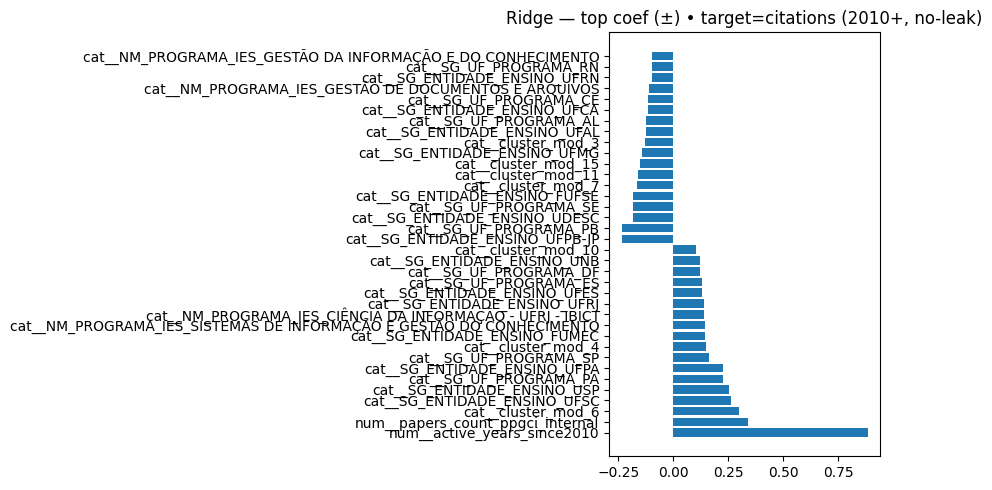

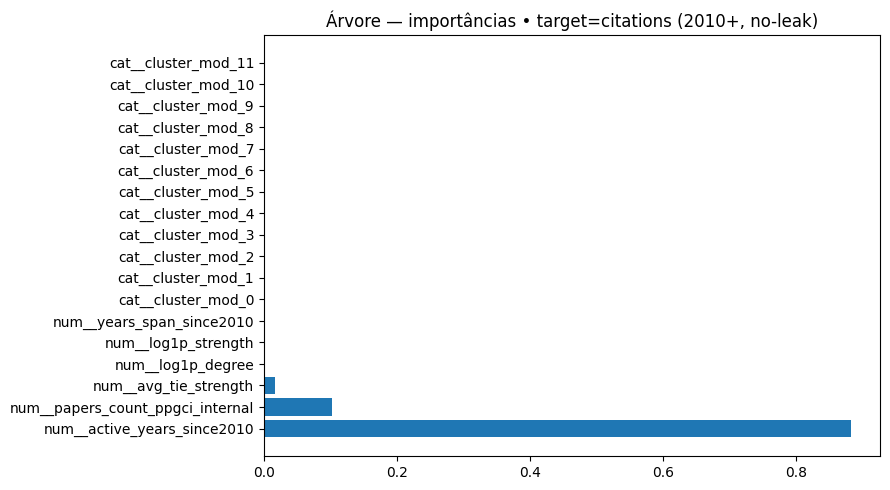

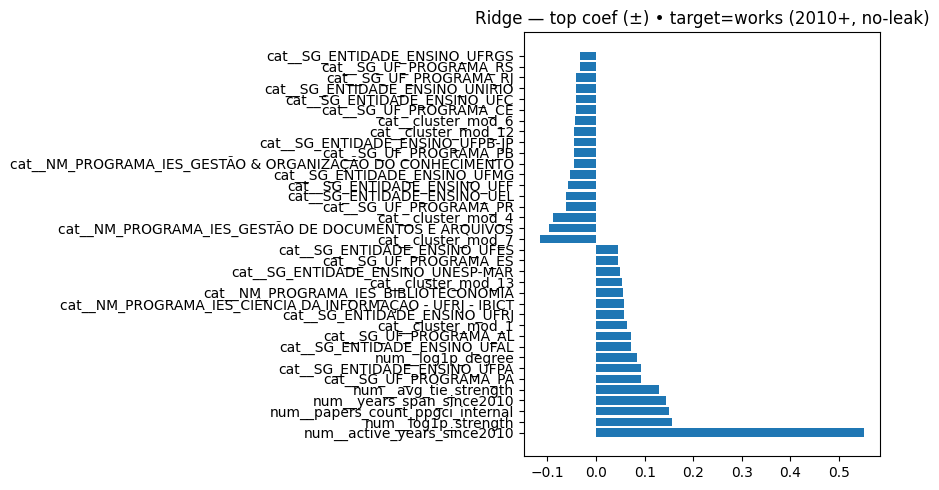

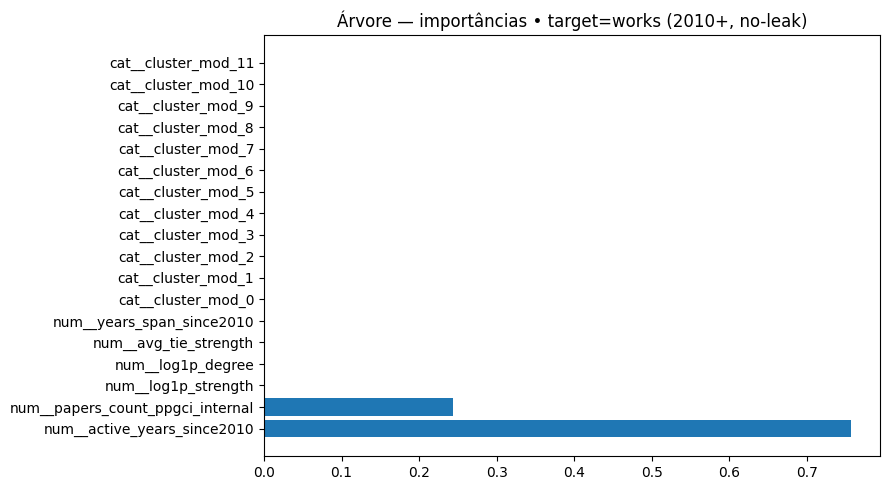


=== RESUMO PARTE 4 — (2010+, no-leak) ===

Ridge (citations_2010, no-leak): {'rmse_train': 0.8313761418102809, 'rmse_test': 0.8809886420622355, 'mae_test': 0.7335099475878424, 'r2_test': 0.7437127658152142}
Tree  (citations_2010, no-leak): {'rmse_test': 1.0287739236798652, 'mae_test': 0.875311279055803, 'r2_test': 0.6505168425300843}

Ridge (works_2010, no-leak): {'rmse_train': 0.31457893923389596, 'rmse_test': 0.3817301402431172, 'mae_test': 0.2895732466919928, 'r2_test': 0.8968585057451935}
Tree  (works_2010, no-leak): {'rmse_test': 0.5006372247004764, 'mae_test': 0.3918905738783191, 'r2_test': 0.8225946176965628}

✔️ Re-treino (no-leak) concluído.
Arquivos salvos em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part4
 - model_metrics_2010_noleak.json
 - coef_ridge_citations_2010_noleak.csv | coef_ridge_works_2010_noleak.csv
 - featimp_tree_citations_2010_noleak.csv | featimp_tree_works_2010_noleak.csv
 - tree_text_citations_2010_noleak.txt | tree_text_works_2010_noleak.txt
 - pre

In [ ]:
# ================================================
# PARTE 4 — Patch "no-leak" (re-treino 2010+)
# Re-treina os modelos excluindo features com citações do próprio período
# Saídas: *_2010_noleak.*
# ================================================

# !pip -q install pandas numpy scikit-learn matplotlib

import os, json, math, random, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
RSEED = 42
np.random.seed(RSEED); random.seed(RSEED)

# ---------- Drive + paths ----------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P0, P1, P2, P3, P4 = [os.path.join(BASE, f"part{i}") for i in [0,1,2,3,4]]
FIG = os.path.join(P4, "figs")
os.makedirs(P4, exist_ok=True)
os.makedirs(FIG, exist_ok=True)

def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

# ---------- Carrega insumos já gerados ----------
nodes = pd.read_csv(os.path.join(P2, "nodes_plus_clusters.csv"))          # degree, strength, cluster_mod, UF/IES/Programa
intern = pd.read_csv(os.path.join(P1, "node_internal_activity.csv"))      # papers_count_ppgci_internal, citations_internal
agg2010= pd.read_csv(os.path.join(P4, "author_aggregates_2010.csv"))      # works_2010, citations_2010, active_years_since2010, years_span..., cits_per_work_2010

# ---------- Monta dataset para modelagem (mesma base da Parte 4 2010+) ----------
df = nodes.merge(intern, on="nome_tokensort_norm", how="left")\
          .merge(agg2010, on="nome_tokensort_norm", how="left")

for c in ["degree","strength","papers_count_ppgci_internal","citations_internal",
          "works_2010","citations_2010","active_years_since2010","years_span_since2010","cits_per_work_2010"]:
    if c in df.columns: df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# Features derivadas leves
df["log1p_degree"]   = np.log1p(df["degree"])
df["log1p_strength"] = np.log1p(df["strength"])
df["avg_tie_strength"] = np.where(df["degree"]>0, df["strength"]/df["degree"], 0.0)

# Targets (log1p)
df["y_cit2010"] = np.log1p(df["citations_2010"])
df["y_wrk2010"] = np.log1p(df["works_2010"])

df = df[df["y_cit2010"].notna() & df["y_wrk2010"].notna()].reset_index(drop=True)

# Colunas categóricas (mesmas do nodes)
cat_cols = [c for c in ["cluster_mod","SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO","NM_PROGRAMA_IES"] if c in nodes.columns]

# Base de numéricas (sem as que causam leakage por padrão)
num_base = [c for c in [
    "log1p_degree","log1p_strength","avg_tie_strength",
    "papers_count_ppgci_internal",     # OK para works; para citations é aceitável remover (ver abaixo)
    "active_years_since2010","years_span_since2010",
    # "citations_internal",            # <- REMOVIDA de citations no no-leak
    # "cits_per_work_2010"             # <- REMOVIDA de citations no no-leak (usa o próprio alvo)
] if c in df.columns]

# Conjuntos finais de features:
# - CITATIONS: remove qualquer coisa baseada no alvo (cits_per_work_2010) e, por conservadorismo, também citations_internal
num_cols_cit = [c for c in num_base if c not in ["citations_internal"]]
# - WORKS: pode incluir cits_per_work_2010? Normalmente dispensável; mantemos só estrutura/tempo para simetria
num_cols_wrk = list(num_base)

print("Features numéricas (citations, no-leak):", num_cols_cit)
print("Features numéricas (works):", num_cols_wrk)
print("Categóricas:", cat_cols)

# ---------- Função de treino/avaliação genérica ----------
def train_and_eval_custom(df, target_col, model_name_suffix, num_cols_custom):
    y = df[target_col].values
    X = df[num_cols_custom + cat_cols].copy()

    numeric_tf = Pipeline(steps=[("scaler", StandardScaler(with_mean=True, with_std=True))])
    categorical_tf = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
    ct = ColumnTransformer([("num", numeric_tf, num_cols_custom),
                            ("cat", categorical_tf, cat_cols)])

    ridge = Ridge(random_state=RSEED)
    pipe_ridge = Pipeline(steps=[("prep", ct), ("mdl", ridge)])

    grid = GridSearchCV(
        estimator=pipe_ridge,
        param_grid={"mdl__alpha":[0.1, 0.3, 1.0, 3.0, 10.0]},
        scoring="neg_mean_squared_error",
        cv=5, n_jobs=1, refit=True
    )

    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=RSEED)
    grid.fit(Xtr, ytr)

    best_ridge = grid.best_estimator_
    pred_tr = best_ridge.predict(Xtr); pred_te = best_ridge.predict(Xte)

    metr = {
        "target": target_col,
        "best_alpha": float(grid.best_params_["mdl__alpha"]),
        "n_train": int(len(ytr)), "n_test": int(len(yte)),
        "ridge": {
            "rmse_train": float(math.sqrt(mean_squared_error(ytr, pred_tr))),
            "rmse_test":  float(math.sqrt(mean_squared_error(yte, pred_te))),
            "mae_test":   float(mean_absolute_error(yte, pred_te)),
            "r2_test":    float(r2_score(yte, pred_te))
        }
    }

    # Coeficientes
    prep = best_ridge.named_steps["prep"]; mdl = best_ridge.named_steps["mdl"]
    try:
        feat_names = prep.get_feature_names_out()
    except Exception:
        feat_names = list(num_cols_custom)
        if len(cat_cols)>0:
            oh = prep.transformers_[1][1].named_steps["onehot"]
            feat_names += list(oh.get_feature_names_out(cat_cols))
    coef = pd.DataFrame({"feature": feat_names, "coef": mdl.coef_.ravel()}).sort_values("coef", ascending=False)

    # Árvore rasa p/ interpretação
    tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=25, random_state=RSEED)
    pipe_tree = Pipeline(steps=[("prep", ct), ("mdl", tree)])
    pipe_tree.fit(Xtr, ytr)
    pred_te_tree = pipe_tree.predict(Xte)
    metr["tree"] = {
        "rmse_test": float(math.sqrt(mean_squared_error(yte, pred_te_tree))),
        "mae_test":  float(mean_absolute_error(yte, pred_te_tree)),
        "r2_test":   float(r2_score(yte, pred_te_tree))
    }

    # Importâncias e árvore em texto
    try:
        feat_names_tree = prep.get_feature_names_out()
    except Exception:
        feat_names_tree = feat_names
    imp = pd.DataFrame({"feature": feat_names_tree, "importance": pipe_tree.named_steps["mdl"].feature_importances_})\
            .sort_values("importance", ascending=False)
    tree_text = export_text(pipe_tree.named_steps["mdl"], feature_names=list(feat_names_tree))

    # Salvar artefatos com sufixo _2010_noleak
    safe_save_csv(coef, os.path.join(P4, f"coef_ridge_{model_name_suffix}_2010_noleak.csv"))
    safe_save_csv(imp,  os.path.join(P4, f"featimp_tree_{model_name_suffix}_2010_noleak.csv"))
    with open(os.path.join(P4, f"tree_text_{model_name_suffix}_2010_noleak.txt"), "w", encoding="utf-8") as f:
        f.write(tree_text)

    # Plots
    topK = 18
    plt.figure(figsize=(9,5))
    ctop = pd.concat([coef.head(topK), coef.tail(topK).sort_values("coef", ascending=True)])
    pos = np.arange(len(ctop))
    plt.barh(pos, ctop["coef"].values)
    plt.yticks(pos, ctop["feature"].values)
    plt.title(f"Ridge — top coef (±) • target={model_name_suffix} (2010+, no-leak)")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(P4, "figs", f"ridge_topcoef_{model_name_suffix}_2010_noleak.png"), dpi=160); plt.close()

    plt.figure(figsize=(9,5))
    itop = imp.head(topK)
    plt.barh(range(len(itop)), itop["importance"].values)
    plt.yticks(range(len(itop)), itop["feature"].values)
    plt.title(f"Árvore — importâncias • target={model_name_suffix} (2010+, no-leak)")
    plt.tight_layout(); plt.show()
    plt.savefig(os.path.join(P4, "figs", f"tree_featimp_{model_name_suffix}_2010_noleak.png"), dpi=160); plt.close()

    # Amostra de predições
    preds_sample = pd.DataFrame({
        "nome_tokensort_norm": df.loc[Xte.index, "nome_tokensort_norm"].values if "nome_tokensort_norm" in df.columns else np.arange(len(Xte)),
        "y_true": yte,
        "ridge_pred": pred_te,
        "tree_pred": pred_te_tree
    })
    return metr, preds_sample

# ---------- Rodar re-treinos ----------
metrics_all = {}
m1, sample1 = train_and_eval_custom(df, "y_cit2010", "citations", num_cols_cit)
m2, sample2 = train_and_eval_custom(df, "y_wrk2010", "works",     num_cols_wrk)
metrics_all["citations_2010_noleak"] = m1
metrics_all["works_2010_noleak"]     = m2

# ---------- Salvar métricas e amostras ----------
pred_samples = pd.concat([sample1.assign(target="citations_2010_noleak"),
                          sample2.assign(target="works_2010_noleak")], ignore_index=True)
safe_save_csv(pred_samples, os.path.join(P4, "pred_samples_2010_noleak.csv"))
safe_save_json(metrics_all, os.path.join(P4, "model_metrics_2010_noleak.json"))

print("\n=== RESUMO PARTE 4 — (2010+, no-leak) ===")
print("\nRidge (citations_2010, no-leak):", metrics_all["citations_2010_noleak"]["ridge"])
print("Tree  (citations_2010, no-leak):", metrics_all["citations_2010_noleak"]["tree"])
print("\nRidge (works_2010, no-leak):", metrics_all["works_2010_noleak"]["ridge"])
print("Tree  (works_2010, no-leak):", metrics_all["works_2010_noleak"]["tree"])

print("\n✔️ Re-treino (no-leak) concluído.")
print("Arquivos salvos em:", P4)
print(" - model_metrics_2010_noleak.json")
print(" - coef_ridge_citations_2010_noleak.csv | coef_ridge_works_2010_noleak.csv")
print(" - featimp_tree_citations_2010_noleak.csv | featimp_tree_works_2010_noleak.csv")
print(" - tree_text_citations_2010_noleak.txt | tree_text_works_2010_noleak.txt")
print(" - pred_samples_2010_noleak.csv")


In [ ]:
import os, pandas as pd
BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part4"

print("Top coef — citations (no-leak):")
display(pd.read_csv(os.path.join(BASE,"coef_ridge_citations_2010_noleak.csv")).head(15))

print("Top coef — works (no-leak):")
display(pd.read_csv(os.path.join(BASE,"coef_ridge_works_2010_noleak.csv")).head(15))


Top coef — citations (no-leak):


,feature,coef
0,num__active_years_since2010,0.884891
1,num__papers_count_ppgci_internal,0.341431
2,cat__cluster_mod_6,0.297062
3,cat__SG_ENTIDADE_ENSINO_UFSC,0.262196
4,cat__SG_ENTIDADE_ENSINO_USP,0.253816
5,cat__SG_UF_PROGRAMA_PA,0.227827
6,cat__SG_ENTIDADE_ENSINO_UFPA,0.227827
7,cat__SG_UF_PROGRAMA_SP,0.162973
8,cat__cluster_mod_4,0.147743
9,cat__SG_ENTIDADE_ENSINO_FUMEC,0.143169


Top coef — works (no-leak):


,feature,coef
0,num__active_years_since2010,0.550905
1,num__log1p_strength,0.156348
2,num__papers_count_ppgci_internal,0.150341
3,num__years_span_since2010,0.143201
4,num__avg_tie_strength,0.130293
5,cat__SG_UF_PROGRAMA_PA,0.091963
6,cat__SG_ENTIDADE_ENSINO_UFPA,0.091963
7,num__log1p_degree,0.083174
8,cat__SG_ENTIDADE_ENSINO_UFAL,0.071215
9,cat__SG_UF_PROGRAMA_AL,0.071215


🔗 Drive já montado em /content/drive


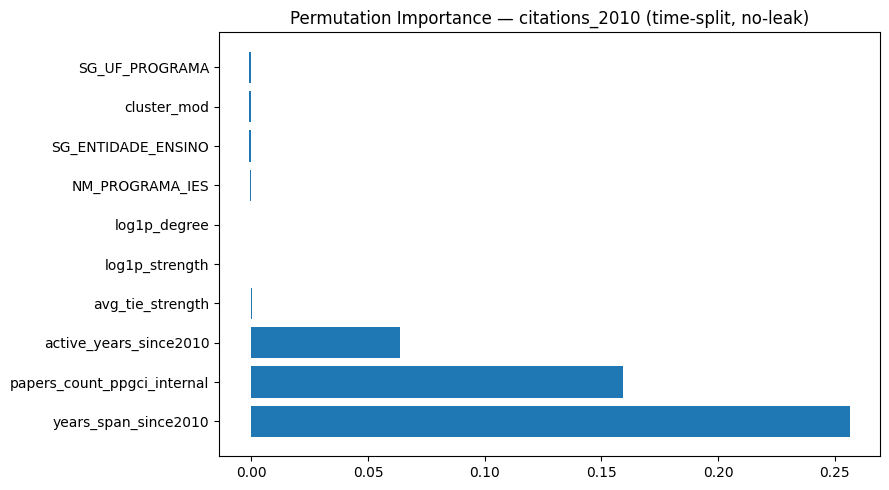

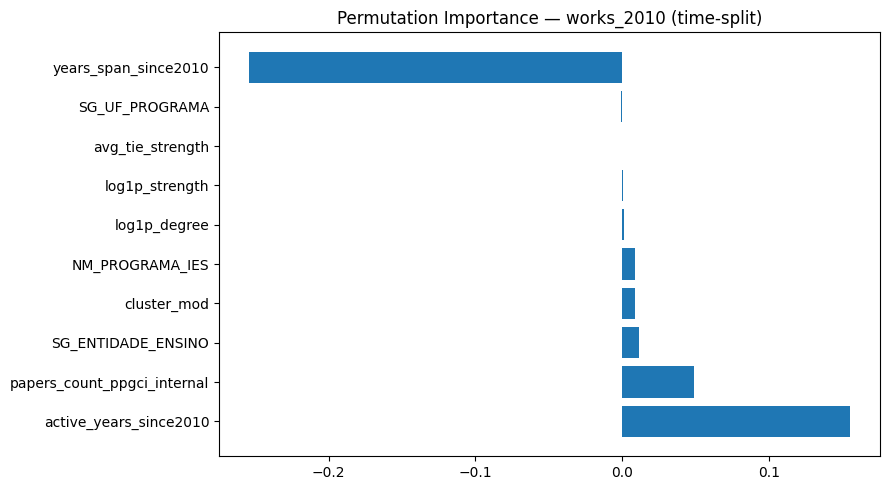


=== RESUMO PARTE 4B (fix) ===
✔️ Métricas salvas em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part4/model_metrics_2010_noleak_robust.json
✔️ Permutation Importance salvos em CSV e PNG na pasta figs/
✔️ Relatório: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part4/report_robusto_2010_noleak.md


In [ ]:
# =========================================================
# PARTE 4B — Validação Robusta (GroupKFold por IES + Time-Split)
# FIX: Permutation Importance agora usa feat_names = X_test.columns
# Base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
# =========================================================

# !pip -q install pandas numpy scikit-learn matplotlib

import os, json, math, random, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

warnings.filterwarnings("ignore")
RSEED = 42
np.random.seed(RSEED); random.seed(RSEED)

# ---------- Drive + paths ----------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P1 = os.path.join(BASE, "part1")
P2 = os.path.join(BASE, "part2")
P4 = os.path.join(BASE, "part4")
FIG = os.path.join(P4, "figs")
os.makedirs(FIG, exist_ok=True)

# ---------- helpers ----------
def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_save_json(obj: dict, path: str):
    def _to_py(o):
        if isinstance(o, (np.integer,)):  return int(o)
        if isinstance(o, (np.floating,)): return float(o)
        if isinstance(o, (np.bool_,)):    return bool(o)
        if isinstance(o, (list, tuple, set)): return [_to_py(x) for x in o]
        if isinstance(o, dict): return {str(k): _to_py(v) for k,v in o.items()}
        return o
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(json.dumps(_to_py(obj), ensure_ascii=False, indent=2))

# ---------- carregar insumos ----------
nodes = pd.read_csv(os.path.join(P2, "nodes_plus_clusters.csv"))          # degree, strength, cluster_mod, SG_UF_PROGRAMA, SG_ENTIDADE_ENSINO, NM_PROGRAMA_IES
intern = pd.read_csv(os.path.join(P1, "node_internal_activity.csv"))      # papers_count_ppgci_internal, citations_internal
agg2010= pd.read_csv(os.path.join(P4, "author_aggregates_2010.csv"))      # works_2010, citations_2010, active_years_since2010, years_span, first_year_since2010, last_year_since2010

# ---------- dataset base (no-leak) ----------
df = nodes.merge(intern, on="nome_tokensort_norm", how="left")\
          .merge(agg2010, on="nome_tokensort_norm", how="left")

for c in ["degree","strength","papers_count_ppgci_internal","citations_internal",
          "works_2010","citations_2010","active_years_since2010","years_span_since2010",
          "first_year_since2010","last_year_since2010"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# features derivadas leves
df["log1p_degree"]     = np.log1p(df["degree"].fillna(0))
df["log1p_strength"]   = np.log1p(df["strength"].fillna(0))
df["avg_tie_strength"] = np.where(df["degree"]>0, df["strength"]/df["degree"], 0.0)

# targets (log1p)
df["y_cit2010"] = np.log1p(df["citations_2010"].fillna(0))
df["y_wrk2010"] = np.log1p(df["works_2010"].fillna(0))

# colunas — numéricas base (sem leakage para CIT)
num_base = [c for c in [
    "log1p_degree","log1p_strength","avg_tie_strength",
    "papers_count_ppgci_internal",
    "active_years_since2010","years_span_since2010",
] if c in df.columns]

num_cols_cit = [c for c in num_base if c not in ["citations_internal"]]  # garantia no-leak
num_cols_wrk = list(num_base)

cat_cols = [c for c in ["cluster_mod","SG_UF_PROGRAMA","SG_ENTIDADE_ENSINO","NM_PROGRAMA_IES"] if c in nodes.columns]

keep = df["y_cit2010"].notna() & df["y_wrk2010"].notna()
df = df[keep].reset_index(drop=True)

# ---------- funções ----------
def make_pipeline(num_cols, cat_cols, alpha=1.0):
    numeric_tf = Pipeline(steps=[("scaler", StandardScaler(with_mean=True, with_std=True))])
    categorical_tf = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
    ct = ColumnTransformer([("num", numeric_tf, num_cols),
                            ("cat", categorical_tf, cat_cols)])
    mdl = Ridge(alpha=alpha, random_state=RSEED)
    return Pipeline(steps=[("prep", ct), ("mdl", mdl)])

def evaluate_groupkfold(num_cols, X, y, groups, n_splits=5, alphas=[0.3,1.0,3.0]):
    uniq = pd.Series(groups).nunique()
    n_splits = int(max(2, min(n_splits, uniq)))
    gkf = GroupKFold(n_splits=n_splits)

    fold_metrics = []
    for fold, (tr, te) in enumerate(gkf.split(X, y, groups=groups), 1):
        best_mse = np.inf; best_alpha = None; best_pipe = None
        for a in alphas:
            pipe = make_pipeline(num_cols, cat_cols, alpha=a)
            pipe.fit(X.iloc[tr], y.iloc[tr])
            pred = pipe.predict(X.iloc[te])
            mse = mean_squared_error(y.iloc[te], pred)
            if mse < best_mse:
                best_mse, best_alpha, best_pipe = mse, a, pipe

        pred_te = best_pipe.predict(X.iloc[te])
        metr = {
            "fold": fold,
            "alpha": float(best_alpha),
            "rmse_test": float(math.sqrt(mean_squared_error(y.iloc[te], pred_te))),
            "mae_test":  float(mean_absolute_error(y.iloc[te], pred_te)),
            "r2_test":   float(r2_score(y.iloc[te], pred_te)),
            "n_test":    int(len(te))
        }
        fold_metrics.append(metr)

    agg = {
        "n_splits": n_splits,
        "rmse_test_mean": float(np.mean([m["rmse_test"] for m in fold_metrics])),
        "mae_test_mean":  float(np.mean([m["mae_test"]  for m in fold_metrics])),
        "r2_test_mean":   float(np.mean([m["r2_test"]   for m in fold_metrics])),
        "alphas":         [m["alpha"] for m in fold_metrics]
    }
    return agg, pd.DataFrame(fold_metrics)

def evaluate_timesplit(num_cols, X, y, years_train_mask):
    tr_idx = np.where(years_train_mask)[0]
    te_idx = np.where(~years_train_mask)[0]
    if len(tr_idx)==0 or len(te_idx)==0:
        raise RuntimeError("Time-split vazio: ajuste o limite temporal.")

    best_mse = np.inf; best_alpha = None; best_pipe = None
    for a in [0.3,1.0,3.0]:
        pipe = make_pipeline(num_cols, cat_cols, alpha=a)
        pipe.fit(X.iloc[tr_idx], y.iloc[tr_idx])
        pred = pipe.predict(X.iloc[te_idx])
        mse = mean_squared_error(y.iloc[te_idx], pred)
        if mse < best_mse:
            best_mse, best_alpha, best_pipe = mse, a, pipe

    pred_te = best_pipe.predict(X.iloc[te_idx])
    metr = {
        "alpha": float(best_alpha),
        "n_train": int(len(tr_idx)),
        "n_test":  int(len(te_idx)),
        "rmse_test": float(math.sqrt(mean_squared_error(y.iloc[te_idx], pred_te))),
        "mae_test":  float(mean_absolute_error(y.iloc[te_idx], pred_te)),
        "r2_test":   float(r2_score(y.iloc[te_idx], pred_te)),
    }
    return metr, best_pipe, (X.iloc[te_idx], y.iloc[te_idx])

def build_Xy(df, target, num_cols):
    y = df[target]
    X = df[num_cols + cat_cols].copy()
    groups = df["SG_ENTIDADE_ENSINO"] if "SG_ENTIDADE_ENSINO" in df.columns else pd.Series(["NA"]*len(df))
    return X, y, groups

# Year mask para time-split (até 2018 vs. 2019–2025)
year_train_mask = (df.get("last_year_since2010", pd.Series([2018]*len(df))) <= 2018)

metrics_all = {"citations_2010_noleak":{}, "works_2010_noleak":{}}

# ===========================
# 1) CITATIONS 2010+ (no-leak)
# ===========================
num_cols_current = num_cols_cit
X_cit, y_cit, groups = build_Xy(df, "y_cit2010", num_cols_current)

# GroupKFold por IES
gkf_cit_agg, gkf_cit_folds = evaluate_groupkfold(num_cols_current, X_cit, y_cit, groups, n_splits=5)
metrics_all["citations_2010_noleak"]["groupkfold_IES"] = {"aggregate": gkf_cit_agg, "folds": gkf_cit_folds.to_dict(orient="records")}

# Time-split
ts_cit_metr, ts_cit_model, (Xte_cit, yte_cit) = evaluate_timesplit(num_cols_current, X_cit, y_cit, year_train_mask)
metrics_all["citations_2010_noleak"]["timesplit"] = ts_cit_metr

# Permutation Importance — usar nomes das COLUNAS DE X TESTE (não do transformado!)
feat_names_cit = list(Xte_cit.columns)
pi_cit = permutation_importance(ts_cit_model, Xte_cit, yte_cit, n_repeats=5, random_state=RSEED, n_jobs=1)
pi_cit_df = pd.DataFrame({"feature": feat_names_cit,
                          "imp_mean": pi_cit.importances_mean,
                          "imp_std":  pi_cit.importances_std}).sort_values("imp_mean", ascending=False)
safe_save_csv(pi_cit_df, os.path.join(P4, "permimp_citations_2010_noleak_timesplit.csv"))

plt.figure(figsize=(9,5))
top = pi_cit_df.head(20)
plt.barh(range(len(top)), top["imp_mean"].values)
plt.yticks(range(len(top)), top["feature"].values)
plt.title("Permutation Importance — citations_2010 (time-split, no-leak)")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG, "permimp_citations_2010_noleak_timesplit.png"), dpi=160); plt.close()

# ==============
# 2) WORKS 2010+
# ==============
num_cols_current = num_cols_wrk
X_wrk, y_wrk, groups = build_Xy(df, "y_wrk2010", num_cols_current)

# GroupKFold por IES
gkf_wrk_agg, gkf_wrk_folds = evaluate_groupkfold(num_cols_current, X_wrk, y_wrk, groups, n_splits=5)
metrics_all["works_2010_noleak"]["groupkfold_IES"] = {"aggregate": gkf_wrk_agg, "folds": gkf_wrk_folds.to_dict(orient="records")}

# Time-split
ts_wrk_metr, ts_wrk_model, (Xte_wrk, yte_wrk) = evaluate_timesplit(num_cols_current, X_wrk, y_wrk, year_train_mask)
metrics_all["works_2010_noleak"]["timesplit"] = ts_wrk_metr

# Permutation Importance — novamente, nomes do X de teste
feat_names_wrk = list(Xte_wrk.columns)
pi_wrk = permutation_importance(ts_wrk_model, Xte_wrk, yte_wrk, n_repeats=5, random_state=RSEED, n_jobs=1)
pi_wrk_df = pd.DataFrame({"feature": feat_names_wrk,
                          "imp_mean": pi_wrk.importances_mean,
                          "imp_std":  pi_wrk.importances_std}).sort_values("imp_mean", ascending=False)
safe_save_csv(pi_wrk_df, os.path.join(P4, "permimp_works_2010_noleak_timesplit.csv"))

plt.figure(figsize=(9,5))
top = pi_wrk_df.head(20)
plt.barh(range(len(top)), top["imp_mean"].values)
plt.yticks(range(len(top)), top["feature"].values)
plt.title("Permutation Importance — works_2010 (time-split)")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG, "permimp_works_2010_noleak_timesplit.png"), dpi=160); plt.close()

# ---------- salvar métricas agregadas ----------
safe_save_json(metrics_all, os.path.join(P4, "model_metrics_2010_noleak_robust.json"))

# ---------- relatório rápido ----------
lines = []
lines.append("# Parte 4B — Validação Robusta (2010+, no-leak)\n")
for tgt in ["citations_2010_noleak","works_2010_noleak"]:
    lines.append(f"## Alvo: {tgt}")
    gkf = metrics_all[tgt]["groupkfold_IES"]["aggregate"]
    ts  = metrics_all[tgt]["timesplit"]
    lines.append(f"- **GroupKFold por IES** (k={gkf['n_splits']}): R² médio = **{gkf['r2_test_mean']:.3f}**, RMSE médio = **{gkf['rmse_test_mean']:.3f}**, MAE médio = **{gkf['mae_test_mean']:.3f}**")
    lines.append(f"- **Time-split (≤2018 → treino; ≥2019 → teste)**: R² = **{ts['r2_test']:.3f}**, RMSE = **{ts['rmse_test']:.3f}**, MAE = **{ts['mae_test']:.3f}**")
    lines.append("")
lines.append("\nArquivos gerados:")
lines.append("- model_metrics_2010_noleak_robust.json")
lines.append("- permimp_citations_2010_noleak_timesplit.csv / permimp_works_2010_noleak_timesplit.csv")
lines.append("- figs/permimp_*_2010_noleak_timesplit.png")
with open(os.path.join(P4, "report_robusto_2010_noleak.md"), "w", encoding="utf-8") as f:
    f.write("\n".join(lines))

print("\n=== RESUMO PARTE 4B (fix) ===")
print("✔️ Métricas salvas em:", os.path.join(P4, "model_metrics_2010_noleak_robust.json"))
print("✔️ Permutation Importance salvos em CSV e PNG na pasta figs/")
print("✔️ Relatório:", os.path.join(P4, "report_robusto_2010_noleak.md"))

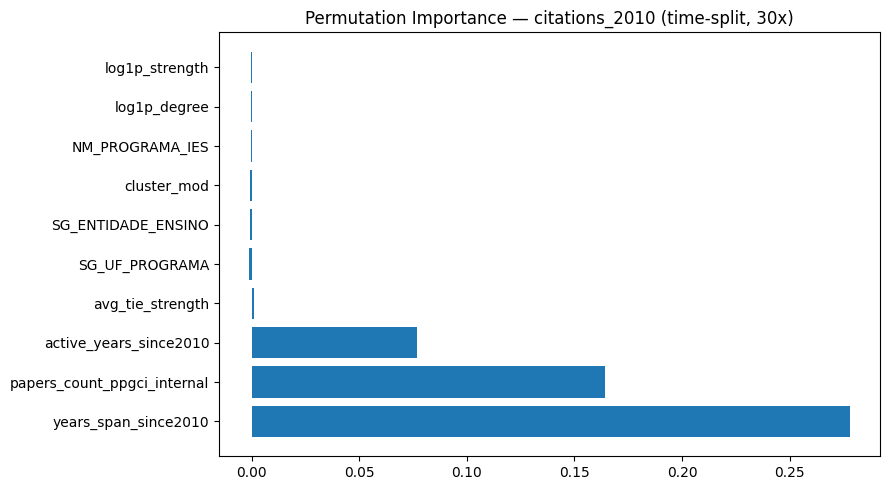

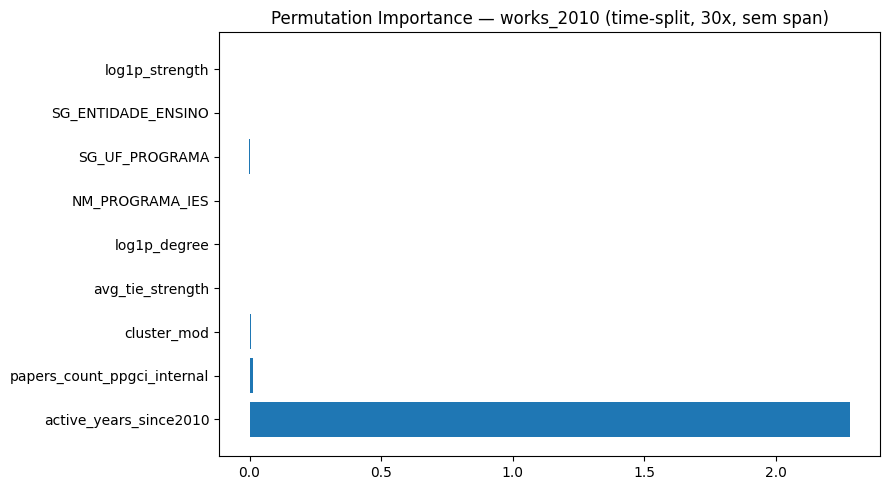

✔️ PI reestimada e salva em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part4


In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P4   = os.path.join(BASE, "part4")
FIG  = os.path.join(P4, "figs")

# Recarrega objetos da 4B (já montados no kernel). Se reiniciou o runtime, reexecute a 4B antes.
# Assumimos que você ainda tem: df, cat_cols, num_cols_cit, num_cols_wrk,
# year_train_mask, make_pipeline, evaluate_timesplit

# ---- 1) CITATIONS: mais repetições e ordenação por |imp| ----
num_cols_current = num_cols_cit
X_cit = df[num_cols_current + cat_cols].copy()
y_cit = df["y_cit2010"].copy()

ts_cit_metr, ts_cit_model, (Xte_cit, yte_cit) = evaluate_timesplit(num_cols_current, X_cit, y_cit, year_train_mask)
pi_cit = permutation_importance(ts_cit_model, Xte_cit, yte_cit,
                                n_repeats=30, random_state=42, n_jobs=1, scoring=None)  # usa R²
feat_cit = list(Xte_cit.columns)
pi_cit_df = pd.DataFrame({"feature": feat_cit,
                          "imp_mean": pi_cit.importances_mean,
                          "imp_std":  pi_cit.importances_std})
pi_cit_df["imp_abs"] = pi_cit_df["imp_mean"].abs()
pi_cit_df = pi_cit_df.sort_values("imp_abs", ascending=False)
pi_cit_df.to_csv(os.path.join(P4, "permimp_citations_2010_noleak_timesplit_stable.csv"), index=False)

plt.figure(figsize=(9,5))
top = pi_cit_df.head(20)
plt.barh(range(len(top)), top["imp_mean"].values)
plt.yticks(range(len(top)), top["feature"].values)
plt.title("Permutation Importance — citations_2010 (time-split, 30x)")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG, "permimp_citations_2010_noleak_timesplit_stable.png"), dpi=160); plt.close()

# ---- 2) WORKS: versão SEM years_span + PI 30x ----
num_cols_wrk_nospan = [c for c in num_cols_wrk if c != "years_span_since2010"]
X_wrk = df[num_cols_wrk_nospan + cat_cols].copy()
y_wrk = df["y_wrk2010"].copy()

ts_wrk_metr, ts_wrk_model, (Xte_wrk, yte_wrk) = evaluate_timesplit(num_cols_wrk_nospan, X_wrk, y_wrk, year_train_mask)
pi_wrk = permutation_importance(ts_wrk_model, Xte_wrk, yte_wrk,
                                n_repeats=30, random_state=42, n_jobs=1)
feat_wrk = list(Xte_wrk.columns)
pi_wrk_df = pd.DataFrame({"feature": feat_wrk,
                          "imp_mean": pi_wrk.importances_mean,
                          "imp_std":  pi_wrk.importances_std})
pi_wrk_df["imp_abs"] = pi_wrk_df["imp_mean"].abs()
pi_wrk_df = pi_wrk_df.sort_values("imp_abs", ascending=False)
pi_wrk_df.to_csv(os.path.join(P4, "permimp_works_2010_noleak_timesplit_nospan_stable.csv"), index=False)

plt.figure(figsize=(9,5))
top = pi_wrk_df.head(20)
plt.barh(range(len(top)), top["imp_mean"].values)
plt.yticks(range(len(top)), top["feature"].values)
plt.title("Permutation Importance — works_2010 (time-split, 30x, sem span)")
plt.tight_layout(); plt.show()
plt.savefig(os.path.join(FIG, "permimp_works_2010_noleak_timesplit_nospan_stable.png"), dpi=160); plt.close()

print("✔️ PI reestimada e salva em:", P4)


🔗 Drive já montado em /content/drive


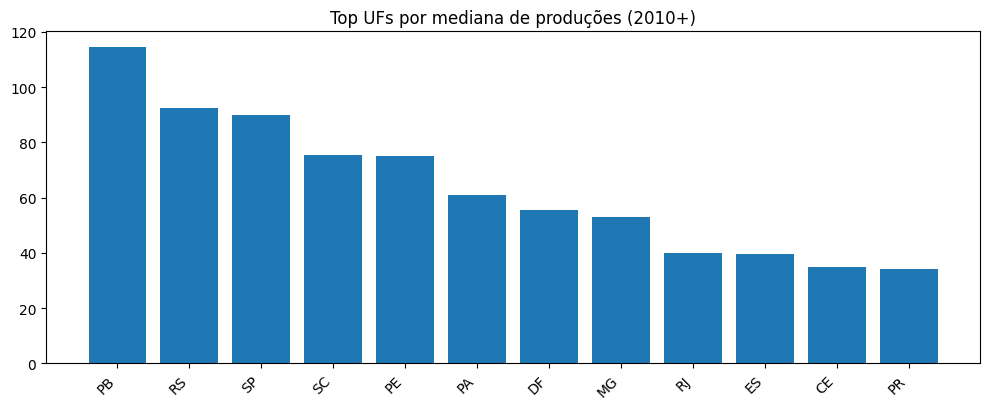

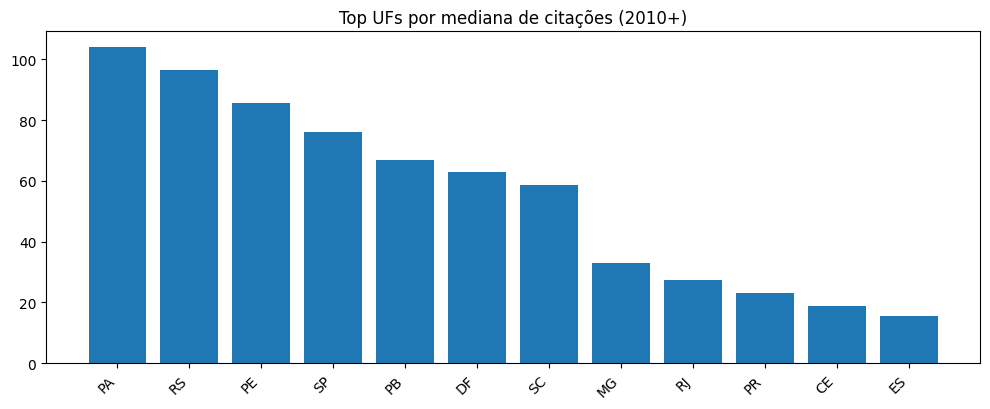

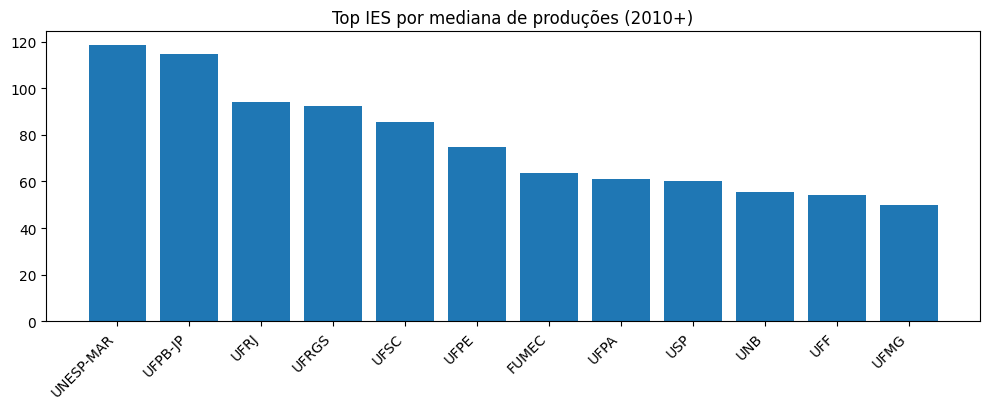

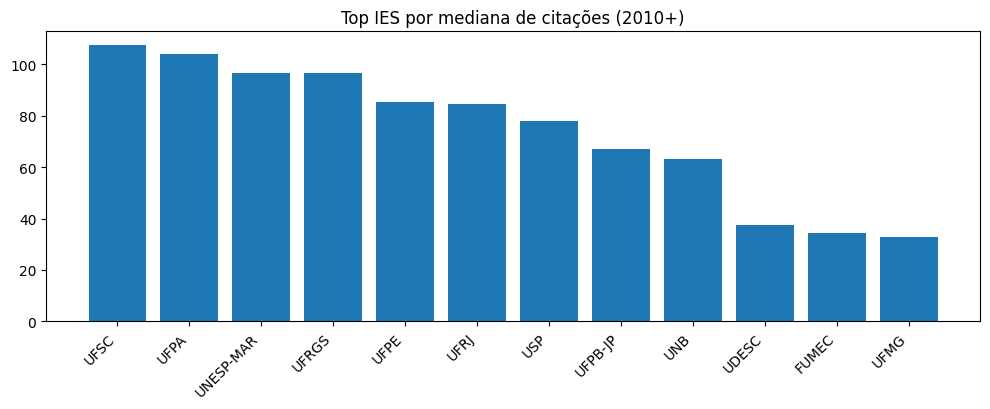

## ✅ Parte 5 — Resumo

### Desempenho dos Modelos (2010+, no-leak)


- Holdout — **citations**: Ridge R²=0.744, RMSE=0.881 | Tree R²=0.651, RMSE=1.029

- Holdout — **works**: Ridge R²=0.897, RMSE=0.382 | Tree R²=0.823, RMSE=0.501

- GroupKFold (IES) — **citations**: R² médio=0.576, RMSE médio=0.980

- GroupKFold (IES) — **works**: R² médio=0.880, RMSE médio=0.360

- Time-split — **citations**: R²=0.369, RMSE=1.209

- Time-split — **works**: R²=-15.948, RMSE=4.167

### Top UFs — mediana de produções (2010+)

,UF,n,mediana,media,p75,p90
7,PB,22,114.5,149.545455,208.50,281.4
12,RS,10,92.5,130.300000,199.75,248.2
15,SP,53,90.0,123.094340,138.00,292.6
13,SC,38,75.5,75.447368,102.50,130.5
8,PE,12,75.0,87.000000,101.00,119.0
6,PA,15,61.0,106.400000,147.00,206.6
3,DF,14,55.5,69.428571,82.25,108.8
5,MG,51,53.0,72.000000,105.00,152.0
10,RJ,66,40.0,65.378788,79.25,130.0
4,ES,10,39.5,40.000000,48.50,56.5


### Top UFs — mediana de citações (2010+)

,UF,n,mediana,media,p75,p90
6,PA,15,104.0,201.066667,250.50,339.6
12,RS,10,96.5,162.000000,220.50,275.5
8,PE,12,85.5,111.250000,127.75,206.5
15,SP,53,76.0,188.735849,253.00,555.2
7,PB,22,67.0,100.863636,138.75,195.6
3,DF,14,63.0,85.785714,127.50,196.9
13,SC,38,58.5,104.131579,135.50,270.5
5,MG,51,33.0,88.117647,100.00,191.0
10,RJ,66,27.5,95.287879,85.25,178.5
9,PR,12,23.0,31.166667,49.00,62.8


### Top IES — mediana de produções (2010+)

,IES,n,mediana,media,p75,p90
20,UNESP-MAR,28,118.5,156.607143,200.25,307.3
12,UFPB-JP,22,114.5,149.545455,208.50,281.4
15,UFRJ,20,94.0,110.950000,124.00,202.2
14,UFRGS,10,92.5,130.300000,199.75,248.2
17,UFSC,18,85.5,97.055556,117.75,146.0
13,UFPE,12,75.0,87.000000,101.00,119.0
1,FUMEC,14,63.5,64.928571,98.50,116.5
11,UFPA,15,61.0,106.400000,147.00,206.6
22,USP,17,60.0,87.705882,97.00,116.8
19,UNB,14,55.5,69.428571,82.25,108.8


### Top IES — mediana de citações (2010+)

,IES,n,mediana,media,p75,p90
17,UFSC,18,107.5,163.222222,241.25,405.8
11,UFPA,15,104.0,201.066667,250.50,339.6
20,UNESP-MAR,28,96.5,237.785714,431.00,569.7
14,UFRGS,10,96.5,162.000000,220.50,275.5
13,UFPE,12,85.5,111.250000,127.75,206.5
15,UFRJ,20,84.5,167.850000,155.25,258.5
22,USP,17,78.0,134.176471,172.00,290.8
12,UFPB-JP,22,67.0,100.863636,138.75,195.6
19,UNB,14,63.0,85.785714,127.50,196.9
2,UDESC,20,37.5,50.950000,63.50,142.1


### Resumo por cluster_mod

,cluster_mod,n,works_med,works_avg,cit_med,cit_avg,degree_avg,strength_avg,papers_intra_med
0,0,65,73.0,102.200000,46.0,89.861538,10.200000,27.315938,43.0
1,1,48,41.0,55.395833,22.5,60.916667,4.458333,10.114740,16.0
2,2,47,52.0,64.127660,40.0,85.851064,5.765957,12.035840,19.0
3,3,42,57.5,81.904762,38.5,114.809524,6.547619,16.761994,20.5
4,4,38,92.0,117.921053,89.0,193.184211,10.236842,27.459174,54.5
5,5,28,72.0,94.857143,49.0,93.392857,7.464286,17.891359,22.5
6,6,22,90.5,112.181818,93.0,222.818182,10.318182,27.187908,47.0
7,7,22,32.0,45.409091,13.5,30.863636,5.863636,12.633259,17.0
8,8,19,66.0,63.842105,36.0,106.631579,6.157895,15.136440,29.0
9,9,17,39.0,38.941176,16.0,56.470588,4.176471,9.308924,13.0



✔️ Parte 5 concluída.
Saídas em: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part5
 - report_final.md
 - table_topcoef_*.csv, table_permimp_*.csv
 - topUF_*.csv / topIES_*.csv / summary_by_cluster.csv
 - figs/*.png


In [ ]:
# =========================================================
# PARTE 5 — Tabelas & Figuras finais para o texto (2010+, no-leak)
# Base: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab
# Gera:
#  - Tabelas CSV: top coef (Ridge), permutation importance (time-split),
#    resumos por UF/IES/cluster, mobilidade (se disponível)
#  - Figuras PNG: top10 UF/IES por mediana de works/citations (2010+)
#  - Relatório Markdown: part5/report_final.md
#  - Mostra no Colab prévias (display)
# =========================================================

# !pip -q install pandas numpy matplotlib

import os, json, math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

warnings.filterwarnings("ignore")

# ---------------- Drive & paths ----------------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P1 = os.path.join(BASE, "part1")
P2 = os.path.join(BASE, "part2")
P4 = os.path.join(BASE, "part4")
P5 = os.path.join(BASE, "part5")
FIG = os.path.join(P5, "figs")
os.makedirs(P5, exist_ok=True)
os.makedirs(FIG, exist_ok=True)

def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

def safe_write(path: str, text: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(text)

# ---------------- Carrega insumos ----------------
nodes  = pd.read_csv(os.path.join(P2, "nodes_plus_clusters.csv"))  # meta + degree/strength/cluster_mod
intern = pd.read_csv(os.path.join(P1, "node_internal_activity.csv"))  # counts intra
agg2010= pd.read_csv(os.path.join(P4, "author_aggregates_2010.csv"))  # works_2010, citations_2010, anos ativos

# coef/ridge (no-leak)
coef_cit_path  = os.path.join(P4,"coef_ridge_citations_2010_noleak.csv")
coef_wrk_path  = os.path.join(P4,"coef_ridge_works_2010_noleak.csv")
coef_cit = pd.read_csv(coef_cit_path) if os.path.exists(coef_cit_path) else pd.DataFrame()
coef_wrk = pd.read_csv(coef_wrk_path) if os.path.exists(coef_wrk_path) else pd.DataFrame()

# árvores em texto (no-leak)
tree_cit_path = os.path.join(P4,"tree_text_citations_2010_noleak.txt")
tree_wrk_path = os.path.join(P4,"tree_text_works_2010_noleak.txt")
tree_cit_txt = open(tree_cit_path,"r",encoding="utf-8").read() if os.path.exists(tree_cit_path) else "(tree file not found)"
tree_wrk_txt = open(tree_wrk_path,"r",encoding="utf-8").read() if os.path.exists(tree_wrk_path) else "(tree file not found)"

# permutation importance (time-split) — usa estável se existir
pi_cit_path = os.path.join(P4,"permimp_citations_2010_noleak_timesplit_stable.csv")
pi_wrk_path = os.path.join(P4,"permimp_works_2010_noleak_timesplit_nospan_stable.csv")
if not os.path.exists(pi_cit_path):
    pi_cit_path = os.path.join(P4,"permimp_citations_2010_noleak_timesplit.csv")
if not os.path.exists(pi_wrk_path):
    pi_wrk_path = os.path.join(P4,"permimp_works_2010_noleak_timesplit.csv")

pi_cit = pd.read_csv(pi_cit_path) if os.path.exists(pi_cit_path) else pd.DataFrame()
pi_wrk = pd.read_csv(pi_wrk_path) if os.path.exists(pi_wrk_path) else pd.DataFrame()

# métricas agregadas
met_hold_path = os.path.join(P4,"model_metrics_2010_noleak.json")
met_rob_path  = os.path.join(P4,"model_metrics_2010_noleak_robust.json")
met_hold = json.load(open(met_hold_path)) if os.path.exists(met_hold_path) else {}
met_rob  = json.load(open(met_rob_path))  if os.path.exists(met_rob_path)  else {}

# ---------------- Master DF para descrições ----------------
df = nodes.merge(agg2010, on="nome_tokensort_norm", how="left")\
          .merge(intern, on="nome_tokensort_norm", how="left")

for c in ["works_2010","citations_2010","active_years_since2010","years_span_since2010",
          "papers_count_ppgci_internal","citations_internal","degree","strength"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0)

# ---------------- Helpers de resumo ----------------
def rank_table(df, group_col, target_col, top=10, min_n=10, label=None):
    g = df.groupby(group_col).agg(
        n=("nome_tokensort_norm","count"),
        mediana=(target_col,"median"),
        media=(target_col,"mean"),
        p75=(target_col, lambda s: s.quantile(0.75)),
        p90=(target_col, lambda s: s.quantile(0.90))
    ).reset_index()
    g = g[g["n"]>=min_n].sort_values(["mediana","media"], ascending=False).head(top)
    if label: g = g.rename(columns={group_col:label})
    return g

def barplot_save(df, xcol, ycol, title, path, rotate=False):
    plt.figure(figsize=(10,4.2))
    plt.bar(range(len(df)), df[ycol].values)
    plt.xticks(range(len(df)), df[xcol].astype(str).values, rotation=45 if rotate else 0, ha="right" if rotate else "center")
    plt.title(title)
    plt.tight_layout(); plt.show()
    plt.savefig(path, dpi=160); plt.close()

# ---------------- 1) Tabelas de coeficientes & PI ----------------
topK = 20
tables_md = []

if not coef_cit.empty:
    coef_cit_top = pd.concat([coef_cit.head(topK), coef_cit.tail(topK).sort_values("coef", ascending=True)])
    safe_save_csv(coef_cit_top, os.path.join(P5, "table_topcoef_citations_2010_noleak.csv"))
    tables_md.append("### Top coeficientes — Ridge (citations_2010, no-leak)\n" + coef_cit_top[["feature","coef"]].to_markdown(index=False))

if not coef_wrk.empty:
    coef_wrk_top = pd.concat([coef_wrk.head(topK), coef_wrk.tail(topK).sort_values("coef", ascending=True)])
    safe_save_csv(coef_wrk_top, os.path.join(P5, "table_topcoef_works_2010_noleak.csv"))
    tables_md.append("### Top coeficientes — Ridge (works_2010)\n" + coef_wrk_top[["feature","coef"]].to_markdown(index=False))

if not pi_cit.empty:
    pi_cit = pi_cit.sort_values("imp_mean", ascending=False)
    safe_save_csv(pi_cit, os.path.join(P5, "table_permimp_citations_timesplit.csv"))
    tables_md.append("### Permutation Importance — citations_2010 (time-split)\n" + pi_cit.head(20).to_markdown(index=False))

if not pi_wrk.empty:
    pi_wrk = pi_wrk.sort_values("imp_mean", ascending=False)
    safe_save_csv(pi_wrk, os.path.join(P5, "table_permimp_works_timesplit.csv"))
    tables_md.append("### Permutation Importance — works_2010 (time-split)\n" + pi_wrk.head(20).to_markdown(index=False))

# ---------------- 2) Resumos por UF / IES / Cluster ----------------
have_uf  = "SG_UF_PROGRAMA" in df.columns
have_ies = "SG_ENTIDADE_ENSINO" in df.columns
have_clus= "cluster_mod" in df.columns

tab_uf_wrk = rank_table(df, "SG_UF_PROGRAMA", "works_2010", top=12, min_n=10, label="UF") if have_uf else pd.DataFrame()
tab_uf_cit = rank_table(df, "SG_UF_PROGRAMA", "citations_2010", top=12, min_n=10, label="UF") if have_uf else pd.DataFrame()
tab_ies_wrk= rank_table(df, "SG_ENTIDADE_ENSINO", "works_2010", top=12, min_n=10, label="IES") if have_ies else pd.DataFrame()
tab_ies_cit= rank_table(df, "SG_ENTIDADE_ENSINO", "citations_2010", top=12, min_n=10, label="IES") if have_ies else pd.DataFrame()

if not tab_uf_wrk.empty:
    safe_save_csv(tab_uf_wrk, os.path.join(P5, "topUF_works2010.csv"))
    barplot_save(tab_uf_wrk, "UF", "mediana", "Top UFs por mediana de produções (2010+)", os.path.join(FIG,"topUF_works2010.png"), rotate=True)
    tables_md.append("### Top UFs — mediana de produções (2010+)\n" + tab_uf_wrk.to_markdown(index=False))
if not tab_uf_cit.empty:
    safe_save_csv(tab_uf_cit, os.path.join(P5, "topUF_citations2010.csv"))
    barplot_save(tab_uf_cit, "UF", "mediana", "Top UFs por mediana de citações (2010+)", os.path.join(FIG,"topUF_citations2010.png"), rotate=True)
    tables_md.append("### Top UFs — mediana de citações (2010+)\n" + tab_uf_cit.to_markdown(index=False))

if not tab_ies_wrk.empty:
    safe_save_csv(tab_ies_wrk, os.path.join(P5, "topIES_works2010.csv"))
    barplot_save(tab_ies_wrk, "IES", "mediana", "Top IES por mediana de produções (2010+)", os.path.join(FIG,"topIES_works2010.png"), rotate=True)
    tables_md.append("### Top IES — mediana de produções (2010+)\n" + tab_ies_wrk.to_markdown(index=False))
if not tab_ies_cit.empty:
    safe_save_csv(tab_ies_cit, os.path.join(P5, "topIES_citations2010.csv"))
    barplot_save(tab_ies_cit, "IES", "mediana", "Top IES por mediana de citações (2010+)", os.path.join(FIG,"topIES_citations2010.png"), rotate=True)
    tables_md.append("### Top IES — mediana de citações (2010+)\n" + tab_ies_cit.to_markdown(index=False))

if have_clus:
    clus = df.groupby("cluster_mod").agg(
        n=("nome_tokensort_norm","count"),
        works_med=("works_2010","median"),
        works_avg=("works_2010","mean"),
        cit_med=("citations_2010","median"),
        cit_avg=("citations_2010","mean"),
        degree_avg=("degree","mean"),
        strength_avg=("strength","mean"),
        papers_intra_med=("papers_count_ppgci_internal","median")
    ).reset_index().sort_values("n", ascending=False)
    safe_save_csv(clus, os.path.join(P5,"summary_by_cluster.csv"))
    tables_md.append("### Resumo por cluster_mod\n" + clus.head(20).to_markdown(index=False))

# ---------------- 3) Mobilidade & orientação (se disponível) ----------------
mob_lines = []
if "NM_IES_TITULACAO" in nodes.columns and "SG_ENTIDADE_ENSINO" in nodes.columns:
    tmp = nodes[["nome_tokensort_norm","NM_IES_TITULACAO","SG_ENTIDADE_ENSINO"]].copy()
    tmp = tmp.merge(agg2010[["nome_tokensort_norm","works_2010","citations_2010"]], on="nome_tokensort_norm", how="left")
    for c in ["works_2010","citations_2010"]: tmp[c] = pd.to_numeric(tmp[c], errors="coerce").fillna(0)
    def norm(s): return str(s).strip().lower()
    tmp["same_ies_train_work"] = (tmp["NM_IES_TITULACAO"].map(norm) == tmp["SG_ENTIDADE_ENSINO"].map(norm)).astype(int)
    mob_rate = tmp["same_ies_train_work"].mean()
    mob_lines.append(f"- Taxa de **mesma IES formação-trabalho**: **{mob_rate:.2%}** (0 = mobilidade).")
    by_ies = tmp.groupby("SG_ENTIDADE_ENSINO").agg(
        n=("nome_tokensort_norm","count"),
        same_rate=("same_ies_train_work","mean"),
        works_med=("works_2010","median"),
        cit_med=("citations_2010","median")
    ).reset_index().sort_values("same_rate", ascending=False)
    by_ies = by_ies[by_ies["n"]>=10]
    safe_save_csv(by_ies, os.path.join(P5,"mobility_by_ies.csv"))
    tables_md.append("### Mobilidade (formação = trabalho) por IES (n≥10)\n" + by_ies.head(20).to_markdown(index=False))
else:
    mob_lines.append("- Colunas de formação (NM_IES_TITULACAO) não encontradas no `nodes_plus_clusters.csv`; mobilidade omitida.")

orient_lines = []
has_orient = ("NM_ORIENTADOR" in nodes.columns) or ("NM_COORIENTADOR" in nodes.columns)
if has_orient:
    # presença de orientador/coorientador (apenas contagem/flag)
    tmp = nodes[["nome_tokensort_norm"] + [c for c in ["NM_ORIENTADOR","NM_COORIENTADOR"] if c in nodes.columns]].copy()
    for c in ["NM_ORIENTADOR","NM_COORIENTADOR"]:
        if c in tmp.columns:
            tmp[c+"_flag"] = (~tmp[c].isna() & (tmp[c].astype(str).str.len()>0)).astype(int)
    flags = [c for c in tmp.columns if c.endswith("_flag")]
    if flags:
        tmpf = tmp[["nome_tokensort_norm"] + flags].merge(agg2010[["nome_tokensort_norm","works_2010","citations_2010"]], on="nome_tokensort_norm", how="left")
        for c in ["works_2010","citations_2010"]: tmpf[c] = pd.to_numeric(tmpf[c], errors="coerce").fillna(0)
        sums = tmpf[flags].mean().to_dict()
        orient_lines.append("- Presença de metadados de orientação:")
        for k,v in sums.items():
            orient_lines.append(f"  - {k}: **{v:.2%}**")
        # diferença de medianas simples
        for k in flags:
            a = tmpf.loc[tmpf[k]==1,"citations_2010"].median()
            b = tmpf.loc[tmpf[k]==0,"citations_2010"].median()
            orient_lines.append(f"  - Mediana de citações (flag {k} vs não): {a:.1f} vs {b:.1f}")
    else:
        orient_lines.append("- Flags de orientação indisponíveis na base atual.")
else:
    orient_lines.append("- Colunas de orientação não encontradas; seção omitida.")

# ---------------- 4) Métricas dos modelos — resumo ----------------
def fmt_hold(met: dict, key):
    if key not in met: return "–"
    r = met[key]["ridge"]; t = met[key]["tree"]
    return f"Ridge R²={r['r2_test']:.3f}, RMSE={r['rmse_test']:.3f} | Tree R²={t['r2_test']:.3f}, RMSE={t['rmse_test']:.3f}"

def fmt_rob(met: dict, key, kind):
    if key not in met or kind not in met[key]: return "–"
    if kind=="groupkfold_IES":
        g = met[key][kind]["aggregate"]; return f"R² médio={g['r2_test_mean']:.3f}, RMSE médio={g['rmse_test_mean']:.3f}"
    if kind=="timesplit":
        t = met[key][kind]; return f"R²={t['r2_test']:.3f}, RMSE={t['rmse_test']:.3f}"

summary_lines = []
summary_lines.append("### Desempenho dos Modelos (2010+, no-leak)\n")
summary_lines.append(f"- Holdout — **citations**: {fmt_hold(met_hold, 'citations_2010_noleak')}")
summary_lines.append(f"- Holdout — **works**: {fmt_hold(met_hold, 'works_2010_noleak')}")
summary_lines.append(f"- GroupKFold (IES) — **citations**: {fmt_rob(met_rob, 'citations_2010_noleak','groupkfold_IES')}")
summary_lines.append(f"- GroupKFold (IES) — **works**: {fmt_rob(met_rob, 'works_2010_noleak','groupkfold_IES')}")
summary_lines.append(f"- Time-split — **citations**: {fmt_rob(met_rob, 'citations_2010_noleak','timesplit')}")
summary_lines.append(f"- Time-split — **works**: {fmt_rob(met_rob, 'works_2010_noleak','timesplit')}")

# ---------------- 5) Relatório Markdown ----------------
report = []
report.append("# Relatório Final — Parte 5 (2010+, no-leak)\n")
report.append("## 1. Modelos — desempenho\n" + "\n".join(summary_lines) + "\n")
report.append("## 2. Top coeficientes & regras de árvore\n")
if not coef_cit.empty: report.append("**Ridge (citations_2010)** — top coeficientes (±): veja `table_topcoef_citations_2010_noleak.csv`.\n")
if not coef_wrk.empty: report.append("**Ridge (works_2010)** — top coeficientes (±): veja `table_topcoef_works_2010_noleak.csv`.\n")
report.append("**Árvore (citations_2010)** — regras (primeiras linhas):\n\n```\n" + tree_cit_txt[:800] + "\n```\n")
report.append("**Árvore (works_2010)** — regras (primeiras linhas):\n\n```\n" + tree_wrk_txt[:800] + "\n```\n")
report.append("## 3. Permutation Importance (time-split)\n")
if not pi_cit.empty: report.append("Top variáveis em **citations_2010**: veja `permimp_citations_2010_noleak_timesplit*.csv/png`.\n")
if not pi_wrk.empty: report.append("Top variáveis em **works_2010**: veja `permimp_works_2010_noleak_timesplit*.csv/png`.\n")
report.append("## 4. Resumos por UF / IES / cluster\n")
if not tab_uf_wrk.empty: report.append("- `topUF_works2010.csv` / `figs/topUF_works2010.png`")
if not tab_uf_cit.empty: report.append("- `topUF_citations2010.csv` / `figs/topUF_citations2010.png`")
if not tab_ies_wrk.empty: report.append("- `topIES_works2010.csv` / `figs/topIES_works2010.png`")
if not tab_ies_cit.empty: report.append("- `topIES_citations2010.csv` / `figs/topIES_citations2010.png`")
if have_clus: report.append("- `summary_by_cluster.csv` (n, medianas/médias, grau/força médios, intra med.)")
report.append("## 5. Mobilidade & orientação\n" + "\n".join(mob_lines + orient_lines))

safe_write(os.path.join(P5,"report_final.md"), "\n\n".join(report))

# ---------------- 6) Visualização rápida no Colab ----------------
display(Markdown("## ✅ Parte 5 — Resumo"))
for sec in summary_lines: display(Markdown(sec))

if not tab_uf_wrk.empty:
    display(Markdown("### Top UFs — mediana de produções (2010+)")); display(tab_uf_wrk)
if not tab_uf_cit.empty:
    display(Markdown("### Top UFs — mediana de citações (2010+)")); display(tab_uf_cit)
if not tab_ies_wrk.empty:
    display(Markdown("### Top IES — mediana de produções (2010+)")); display(tab_ies_wrk)
if not tab_ies_cit.empty:
    display(Markdown("### Top IES — mediana de citações (2010+)")); display(tab_ies_cit)
if have_clus:
    display(Markdown("### Resumo por cluster_mod")); display(clus.head(20))

print("\n✔️ Parte 5 concluída.")
print("Saídas em:", P5)
print(" - report_final.md")
print(" - table_topcoef_*.csv, table_permimp_*.csv")
print(" - topUF_*.csv / topIES_*.csv / summary_by_cluster.csv")
print(" - figs/*.png")


In [ ]:
# =========================================================
# PARTE 7 — Pacote de Submissão (Markdown + DOCX + ZIP)
# com auto-instalação de python-docx
# =========================================================

# !pip -q install pandas numpy matplotlib  # (já deve estar)
import os, json, textwrap, zipfile, warnings
import pandas as pd
import numpy as np

# ---- garante python-docx ----
try:
    from docx import Document
    from docx.shared import Inches
    from docx.enum.text import WD_ALIGN_PARAGRAPH
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "python-docx"])
    from docx import Document
    from docx.shared import Inches
    from docx.enum.text import WD_ALIGN_PARAGRAPH

warnings.filterwarnings("ignore")

# ---------- Drive & paths ----------
def mount_drive_safely(mountpoint="/content/drive"):
    try:
        if os.path.exists(os.path.join(mountpoint, "MyDrive")):
            print(f"🔗 Drive já montado em {mountpoint}")
            return
        from google.colab import drive
        drive.mount(mountpoint)
        print(f"✅ Drive montado em {mountpoint}")
    except Exception:
        from google.colab import drive
        print("⚠️ Remontando Drive…")
        drive.mount(mountpoint, force_remount=True)
        print(f"✅ Drive remontado em {mountpoint}")

mount_drive_safely()

BASE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab"
P1 = os.path.join(BASE, "part1")
P2 = os.path.join(BASE, "part2")
P4 = os.path.join(BASE, "part4")
P5 = os.path.join(BASE, "part5")
P7 = os.path.join(BASE, "part7")
FIG5 = os.path.join(P5, "figs")
FIG4 = os.path.join(P4, "figs")
os.makedirs(P7, exist_ok=True)

def safe_write(path, text):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    with open(path, "w", encoding="utf-8") as f:
        f.write(text)

def safe_save_csv(df: pd.DataFrame, path: str):
    if os.path.exists(path):
        try: os.remove(path)
        except Exception: pass
    df.to_csv(path, index=False)

# ---------- Carrega insumos ----------
moo = {}
moo_path = os.path.join(P2, "moo_beta_metrics.json")
if os.path.exists(moo_path):
    with open(moo_path, "r", encoding="utf-8") as f:
        moo = json.load(f)
BSTAR = float(moo.get("chosen_beta", 0.50))

met_hold = {}
met_hold_path = os.path.join(P4, "model_metrics_2010_noleak.json")
if os.path.exists(met_hold_path):
    met_hold = json.load(open(met_hold_path,"r"))

met_rob = {}
met_rob_path = os.path.join(P4, "model_metrics_2010_noleak_robust.json")
if os.path.exists(met_rob_path):
    met_rob = json.load(open(met_rob_path,"r"))

coef_cit_path = os.path.join(P4, "coef_ridge_citations_2010_noleak.csv")
coef_wrk_path = os.path.join(P4, "coef_ridge_works_2010_noleak.csv")
pi_cit_path   = os.path.join(P4, "permimp_citations_2010_noleak_timesplit_stable.csv")
pi_wrk_path   = os.path.join(P4, "permimp_works_2010_noleak_timesplit_nospan_stable.csv")
if not os.path.exists(pi_cit_path):
    pi_cit_path = os.path.join(P4, "permimp_citations_2010_noleak_timesplit.csv")
if not os.path.exists(pi_wrk_path):
    pi_wrk_path = os.path.join(P4, "permimp_works_2010_noleak_timesplit.csv")

tabUFw  = os.path.join(P5,"topUF_works2010.csv")
tabUFc  = os.path.join(P5,"topUF_citations2010.csv")
tabIESw = os.path.join(P5,"topIES_works2010.csv")
tabIESc = os.path.join(P5,"topIES_citations2010.csv")
tabCLUS = os.path.join(P5,"summary_by_cluster.csv")

fig_candidates = [
    os.path.join(FIG4, "ridge_topcoef_citations_2010_noleak.png"),
    os.path.join(FIG4, "ridge_topcoef_works_2010_noleak.png"),
    os.path.join(FIG4, "tree_featimp_citations_2010_noleak.png"),
    os.path.join(FIG4, "tree_featimp_works_2010_noleak.png"),
    os.path.join(FIG4, "permimp_citations_2010_noleak_timesplit.png"),
    os.path.join(FIG4, "permimp_citations_2010_noleak_timesplit_stable.png"),
    os.path.join(FIG4, "permimp_works_2010_noleak_timesplit.png"),
    os.path.join(FIG4, "permimp_works_2010_noleak_timesplit_nospan_stable.png"),
    os.path.join(FIG5, "topUF_works2010.png"),
    os.path.join(FIG5, "topUF_citations2010.png"),
    os.path.join(FIG5, "topIES_works2010.png"),
    os.path.join(FIG5, "topIES_citations2010.png"),
]

def fmt_hold(met: dict, key):
    if key not in met: return "–"
    r = met[key]["ridge"]; t = met[key]["tree"]
    return f"Ridge R²={r['r2_test']:.3f}, RMSE={r['rmse_test']:.3f} | Tree R²={t['r2_test']:.3f}, RMSE={t['rmse_test']:.3f}"

def fmt_rob(met: dict, key, kind):
    if key not in met or kind not in met[key]: return "–"
    if kind=="groupkfold_IES":
        g = met[key][kind]["aggregate"]; return f"R² médio={g['r2_test_mean']:.3f}, RMSE médio={g['rmse_test_mean']:.3f}"
    if kind=="timesplit":
        t = met[key][kind]; return f"R²={t['r2_test']:.3f}, RMSE={t['rmse_test']:.3f}"

def md_table_from_csv(path, max_rows=20):
    if not os.path.exists(path): return "(arquivo não encontrado)"
    df = pd.read_csv(path)
    return df.head(max_rows).to_markdown(index=False)

# ---------- 1) Markdown ----------
md_lines = []
md_lines.append("# Manuscrito — PPGCI (intra, 2010+, no-leak)\n")
md_lines.append(f"**Backbone β*** = **{BSTAR:.2f}** (selecionado via MOO na Parte 2).")
md_lines.append("\n## Metodologia (resumo)")
md_lines.append("- Rede **intra-PPGCI** (coautorias com ≥1 docente PPGCI; artigos solo excluídos).")
md_lines.append("- Backbone por **Disparity Filter**, β escolhido por **MOO** (qualidade de comunidade + robustez).")
md_lines.append("- Alvos (2010+): `works_2010`, `citations_2010`; modelos **explicáveis** (Ridge + Árvore).")
md_lines.append("- **No-leak**: removidas features com o próprio alvo de citações no período.")

md_lines.append("\n## Desempenho dos modelos")
md_lines.append(f"- Holdout — **citations**: {fmt_hold(met_hold, 'citations_2010_noleak')}")
md_lines.append(f"- Holdout — **works**: {fmt_hold(met_hold, 'works_2010_noleak')}")
md_lines.append(f"- GroupKFold (IES) — **citations**: {fmt_rob(met_rob, 'citations_2010_noleak','groupkfold_IES')}")
md_lines.append(f"- GroupKFold (IES) — **works**: {fmt_rob(met_rob, 'works_2010_noleak','groupkfold_IES')}")
md_lines.append(f"- Time-split — **citations**: {fmt_rob(met_rob, 'citations_2010_noleak','timesplit')}")
md_lines.append(f"- Time-split — **works**: {fmt_rob(met_rob, 'works_2010_noleak','timesplit')}")

if os.path.exists(coef_cit_path):
    md_lines.append("\n## Top coeficientes — Ridge (citations_2010)")
    md_lines.append(md_table_from_csv(coef_cit_path, max_rows=20))
if os.path.exists(coef_wrk_path):
    md_lines.append("\n## Top coeficientes — Ridge (works_2010)")
    md_lines.append(md_table_from_csv(coef_wrk_path, max_rows=20))

if os.path.exists(pi_cit_path):
    md_lines.append("\n## Permutation Importance — citations_2010 (time-split)")
    md_lines.append(md_table_from_csv(pi_cit_path, max_rows=20))
if os.path.exists(pi_wrk_path):
    md_lines.append("\n## Permutation Importance — works_2010 (time-split)")
    md_lines.append(md_table_from_csv(pi_wrk_path, max_rows=20))

tabUFw  = os.path.join(P5,"topUF_works2010.csv")
tabUFc  = os.path.join(P5,"topUF_citations2010.csv")
tabIESw = os.path.join(P5,"topIES_works2010.csv")
tabIESc = os.path.join(P5,"topIES_citations2010.csv")
tabCLUS = os.path.join(P5,"summary_by_cluster.csv")

if os.path.exists(tabUFw):
    md_lines.append("\n## Top UFs — mediana de produções (2010+)")
    md_lines.append(md_table_from_csv(tabUFw))
if os.path.exists(tabUFc):
    md_lines.append("\n## Top UFs — mediana de citações (2010+)")
    md_lines.append(md_table_from_csv(tabUFc))
if os.path.exists(tabIESw):
    md_lines.append("\n## Top IES — mediana de produções (2010+)")
    md_lines.append(md_table_from_csv(tabIESw))
if os.path.exists(tabIESc):
    md_lines.append("\n## Top IES — mediana de citações (2010+)")
    md_lines.append(md_table_from_csv(tabIESc))
if os.path.exists(tabCLUS):
    md_lines.append("\n## Resumo por cluster")
    md_lines.append(md_table_from_csv(tabCLUS))

manuscript_md = "\n\n".join(md_lines)
safe_write(os.path.join(P7, "manuscript.md"), manuscript_md)

# ---------- 2) DOCX ----------
doc = Document()
doc.core_properties.title = "PPGCI — Rede Intra (2010+, no-leak)"
h = doc.add_heading("PPGCI — Rede Intra (2010+, no-leak)", 0); h.alignment = WD_ALIGN_PARAGRAPH.CENTER
doc.add_paragraph(f"Backbone β* = {BSTAR:.2f} (MOO). Modelos explicáveis (Ridge + Árvore), alvos 2010+, no-leak.")

doc.add_heading("Desempenho dos Modelos", level=1)
doc.add_paragraph(f"Holdout — citations: {fmt_hold(met_hold, 'citations_2010_noleak')}")
doc.add_paragraph(f"Holdout — works: {fmt_hold(met_hold, 'works_2010_noleak')}")
doc.add_paragraph(f"GroupKFold (IES) — citations: {fmt_rob(met_rob, 'citations_2010_noleak','groupkfold_IES')}")
doc.add_paragraph(f"GroupKFold (IES) — works: {fmt_rob(met_rob, 'works_2010_noleak','groupkfold_IES')}")
doc.add_paragraph(f"Time-split — citations: {fmt_rob(met_rob, 'citations_2010_noleak','timesplit')}")
doc.add_paragraph(f"Time-split — works: {fmt_rob(met_rob, 'works_2010_noleak','timesplit')}")

def add_table_from_csv(document, path, title, max_rows=15):
    if not os.path.exists(path):
        document.add_paragraph(f"{title}: (arquivo ausente)")
        return
    df = pd.read_csv(path).head(max_rows)
    document.add_heading(title, level=2)
    tbl = document.add_table(rows=1, cols=len(df.columns))
    hdr = tbl.rows[0].cells
    for j,c in enumerate(df.columns): hdr[j].text = str(c)
    for _, row in df.iterrows():
        cells = tbl.add_row().cells
        for j, c in enumerate(df.columns):
            cells[j].text = str(row[c])
    document.add_paragraph("")

add_table_from_csv(doc, coef_cit_path, "Top coeficientes — Ridge (citations_2010)")
add_table_from_csv(doc, coef_wrk_path, "Top coeficientes — Ridge (works_2010)")
add_table_from_csv(doc, pi_cit_path,   "Permutation Importance — citations_2010 (time-split)")
add_table_from_csv(doc, pi_wrk_path,   "Permutation Importance — works_2010 (time-split)")
add_table_from_csv(doc, tabUFw,        "Top UFs — mediana de produções (2010+)")
add_table_from_csv(doc, tabUFc,        "Top UFs — mediana de citações (2010+)")
add_table_from_csv(doc, tabIESw,       "Top IES — mediana de produções (2010+)")
add_table_from_csv(doc, tabIESc,       "Top IES — mediana de citações (2010+)")
add_table_from_csv(doc, tabCLUS,       "Resumo por cluster")

doc.add_heading("Figuras", level=1)
for fp in fig_candidates:
    if os.path.exists(fp):
        try:
            doc.add_paragraph(os.path.basename(fp))
            doc.add_picture(fp, width=Inches(6.2))
        except Exception as e:
            doc.add_paragraph(f"(erro ao inserir {os.path.basename(fp)}: {e})")

docx_path = os.path.join(P7, "manuscript.docx")
if os.path.exists(docx_path):
    try: os.remove(docx_path)
    except Exception: pass
doc.save(docx_path)

# ---------- 3) ZIP ----------
include_files = []
for fp in fig_candidates:
    if os.path.exists(fp): include_files.append(fp)
for p in [coef_cit_path, coef_wrk_path, pi_cit_path, pi_wrk_path, tabUFw, tabUFc, tabIESw, tabIESc, tabCLUS]:
    if os.path.exists(p): include_files.append(p)
include_files += [os.path.join(P7, "manuscript.md"), os.path.join(P7, "manuscript.docx")]

flist = pd.DataFrame({"file": include_files})
safe_save_csv(flist, os.path.join(P7, "filelist.csv"))

zip_path = os.path.join(P7, "pack_submission.zip")
if os.path.exists(zip_path):
    try: os.remove(zip_path)
    except Exception: pass
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as zf:
    for fp in include_files:
        arcname = os.path.join("submission_pack", os.path.relpath(fp, BASE))
        zf.write(fp, arcname=arcname)

# ---------- Preview ----------
print("\n=== PREVIEW — manuscript.md (primeiras 80 linhas) ===")
with open(os.path.join(P7, "manuscript.md"), "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i>=80: break
        print(line.rstrip())

print("\n=== INVENTÁRIO (part7/filelist.csv) ===")
print(pd.read_csv(os.path.join(P7, "filelist.csv")).head(20))

print("\n✔️ Parte 7 concluída.")
print("Arquivos salvos em:", P7)
print(" - manuscript.md")
print(" - manuscript.docx")
print(" - pack_submission.zip")
print(" - filelist.csv")

🔗 Drive já montado em /content/drive

=== PREVIEW — manuscript.md (primeiras 80 linhas) ===
# Manuscrito — PPGCI (intra, 2010+, no-leak)


**Backbone β*** = **0.50** (selecionado via MOO na Parte 2).


## Metodologia (resumo)

- Rede **intra-PPGCI** (coautorias com ≥1 docente PPGCI; artigos solo excluídos).

- Backbone por **Disparity Filter**, β escolhido por **MOO** (qualidade de comunidade + robustez).

- Alvos (2010+): `works_2010`, `citations_2010`; modelos **explicáveis** (Ridge + Árvore).

- **No-leak**: removidas features com o próprio alvo de citações no período.


## Desempenho dos modelos

- Holdout — **citations**: Ridge R²=0.744, RMSE=0.881 | Tree R²=0.651, RMSE=1.029

- Holdout — **works**: Ridge R²=0.897, RMSE=0.382 | Tree R²=0.823, RMSE=0.501

- GroupKFold (IES) — **citations**: R² médio=0.576, RMSE médio=0.980

- GroupKFold (IES) — **works**: R² médio=0.880, RMSE médio=0.360

- Time-split — **citations**: R²=0.369, RMSE=1.209

- Time-split — **works**: R²=-15.948, RMSE

In [ ]:
# ============================================================
# PARTE 8 — Validação de comunidades além da Silhouette (ROBUSTA)
# - Corrige FileNotFound: detecta/monta Drive e resolve caminhos automaticamente
# - Se necessário, edite NODES_PATH_OVERRIDE / EDGES_PATH_OVERRIDE abaixo
# ============================================================

# !pip -q install networkx python-louvain scikit-learn

import os, re, json, math, random, glob
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

try:
    import community as community_louvain  # python-louvain
except Exception as e:
    raise ImportError("Instale 'python-louvain' com: !pip install python-louvain") from e

# -------------------- 1) Monta Drive (se estiver em Colab) --------------------
try:
    from google.colab import drive  # type: ignore
    if not os.path.isdir("/content/drive/MyDrive"):
        drive.mount("/content/drive", force_remount=True)
except Exception:
    pass

# -------------------- 2) Configura caminhos --------------------
# >>> Se souber os caminhos exatos, EDITE AQUI:
NODES_PATH_OVERRIDE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part2/nodes_plus_clusters.csv"
EDGES_PATH_OVERRIDE = "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part2/edges_beta.csv"

BASE_CANDIDATES = [
    "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab",
    "/content/drive/MyDrive/projeto_ppgcc",
    "/content/drive/MyDrive/PPGCI_moo_lab",
    "/content/drive/MyDrive/PPGCI_lab",
    ".",
]

def smart_find(default_rel):
    # tenta override
    override = NODES_PATH_OVERRIDE if "nodes_plus" in default_rel else EDGES_PATH_OVERRIDE
    if override and os.path.exists(override):
        return override
    # tenta nas bases candidatas
    for base in BASE_CANDIDATES:
        p = os.path.join(base, default_rel)
        if os.path.exists(p):
            return p
    # busca recursiva limitada no Drive (pode levar alguns segundos)
    root = "/content/drive/MyDrive"
    if os.path.isdir(root):
        name = os.path.basename(default_rel)
        hits = glob.glob(os.path.join(root, "**", name), recursive=True)
        if hits:
            # prioriza caminhos que contenham '/part2/'
            hits_sorted = sorted(hits, key=lambda x: ("/part2/" not in x, len(x)))
            return hits_sorted[0]
    # fallback: arquivo no diretório atual
    if os.path.exists(os.path.basename(default_rel)):
        return os.path.basename(default_rel)
    return None

nodes_path = smart_find("part2/nodes_plus_clusters.csv")
edges_path = smart_find("part2/edges_beta.csv")

print(">> Procurando arquivos da PARTE 2...")
print("nodes_plus_clusters.csv:", nodes_path)
print("edges_beta.csv         :", edges_path)

if nodes_path is None or edges_path is None:
    raise FileNotFoundError(
        "Não encontrei 'nodes_plus_clusters.csv' e/ou 'edges_beta.csv'. "
        "Edite NODES_PATH_OVERRIDE/EDGES_PATH_OVERRIDE com os caminhos exatos "
        "ou coloque os arquivos no diretório atual."
    )

# Saída
BASE_DIR = os.path.dirname(os.path.dirname(nodes_path))  # supõe .../part2/arquivo.csv
PART8 = os.path.join(BASE_DIR, "part8")
os.makedirs(PART8, exist_ok=True)

# -------------------- 3) Utilidades --------------------
def normalize_name_token_sort(s: str) -> str:
    import unicodedata
    if pd.isna(s): return ""
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    s = re.sub(r"[^a-z\s]", " ", s)
    toks = [t for t in s.split() if len(t) >= 2]
    toks.sort()
    return " ".join(toks)

def pick_nodes_and_weight(df: pd.DataFrame):
    pairs = [
        ("source","target"), ("src","dst"), ("from","to"),
        ("u","v"), ("i","j"), ("n1","n2"),
        ("node_u","node_v"), ("author_u","author_v"),
        ("author1","author2"), ("a","b")
    ]
    lower = {c: c.lower() for c in df.columns}
    src_col = dst_col = None
    for a,b in pairs:
        ca = next((c for c in df.columns if lower[c] == a), None)
        cb = next((c for c in df.columns if lower[c] == b), None)
        if ca and cb: src_col, dst_col = ca, cb; break
        ca = next((c for c in df.columns if re.search(rf"\b{a}\b", lower[c])), None)
        cb = next((c for c in df.columns if re.search(rf"\b{b}\b", lower[c])), None)
        if ca and cb: src_col, dst_col = ca, cb; break
    if src_col is None or dst_col is None:
        nonnum = [c for c in df.columns if not pd.api.types.is_numeric_dtype(df[c])]
        if len(nonnum) >= 2:
            src_col, dst_col = nonnum[0], nonnum[1]
        else:
            raise KeyError("Não foi possível identificar colunas de nós (source/target).")
    weight_col = None
    for c in df.columns:
        cl = c.lower()
        if any(tag in cl for tag in ["weight","w","edge_weight","count","freq","strength"]) \
           and pd.api.types.is_numeric_dtype(df[c]):
            weight_col = c; break
    return src_col, dst_col, weight_col

def community_from_labels(nodes_list, labels_map):
    groups = defaultdict(list)
    for u in nodes_list:
        groups[labels_map[u]].append(u)
    return [set(v) for v in groups.values()]

def modularity_Q(G, labels_map, weight="weight"):
    return community_louvain.modularity(labels_map, G, weight=weight)

def coverage_fraction(G, communities, weight="weight"):
    total_w = sum(float(d.get(weight,1.0)) for *_ , d in G.edges(data=True))
    if total_w <= 0: return np.nan
    comm_id = {}
    for cid, C in enumerate(communities):
        for u in C: comm_id[u] = cid
    intra_w = 0.0
    for u,v,d in G.edges(data=True):
        if comm_id.get(u,-1) == comm_id.get(v,-1):
            intra_w += float(d.get(weight,1.0))
    return intra_w / total_w

def conductance_per_community(G, communities, weight="weight"):
    volumes = {}
    for i,C in enumerate(communities):
        vol = 0.0
        for u in C:
            vol += sum(float(d.get(weight,1.0)) for *_ , d in G.edges(u, data=True))
        volumes[i] = vol
    total_vol = sum(volumes.values())
    rows = []
    for i,C in enumerate(communities):
        cut = 0.0
        Cset = set(C)
        for u in C:
            for v,d in G[u].items():
                if v not in Cset:
                    cut += float(d.get(weight,1.0))
        denom = min(volumes[i], total_vol - volumes[i]) if total_vol > 0 else np.nan
        phi = (cut/denom) if denom and denom>0 else np.nan
        rows.append({"community": i, "size": len(C), "volume": volumes[i], "cut": cut, "conductance": phi})
    df = pd.DataFrame(rows)
    simple_mean = float(df["conductance"].mean())
    weighted_mean = float(np.average(df["conductance"], weights=np.maximum(df["volume"], 1e-9)))
    return df, simple_mean, weighted_mean

def asymptotic_surprise(G, communities):
    n = G.number_of_nodes()
    m = G.number_of_edges()
    if n < 2 or m == 0: return np.nan
    comm_id = {}
    for cid,C in enumerate(communities):
        for u in C: comm_id[u] = cid
    E_intra = sum(1 for u,v in G.edges() if comm_id.get(u,-1)==comm_id.get(v,-1))
    M = n*(n-1)/2.0
    M_intra = sum(len(C)*(len(C)-1)/2.0 for C in communities)
    q = E_intra/max(m,1)
    p = M_intra/max(M,1)
    eps=1e-12
    q = min(max(q, eps), 1.0-eps)
    p = min(max(p, eps), 1.0-eps)
    return float(m*( q*math.log(q/p) + (1-q)*math.log((1-q)/(1-p)) ))

def print_table_like(title, df):
    print(title)
    print("=" * len(title))
    print(df.to_string(index=False))
    print()

# -------------------- 4) Carrega dados --------------------
nodes = pd.read_csv(nodes_path)
edges_raw = pd.read_csv(edges_path)

if "nome_tokensort_norm" not in nodes.columns:
    for c in ["NM_DOCENTE","nm_docente","nome","name"]:
        if c in nodes.columns:
            nodes["nome_tokensort_norm"] = nodes[c].map(normalize_name_token_sort)
            break
if "nome_tokensort_norm" not in nodes.columns:
    raise KeyError("nodes_plus_clusters.csv precisa de 'nome_tokensort_norm' ou um nome bruto para derivar.")

if "cluster_mod" not in nodes.columns:
    raise KeyError("nodes_plus_clusters.csv precisa conter 'cluster_mod' (rótulo de comunidade).")

src_col, dst_col, w_col = pick_nodes_and_weight(edges_raw)
doc_set = set(nodes["nome_tokensort_norm"])
E = pd.DataFrame({
    "u": edges_raw[src_col].astype(str).map(normalize_name_token_sort),
    "v": edges_raw[dst_col].astype(str).map(normalize_name_token_sort),
})
E["w"] = edges_raw[w_col] if w_col else 1.0
E = E[(E["u"].isin(doc_set)) & (E["v"].isin(doc_set))].copy()
E = E.groupby(["u","v"], as_index=False)["w"].sum()
if E.empty:
    raise ValueError("edges_beta.csv não casou com nomes dos nós; verifique normalização.")

# -------------------- 5) Grafo e métricas --------------------
G = nx.Graph()
G.add_nodes_from(nodes["nome_tokensort_norm"])
for _, r in E.iterrows():
    if r["u"] != r["v"]:
        G.add_edge(r["u"], r["v"], weight=float(r["w"]))

labels_map = {r["nome_tokensort_norm"]: int(r["cluster_mod"]) for _, r in nodes.iterrows()}
communities = community_from_labels(list(G.nodes()), labels_map)

Q = modularity_Q(G, labels_map, weight="weight")
cov = coverage_fraction(G, communities, weight="weight")
cond_df, cond_mean, cond_wmean = conductance_per_community(G, communities, weight="weight")
S_asym = asymptotic_surprise(G, communities)

overall = {
    "n_nodes": int(G.number_of_nodes()),
    "n_edges": int(G.number_of_edges()),
    "n_communities": int(len(communities)),
    "modularity_Q": float(Q),
    "coverage": float(cov),
    "conductance_mean": float(cond_mean),
    "conductance_weighted_mean": float(cond_wmean),
    "asymptotic_surprise": float(S_asym),
}
with open(os.path.join(PART8, "community_metrics_overall.json"), "w", encoding="utf-8") as f:
    json.dump(overall, f, indent=2, ensure_ascii=False)
cond_df.to_csv(os.path.join(PART8, "community_conductance.csv"), index=False)

# -------------------- 6) Estabilidade por edge bootstrap --------------------
def bootstrap_graph_from_edges(G, sample_frac=1.0, seed=42):
    rng = random.Random(seed)
    edges = list(G.edges(data=True))
    m = len(edges)
    k = max(1, int(round(sample_frac * m)))
    sampled = [edges[rng.randrange(m)] for _ in range(k)]  # com reposição
    H = nx.Graph()
    H.add_nodes_from(G.nodes())
    for u,v,d in sampled:
        w = float(d.get("weight", 1.0))
        if H.has_edge(u,v): H[u][v]["weight"] += w
        else: H.add_edge(u, v, weight=w)
    return H

def best_partition_louvain(G, seed=42):
    if G.number_of_edges() == 0:
        return {u: i for i,u in enumerate(G.nodes())}
    return community_louvain.best_partition(G, weight="weight", random_state=seed)

def nmi_ari_vs_reference(ref_labels_map, part_labels_map, nodes_list):
    y_ref = [ref_labels_map[u] for u in nodes_list]
    y_hat = [part_labels_map.get(u, -1) for u in nodes_list]
    return normalized_mutual_info_score(y_ref, y_hat), adjusted_rand_score(y_ref, y_hat)

def pairwise_persistence(ref_partitions, boot_partitions, nodes_list):
    idx = {u:i for i,u in enumerate(nodes_list)}
    orig_comm = defaultdict(list)
    for cid, C in enumerate(ref_partitions):
        orig_comm[cid] = [idx[u] for u in C if u in idx]
    orig_pairs = set()
    comm_pairs = {}
    for cid, idxs in orig_comm.items():
        pairs = set()
        for i in range(len(idxs)):
            for j in range(i+1, len(idxs)):
                pairs.add((min(idxs[i], idxs[j]), max(idxs[i], idxs[j])))
        comm_pairs[cid] = pairs
        orig_pairs |= pairs
    if not orig_pairs:
        return {"global_mean": np.nan, "by_community": {}}
    counts = defaultdict(int)
    B = len(boot_partitions)
    for part in boot_partitions:
        groups = defaultdict(list)
        for u, lab in part.items():
            if u in idx: groups[lab].append(idx[u])
        for _, idxs in groups.items():
            idxs = sorted(idxs)
            for i in range(len(idxs)):
                for j in range(i+1, len(idxs)):
                    p = (idxs[i], idxs[j])
                    if p in orig_pairs: counts[p] += 1
    pers = np.array([counts[p]/B for p in orig_pairs], dtype=float)
    global_mean = float(pers.mean()) if pers.size else np.nan
    by_comm = {}
    for cid, pairs in comm_pairs.items():
        if not pairs:
            by_comm[cid] = {"n_pairs": 0, "mean_persistence": np.nan}
            continue
        vals = np.array([counts[p]/B for p in pairs], dtype=float)
        by_comm[cid] = {"n_pairs": int(len(pairs)), "mean_persistence": float(vals.mean())}
    return {"global_mean": global_mean, "by_community": by_comm}

B = 50
SAMPLE_FRAC = 1.0
SEED = 42
nodes_list = list(G.nodes())

nmi_list, ari_list, boot_parts = [], [], []
for b in range(B):
    Hb = bootstrap_graph_from_edges(G, sample_frac=SAMPLE_FRAC, seed=SEED + b)
    part_b = best_partition_louvain(Hb, seed=SEED + b)
    boot_parts.append(part_b)
    nmi_b, ari_b = nmi_ari_vs_reference(labels_map, part_b, nodes_list)
    nmi_list.append(nmi_b); ari_list.append(ari_b)

stab_df = pd.DataFrame({"bootstrap": np.arange(B),
                        "nmi_to_original": nmi_list,
                        "ari_to_original": ari_list})
stab_df.to_csv(os.path.join(PART8, "bootstrap_stability.csv"), index=False)

communities = community_from_labels(nodes_list, labels_map)
persistence = pairwise_persistence(communities, boot_parts, nodes_list)
with open(os.path.join(PART8, "bootstrap_persistence.json"), "w", encoding="utf-8") as f:
    json.dump(persistence, f, indent=2, ensure_ascii=False)

# -------------------- 7) Impressão “estilo artigo” --------------------
def show_table(title, df): print(title+"\n"+"="*len(title)+"\n"+df.to_string(index=False)+"\n")

tblA = pd.DataFrame([
    ["Nodes", overall["n_nodes"]],
    ["Edges", overall["n_edges"]],
    ["Communities (K)", overall["n_communities"]],
    ["Modularity (Q)", f"{overall['modularity_Q']:.3f}"],
    ["Coverage", f"{overall['coverage']:.3f}"],
    ["Conductance (mean)", f"{overall['conductance_mean']:.3f}"],
    ["Conductance (weighted mean)", f"{overall['conductance_weighted_mean']:.3f}"],
    ["Asymptotic Surprise (S)", f"{overall['asymptotic_surprise']:.3f}"],
], columns=["Metric","Value"])
show_table("Table A — Community quality beyond Silhouette", tblA)

cond_show = cond_df.copy()
cond_show["conductance"] = cond_show["conductance"].map(lambda x: f"{x:.3f}" if pd.notna(x) else "nan")
cond_show["volume"] = cond_show["volume"].map(lambda x: f"{x:.1f}")
cond_show["cut"] = cond_show["cut"].map(lambda x: f"{x:.1f}")
cond_show = cond_show.rename(columns={"community":"Cluster","size":"Size","volume":"Volume","cut":"Cut","conductance":"Conductance"})
show_table("Table B — Conductance by community", cond_show)

stab_show = pd.DataFrame({
    "Metric": ["NMI (mean ± sd)", "ARI (mean ± sd)"],
    "Value":  [f"{np.mean(nmi_list):.3f} ± {np.std(nmi_list, ddof=1):.3f}",
               f"{np.mean(ari_list):.3f} ± {np.std(ari_list, ddof=1):.3f}"]
})
show_table("Table C — Stability under edge bootstrap (Louvain vs. original)", stab_show)

pers_global = persistence["global_mean"]
rows = [["Global pairwise persistence", f"{pers_global:.3f}" if isinstance(pers_global,(float,int)) else "nan"]]
for cid, info in persistence["by_community"].items():
    val = info["mean_persistence"]
    rows.append([f"Cluster {cid} — mean pairwise persistence (n_pairs={info['n_pairs']})",
                 f"{val:.3f}" if isinstance(val,(float,int)) else "nan"])
tblD = pd.DataFrame(rows, columns=["Statistic","Value"])
show_table("Table D — Pairwise co-assignment persistence", tblD)

print("Arquivos salvos em:", PART8)
for fn in ["community_metrics_overall.json","community_conductance.csv",
           "bootstrap_stability.csv","bootstrap_persistence.json"]:
    print(" -", os.path.join(PART8, fn))


# =======================
# Nota metodológica (comentário):
# - Q (modularity) é nativa para comunidade em grafo (Fortunato et al., 2018).
# - Coverage e Conductance capturam coesão/segregação estrutural.
# - Surprise (aqui na forma assintótica via KL) quantifica quão improvável é a fração intra
#   dado o volume de pares possíveis (Aldecoa & Marín, 2011; ver também aproximação de Traag).
# - Bootstrap de arestas + Louvain avalia estabilidade da partição (NMI/ARI) e
#   persistência par-a-par, o que é mais informativo do que Silhouette para partições
#   definidas por estrutura de ligações.
# =======================


Mounted at /content/drive
>> Procurando arquivos da PARTE 2...
nodes_plus_clusters.csv: /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part2/nodes_plus_clusters.csv
edges_beta.csv         : /content/drive/MyDrive/PPGCI_intra_betaMOO_lab/part2/edges_beta.csv
Table A — Community quality beyond Silhouette
                     Metric    Value
                      Nodes      373
                      Edges     1340
            Communities (K)       16
             Modularity (Q)    0.613
                   Coverage    0.749
         Conductance (mean)    0.180
Conductance (weighted mean)    0.251
    Asymptotic Surprise (S) 1335.464

Table B — Conductance by community
 Cluster  Size Volume   Cut Conductance
       0    42  704.0 194.2       0.276
       1    22  598.1 203.4       0.340
       2    19  287.6  39.6       0.138
       3    65 1775.5 322.5       0.182
       4    17  158.3  26.0       0.164
       5    47  565.7 102.9       0.182
       6    22  277.9  93.6       0.337
       

In [ ]:
# ============================
# Parte 8A — Community quality, stability & persistence (print-style)
# ============================

# !pip -q install python-louvain scikit-learn

import os, re, math, random, itertools
import numpy as np
import pandas as pd
import networkx as nx

try:
    import community as community_louvain  # python-louvain
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "python-louvain"])
    import community as community_louvain

from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import adjusted_rand_score as ARI

# ---------- Helpers ----------
def normalize_name_token_sort(s: str) -> str:
    import unicodedata
    if pd.isna(s): return ""
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')
    s = re.sub(r"[^a-z\s]", " ", s)
    toks = [t for t in s.split() if len(t) >= 2]
    toks.sort()
    return " ".join(toks)

def find_file(rel):
    for base in BASE_CANDIDATES:
        p = os.path.join(base, rel)
        if os.path.exists(p): return p
    return None

def pick_nodes(df):
    # tenta pares comuns; se não, pega duas primeiras colunas não numéricas
    pairs = [
        ("source","target"), ("src","dst"), ("from","to"),
        ("u","v"), ("i","j"), ("n1","n2"),
        ("node_u","node_v"), ("author_u","author_v"),
        ("author1","author2"), ("a","b")
    ]
    lower = {c: c.lower() for c in df.columns}
    for a,b in pairs:
        ca = next((c for c in df.columns if lower[c]==a), None)
        cb = next((c for c in df.columns if lower[c]==b), None)
        if ca and cb: return ca, cb
        # regex fallback
        ca = next((c for c in df.columns if re.search(rf"\b{a}\b", lower[c])), None)
        cb = next((c for c in df.columns if re.search(rf"\b{b}\b", lower[c])), None)
        if ca and cb: return ca, cb
    nonnum = [c for c in df.columns if not pd.api.types.is_numeric_dtype(df[c])]
    if len(nonnum) >= 2:
        return nonnum[0], nonnum[1]
    # pior caso
    return df.columns[0], df.columns[1]

def pick_weight(df):
    weight_cands = ["weight","w","edge_weight","count","freq","strength"]
    for c in df.columns:
        cl = c.lower()
        if any(tag in cl for tag in weight_cands) and pd.api.types.is_numeric_dtype(df[c]):
            return c
    nums = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    return nums[0] if nums else None

def ascii_title(s):
    line = "=" * max(len(s), 10)
    return f"{s}\n{line}"

def print_table(title, df, fmt_map=None, pad=2):
    print(ascii_title(title))
    # col widths
    cols = list(df.columns)
    rows = df.values.tolist()
    # prepare string rows with formatting
    def fmt_val(c, v):
        if fmt_map and c in fmt_map:
            return fmt_map[c](v)
        if isinstance(v, (float, np.floating)):
            return f"{v:.3f}".rstrip("0").rstrip(".")
        return str(v)
    # width per col
    col_widths = [max(len(str(c)), max((len(fmt_val(c, r[i])) for r in rows), default=0)) for i, c in enumerate(cols)]
    # header
    header = " ".join(str(c).ljust(col_widths[i]+pad) for i, c in enumerate(cols))
    print(header)
    print("-" * len(header))
    # rows
    for r in rows:
        print(" ".join(fmt_val(cols[i], r[i]).ljust(col_widths[i]+pad) for i in range(len(cols))))
    print()  # blank

# ---------- Paths ----------
BASE_CANDIDATES = [
    "/content/drive/MyDrive/PPGCI_intra_betaMOO_lab",
    "/content/drive/MyDrive/PPGCI_moo_lab",
    "/content/drive/MyDrive/PPGCI_lab",
    "/content",  # fallback
]

nodes_path = find_file("part2/nodes_plus_clusters.csv")
edges_path = find_file("part2/edges_beta.csv")

if nodes_path is None or edges_path is None:
    raise FileNotFoundError("Rode a PARTE 2 para gerar 'part2/nodes_plus_clusters.csv' e 'part2/edges_beta.csv'.")

nodes = pd.read_csv(nodes_path)
edges_raw = pd.read_csv(edges_path)

# normalize names
if "nome_tokensort_norm" not in nodes.columns:
    for c in ["NM_DOCENTE","nm_docente","nome","name"]:
        if c in nodes.columns:
            nodes["nome_tokensort_norm"] = nodes[c].map(normalize_name_token_sort)
            break
if "nome_tokensort_norm" not in nodes.columns:
    raise KeyError("nodes_plus_clusters.csv precisa de 'nome_tokensort_norm' (ou nome bruto para derivar).")

src_col, dst_col = pick_nodes(edges_raw)
w_col = pick_weight(edges_raw)

edges = pd.DataFrame({
    "source": edges_raw[src_col].astype(str),
    "target": edges_raw[dst_col].astype(str),
})
edges["weight"] = (edges_raw[w_col] if w_col else 1.0)

# normalize to PPGCI-only nodes
doc_set = set(nodes["nome_tokensort_norm"])
edges["source"] = edges["source"].map(normalize_name_token_sort)
edges["target"] = edges["target"].map(normalize_name_token_sort)
edges = edges[edges["source"].isin(doc_set) & edges["target"].isin(doc_set)].copy()
edges = edges.groupby(["source","target"], as_index=False)["weight"].sum()

# Build graph
G = nx.Graph()
G.add_nodes_from([(u, {}) for u in doc_set])
for _, r in edges.iterrows():
    u, v, w = r["source"], r["target"], float(r["weight"])
    if u == v:
        continue
    if G.has_edge(u, v):
        G[u][v]["weight"] += w
    else:
        G.add_edge(u, v, weight=w)

# community labels (prefer existing)
if "cluster_mod" in nodes.columns:
    labels = {r["nome_tokensort_norm"]: int(r["cluster_mod"]) for _, r in nodes.iterrows()}
else:
    # fallback: Louvain on full graph
    labels = community_louvain.best_partition(G, weight="weight", random_state=42)

# restrict labels to graph nodes
labels = {n: labels.get(n, None) for n in G.nodes()}
missing = [n for n, c in labels.items() if c is None]
if missing:
    # assign unique clusters for missing
    for i, n in enumerate(missing, start=10_000):
        labels[n] = i

# partition dict cluster -> set(nodes)
from collections import defaultdict
part = defaultdict(set)
for n, c in labels.items():
    part[c].add(n)

# drop empty and sort by cluster id
part = {k: v for k, v in part.items() if len(v) > 0}
clusters = sorted(part.keys())

# ---------- Metrics ----------
# total weight
total_w = sum(d.get("weight", 1.0) for _,_,d in G.edges(data=True))
# strength
strength = {n: 0.0 for n in G.nodes()}
for u, v, d in G.edges(data=True):
    w = d.get("weight", 1.0)
    strength[u] += w
    strength[v] += w
total_vol = sum(strength.values())

# internal weight and counts
def internal_weight(G, nodes_set):
    w_in = 0.0
    for u, v, d in G.subgraph(nodes_set).edges(data=True):
        w_in += d.get("weight", 1.0)
    return w_in

def cut_weight(G, S):
    S = set(S)
    T = set(G.nodes()) - S
    cw = 0.0
    for u, v, d in G.edges(data=True):
        if (u in S and v in T) or (v in S and u in T):
            cw += d.get("weight", 1.0)
    return cw

# modularity (weighted)
from networkx.algorithms.community.quality import modularity
communities = [part[k] for k in clusters]
Q = modularity(G, communities, weight="weight")

# coverage: fração de peso interno sobre peso total
w_in_total = sum(internal_weight(G, S) for S in communities)
coverage = w_in_total / total_w if total_w > 0 else float("nan")

# conductance per community
rows_B = []
for k in clusters:
    S = part[k]
    size = len(S)
    vol = float(sum(strength[n] for n in S))  # soma dos pesos incidentes
    cw = float(cut_weight(G, S))
    denom = min(vol, total_vol - vol) if total_vol > 0 else float("nan")
    cond = (cw / denom) if denom and denom > 0 else 0.0
    rows_B.append([k, size, vol, cw, cond])
dfB = pd.DataFrame(rows_B, columns=["Cluster","Size","Volume","Cut","Conductance"]).sort_values("Cluster")

# conductance summaries
cond_mean = float(dfB["Conductance"].mean())
cond_wmean = float(np.average(dfB["Conductance"], weights=np.clip(dfB["Volume"].values, 1e-9, None)))

# Asymptotic Surprise (unweighted)
n = G.number_of_nodes()
m = G.number_of_edges()
M = n*(n-1)//2
# internal edges count (unweighted)
k_in = 0
for S in communities:
    k_in += nx.subgraph(G, S).number_of_edges()
M_in = sum((len(S)*(len(S)-1))//2 for S in communities)
# probabilities
eps = 1e-15
p_in = max(min(k_in / max(m, 1), 1-eps), eps)
p_exp = max(min(M_in / max(M, 1), 1-eps), eps)
S_asym = m * ( p_in*math.log(p_in/p_exp) + (1-p_in)*math.log((1-p_in)/(1-p_exp)) )

# ---------- Bootstrap stability ----------
R = 50               # resamples
keep_prob = 0.85     # prob de manter cada aresta
rng = np.random.default_rng(42)

orig_labels = labels.copy()
nodes_list = list(G.nodes())
orig_vec = np.array([orig_labels[u] for u in nodes_list])

nmis, aris = [], []
pair_counts = {}   # (i,j) -> #co-assigned
# index map for faster pair ref
idx_map = {u:i for i,u in enumerate(nodes_list)}

def run_louvain_on_sample():
    H = nx.Graph()
    H.add_nodes_from(G.nodes())
    for u, v, d in G.edges(data=True):
        if rng.random() <= keep_prob:
            H.add_edge(u, v, weight=d.get("weight", 1.0))
    if H.number_of_edges() == 0:
        return None, None
    lab = community_louvain.best_partition(H, weight="weight", random_state=rng.integers(0,1e9))
    lab_vec = np.array([lab.get(u, -1) for u in nodes_list])
    return lab, lab_vec

for _ in range(R):
    lab, lab_vec = run_louvain_on_sample()
    if lab is None:  # skip degenerate
        continue
    nmis.append(NMI(orig_vec, lab_vec))
    aris.append(ARI(orig_vec, lab_vec))
    # accumulate pairwise co-assignment (only pairs co-assigned in sample)
    # NOTE: limit to within-cluster pairs of original partition for persistence stats
    # build inverse index: cluster_id -> list of node indices in that sample labeling
    inv = {}
    for i, c in enumerate(lab_vec):
        inv.setdefault(c, []).append(i)
    for nodes_idx in inv.values():
        if len(nodes_idx) < 2:
            continue
        for i, j in itertools.combinations(nodes_idx, 2):
            a, b = nodes_list[i], nodes_list[j]
            # only count pairs that are *same cluster* originally (persistence definition)
            if orig_labels[a] == orig_labels[b]:
                key = (a, b) if a < b else (b, a)
                pair_counts[key] = pair_counts.get(key, 0) + 1

nmi_mean, nmi_sd = float(np.mean(nmis)), float(np.std(nmis, ddof=1)) if len(nmis) > 1 else 0.0
ari_mean, ari_sd = float(np.mean(aris)), float(np.std(aris, ddof=1)) if len(aris) > 1 else 0.0

# pairwise persistence (per original cluster)
from math import comb
glob_pairs = 0
glob_persist_sum = 0.0
rows_D = [["Global pairwise persistence", 0.0]]
for k in clusters:
    S = sorted(list(part[k]))
    nS = len(S)
    if nS < 2:
        continue
    # enumerate all unordered pairs in S
    pairs = list(itertools.combinations(S, 2))
    n_pairs = len(pairs)
    pers_vals = []
    for a, b in pairs:
        key = (a, b) if a < b else (b, a)
        pers = pair_counts.get(key, 0) / max(len(nmis), 1)
        pers_vals.append(pers)
    mean_pers = float(np.mean(pers_vals)) if pers_vals else 0.0
    rows_D.append([f"Cluster {k} — mean persistence (n_pairs={n_pairs})", mean_pers])
    glob_pairs += n_pairs
    glob_persist_sum += sum(pers_vals)
rows_D[0][1] = glob_persist_sum / max(glob_pairs, 1)

# ---------- Assemble tables ----------
# Table A
dfA = pd.DataFrame({
    "Metric": ["Nodes","Edges","Communities (K)","Modularity (Q)","Coverage",
               "Conductance (mean)","Conductance (weighted mean)","Asymptotic Surprise (S)"],
    "Value":  [G.number_of_nodes(), G.number_of_edges(), len(communities),
               round(Q, 3), round(coverage, 3),
               round(cond_mean, 3), round(cond_wmean, 3), round(S_asym, 3)]
})

# Table B already built as dfB (sort by cluster)
# Table C
dfC = pd.DataFrame({
    "Metric": ["NMI (mean ± sd)", "ARI (mean ± sd)"],
    "Value":  [f"{nmi_mean:.3f} ± {nmi_sd:.3f}", f"{ari_mean:.3f} ± {ari_sd:.3f}"]
})
# Table D
dfD = pd.DataFrame(rows_D, columns=["Statistic","Value"])

# ---------- Pretty print ----------
print_table("Tabela A: Community quality beyond Silhouette (intra-PPGCI backbone)", dfA)
print_table("Tabela B: Conductance by community (lower is better)", dfB,
            fmt_map={"Volume": lambda x: f"{x:.1f}".rstrip("0").rstrip("."),
                     "Cut":    lambda x: f"{x:.1f}".rstrip("0").rstrip("."),
                     "Conductance": lambda x: f"{x:.3f}"})

print_table("Tabela C: Stability under edge bootstrap (50 resamples; Louvain vs. original labels)", dfC)
print_table("Tabela D: Pairwise co-assignment persistence", dfD)

# ---------- Statistical summary block (as in your sample) ----------
print(ascii_title("Análises Estatísticas das Tabelas:"))

# Tabela B stats
cond_mean_val = dfB["Conductance"].mean()
cond_min_val  = dfB["Conductance"].min()
cond_max_val  = dfB["Conductance"].max()
n_zero_cond   = int((dfB["Conductance"] == 0).sum())

print("\nTabela B - Estatísticas de Condutância:")
print(f"Condutância média: {cond_mean_val:.3f}")
print(f"Condutância mínima: {cond_min_val:.3f}")
print(f"Condutância máxima: {cond_max_val:.3f}")
print(f"Clusters com condutância zero: {n_zero_cond}")

# Tabela D stats
glob_persist = rows_D[0][1]
cluster_means = [v for (k,v) in rows_D[1:]]
cluster_mean_of_means = float(np.mean(cluster_means)) if cluster_means else float('nan')

# identifica mais/menos estáveis
if len(rows_D) > 1:
    # rows_D[1:] -> ["Cluster X ...", mean]
    best = max(rows_D[1:], key=lambda x: x[1])
    worst = min(rows_D[1:], key=lambda x: x[1])
else:
    best = ["(na)", float('nan')]
    worst = ["(na)", float('nan')]

print("\nTabela D - Estatísticas de Persistência:")
print(f"Persistência global: {glob_persist:.3f}")
print(f"Persistência média dos clusters: {cluster_mean_of_means:.3f}")
print(f"Cluster mais estável: {best[0]}")
print(f"Cluster menos estável: {worst[0]}")

# Tabela A extras
edge_node_ratio = G.number_of_edges() / max(G.number_of_nodes(), 1)
print("\nTabela A - Métricas de Qualidade da Comunidade:")
print(f"Razão aresta/nó: {edge_node_ratio:.2f}")
print(f"Modularidade: {Q:.3f}")

# Correlações na Tabela B
cols_corr = ["Size","Volume","Cut","Conductance"]
corr = np.corrcoef(dfB[cols_corr].values.T)
print("\nCorrelações na Tabela B:")
# imprime como grade
corr_df = pd.DataFrame(corr, index=cols_corr, columns=cols_corr)
print(corr_df.to_string(float_format=lambda x: f"{x:0.3f}"))

# Lista “boa qualidade”
good = dfB[dfB["Conductance"] < 0.20]
print(f"\nClusters com boa qualidade (condutância < 0.2): {len(good)}")
print("Sizes:", list(good["Size"].astype(int).values))


Tabela A: Community quality beyond Silhouette (intra-PPGCI backbone)
Metric                        Value     
----------------------------------------
Nodes                         373       
Edges                         1340      
Communities (K)               16        
Modularity (Q)                0.613     
Coverage                      0.749     
Conductance (mean)            0.18      
Conductance (weighted mean)   0.251     
Asymptotic Surprise (S)       1335.464  

Tabela B: Conductance by community (lower is better)
Cluster   Size   Volume   Cut     Conductance  
-----------------------------------------------
0         65     1775.5   322.5   0.182        
1         48     485.5    144.9   0.299        
2         47     565.7    102.9   0.182        
3         42     704      194.2   0.276        
4         38     1043.4   329.8   0.316        
5         28     501      165.9   0.331        
6         22     598.1    203.4   0.340        
7         22     277.9    93.6    0